# DATA PREPARATION AND EXPLORATION

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from matplotlib import style
style.use('dark_background')
import numpy as np

In [3]:
data_train = pd.read_csv("./train.csv")
data_test = pd.read_csv("./test.csv")

In [4]:
data_train.head()

id  N_Days             Drug    Age Sex Ascites Hepatomegaly Spiders Edema  \
0   0     999  D-penicillamine  21532   M       N            N       N     N   
1   1    2574          Placebo  19237   F       N            N       N     N   
2   2    3428          Placebo  13727   F       N            Y       Y     Y   
3   3    2576          Placebo  18460   F       N            N       N     N   
4   4     788          Placebo  16658   F       N            Y       N     N   

   Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos    SGOT  Tryglicerides  \
0        2.3        316.0     3.35   172.0    1601.0  179.80           63.0   
1        0.9        364.0     3.54    63.0    1440.0  134.85           88.0   
2        3.3        299.0     3.55   131.0    1029.0  119.35           50.0   
3        0.6        256.0     3.50    58.0    1653.0   71.30           96.0   
4        1.1        346.0     3.65    63.0    1181.0  125.55           96.0   

   Platelets  Prothrombin  Stage Status  
0      394.0          9.7    3.0      D  
1      361.0         11.0    3.0      C  
2      199.0         11.7    4.0      D  
3      269.0         10.7    3.0      C  
4      298.0         10.6    4.0      C

In [5]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7905 entries, 0 to 7904
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             7905 non-null   int64  
 1   N_Days         7905 non-null   int64  
 2   Drug           7905 non-null   object 
 3   Age            7905 non-null   int64  
 4   Sex            7905 non-null   object 
 5   Ascites        7905 non-null   object 
 6   Hepatomegaly   7905 non-null   object 
 7   Spiders        7905 non-null   object 
 8   Edema          7905 non-null   object 
 9   Bilirubin      7905 non-null   float64
 10  Cholesterol    7905 non-null   float64
 11  Albumin        7905 non-null   float64
 12  Copper         7905 non-null   float64
 13  Alk_Phos       7905 non-null   float64
 14  SGOT           7905 non-null   float64
 15  Tryglicerides  7905 non-null   float64
 16  Platelets      7905 non-null   float64
 17  Prothrombin    7905 non-null   float64
 18  Stage   

In [6]:
cirrhosis_train = data_train.set_index('id')
cirrhosis_train.head()

N_Days             Drug    Age Sex Ascites Hepatomegaly Spiders Edema  \
id                                                                          
0      999  D-penicillamine  21532   M       N            N       N     N   
1     2574          Placebo  19237   F       N            N       N     N   
2     3428          Placebo  13727   F       N            Y       Y     Y   
3     2576          Placebo  18460   F       N            N       N     N   
4      788          Placebo  16658   F       N            Y       N     N   

    Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos    SGOT  Tryglicerides  \
id                                                                             
0         2.3        316.0     3.35   172.0    1601.0  179.80           63.0   
1         0.9        364.0     3.54    63.0    1440.0  134.85           88.0   
2         3.3        299.0     3.55   131.0    1029.0  119.35           50.0   
3         0.6        256.0     3.50    58.0    1653.0   71.30           96.0   
4         1.1        346.0     3.65    63.0    1181.0  125.55           96.0   

    Platelets  Prothrombin  Stage Status  
id                                        
0       394.0          9.7    3.0      D  
1       361.0         11.0    3.0      C  
2       199.0         11.7    4.0      D  
3       269.0         10.7    3.0      C  
4       298.0         10.6    4.0      C

In [7]:
cirrhosis_train.describe(include='all')

N_Days     Drug           Age   Sex Ascites Hepatomegaly Spiders  \
count   7905.000000     7905   7905.000000  7905    7905         7905    7905   
unique          NaN        2           NaN     2       2            2       2   
top             NaN  Placebo           NaN     F       N            Y       N   
freq            NaN     4010           NaN  7336    7525         4042    5966   
mean    2030.173308      NaN  18373.146490   NaN     NaN          NaN     NaN   
std     1094.233744      NaN   3679.958739   NaN     NaN          NaN     NaN   
min       41.000000      NaN   9598.000000   NaN     NaN          NaN     NaN   
25%     1230.000000      NaN  15574.000000   NaN     NaN          NaN     NaN   
50%     1831.000000      NaN  18713.000000   NaN     NaN          NaN     NaN   
75%     2689.000000      NaN  20684.000000   NaN     NaN          NaN     NaN   
max     4795.000000      NaN  28650.000000   NaN     NaN          NaN     NaN   

       Edema    Bilirubin  Cholesterol      Albumin       Copper  \
count   7905  7905.000000  7905.000000  7905.000000  7905.000000   
unique     3          NaN          NaN          NaN          NaN   
top        N          NaN          NaN          NaN          NaN   
freq    7161          NaN          NaN          NaN          NaN   
mean     NaN     2.594485   350.561923     3.548323    83.902846   
std      NaN     3.812960   195.379344     0.346171    75.899266   
min      NaN     0.300000   120.000000     1.960000     4.000000   
25%      NaN     0.700000   248.000000     3.350000    39.000000   
50%      NaN     1.100000   298.000000     3.580000    63.000000   
75%      NaN     3.000000   390.000000     3.770000   102.000000   
max      NaN    28.000000  1775.000000     4.640000   588.000000   

            Alk_Phos         SGOT  Tryglicerides    Platelets  Prothrombin  \
count    7905.000000  7905.000000    7905.000000  7905.000000  7905.000000   
unique           NaN          NaN            NaN          NaN          NaN   
top              NaN          NaN            NaN          NaN          NaN   
freq             NaN          NaN            NaN          NaN          NaN   
mean     1816.745250   114.604602     115.340164   265.228969    10.629462   
std      1903.750657    48.790945      52.530402    87.465579     0.781735   
min       289.000000    26.350000      33.000000    62.000000     9.000000   
25%       834.000000    75.950000      84.000000   211.000000    10.000000   
50%      1181.000000   108.500000     104.000000   265.000000    10.600000   
75%      1857.000000   137.950000     139.000000   316.000000    11.000000   
max     13862.400000   457.250000     598.000000   563.000000    18.000000   

              Stage Status  
count   7905.000000   7905  
unique          NaN      3  
top             NaN      C  
freq            NaN   4965  
mean       3.032511    NaN  
std        0.866511    NaN  
min        1.000000    NaN  
25%        2.000000    NaN  
50%        3.000000    NaN  
75%        4.000000    NaN  
max        4.000000    NaN

# DISTRIBUTION N_DAYS BY STATUS

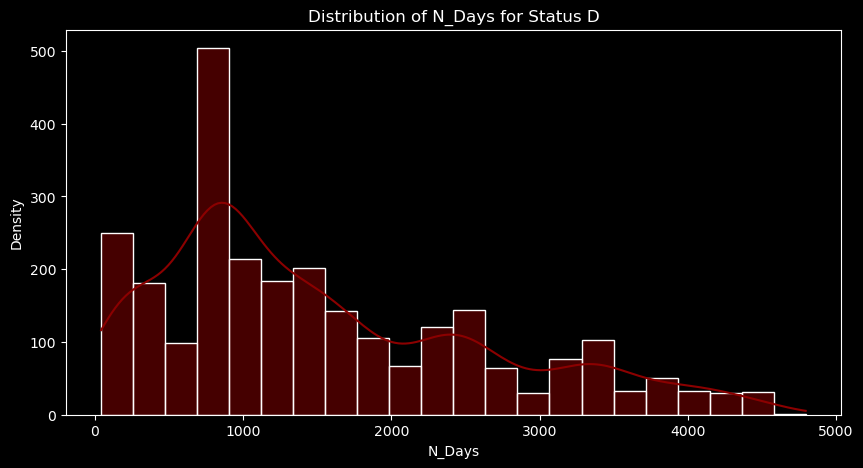

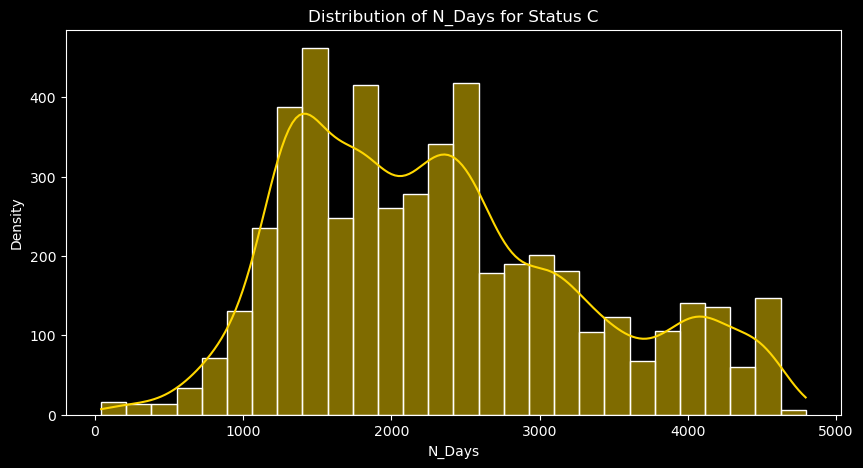

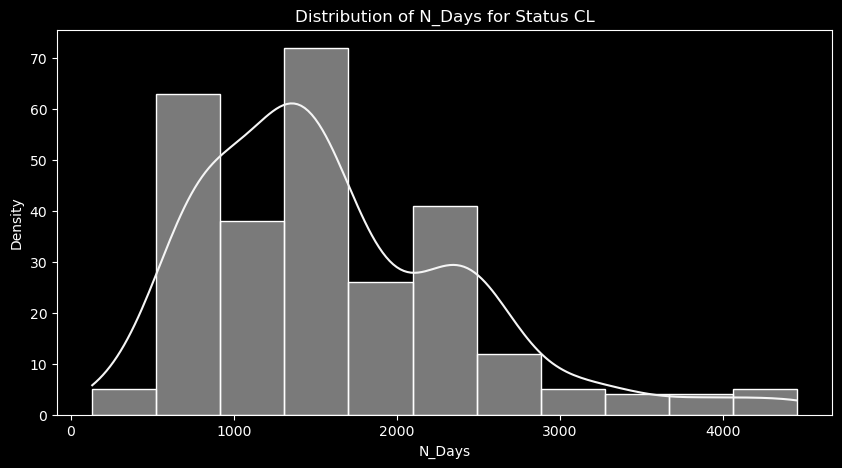

In [8]:
custom_palette = ['#8B0000','#FFD700','#F5F5F5','#D2B48C']
status_categories = ['D','C','CL']

for idx, status in enumerate(status_categories):
    plt.figure(figsize=(10, 5))
    sns.histplot(
        data=cirrhosis_train[cirrhosis_train['Status'] == status],
        x='N_Days',
        kde=True,
        color=custom_palette[idx] 
    )
    plt.title(f'Distribution of N_Days for Status {status}')
    plt.xlabel('N_Days')
    plt.ylabel('Density')
    plt.show()

# histograms for bilirubin and albumin by status

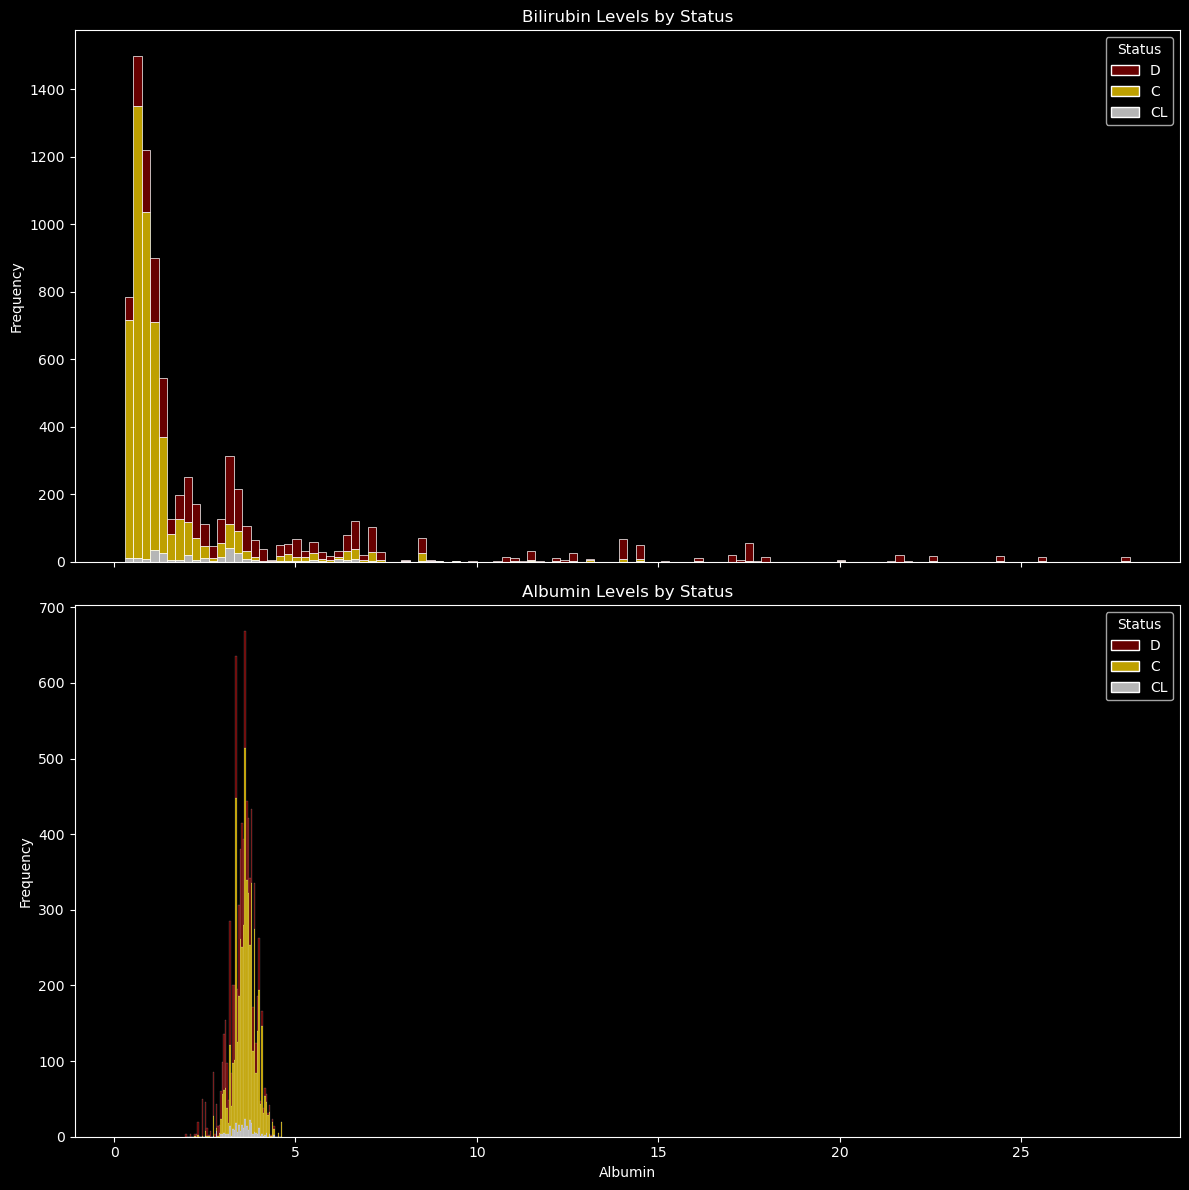

In [9]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 12), sharex=True)

custom_palette = ['#8B0000','#FFD700','#F5F5F5','#D2B48C']
sns.histplot(cirrhosis_train, x='Bilirubin', hue='Status', multiple='stack', ax=axes[0], palette=custom_palette)
axes[0].set_title('Bilirubin Levels by Status')
axes[0].set_xlabel('Bilirubin')
axes[0].set_ylabel('Frequency')

custom_palette = ['#8B0000','#FFD700','#F5F5F5','#D2B48C']
sns.histplot(cirrhosis_train, x='Albumin', hue='Status', multiple='stack', ax=axes[1], palette=custom_palette)
axes[1].set_title('Albumin Levels by Status')
axes[1].set_xlabel('Albumin')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

1. Bilirubin:

The bilirubin histogram shows a right-skewed distribution, indicating that most values are concentrated in the lower range. However, there are some extreme higher values. This suggests that while the majority of patients have relatively normal bilirubin levels, a small subset may experience hyperbilirubinemia, which could indicate more serious liver issues, such as decompensation in cirrhosis patients.

2. Albumin:

The albumin histogram also exhibits a right-skewed distribution. Most patients have higher albumin levels, but there are some with low levels. This pattern suggests that while the majority of patients still exhibit relatively good liver function, those with low albumin levels may be experiencing more serious complications related to cirrhosis, such as ascites or malnutrition.

Conclusion
Overall, the histograms for bilirubin and albumin reveal significant variability in the health status of patients with cirrhosis. This provides important insights for monitoring and managing these patients, as well as understanding the risks associated with disease progression.

# DONUT CHART DISTRIBUTION OF STATUS

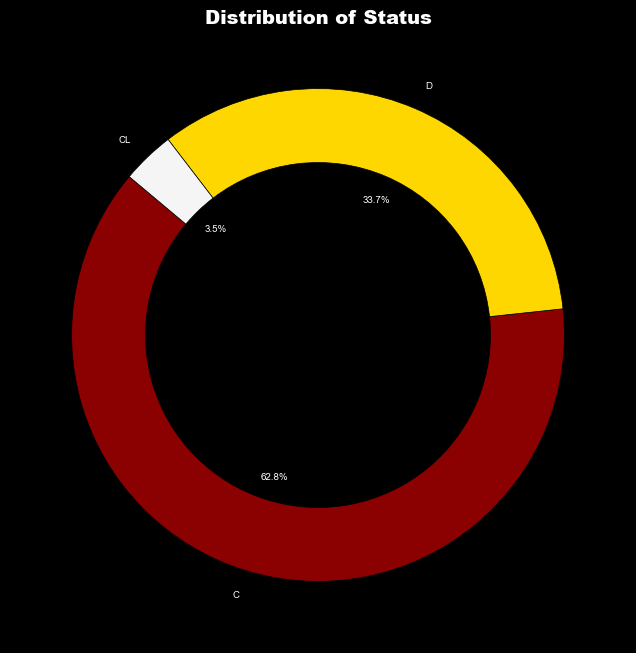

In [10]:
status_counts = cirrhosis_train['Status'].value_counts()

custom_palette = ['#8B0000','#FFD700','#F5F5F5','#D2B48C']

plt.figure(figsize=(8, 8))
plt.pie(status_counts, 
        labels=status_counts.index, 
        autopct='%1.1f%%', 
        colors=custom_palette[:len(status_counts)],  
        startangle=140, 
        wedgeprops=dict(width=0.3, edgecolor='black', linewidth=0.5),  
        textprops={'fontsize': 7, 'fontname': 'Arial'}) 

plt.title('Distribution of Status', fontsize=14, weight='heavy', ha='center', va='center', fontname='Arial')
plt.show()

# Q-Q plot N Days

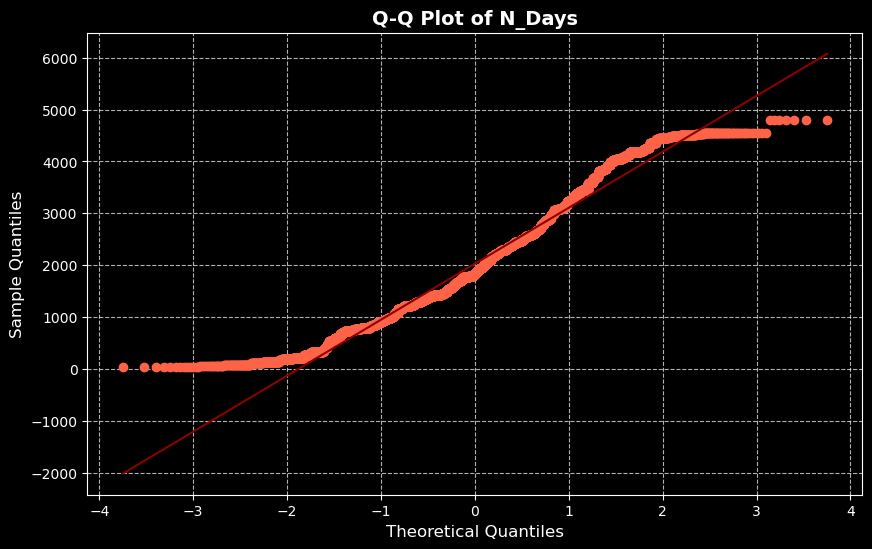

In [11]:
import scipy.stats as stats

def qq_plot(data, title):
    plt.figure(figsize=(10, 6))
    
    res = stats.probplot(data, dist="norm", plot=plt)

    plt.title(title, fontsize=14, weight='bold', ha='center')
    plt.xlabel('Theoretical Quantiles', fontsize=12)
    plt.ylabel('Sample Quantiles', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    
    plt.gca().get_lines()[0].set_color('#FF6347')
    plt.gca().get_lines()[1].set_color('#8B0000')
    
    plt.show()

qq_plot(cirrhosis_train['N_Days'], 'Q-Q Plot of N_Days')

 This skewness may indicate the presence of outliers or specific characteristics in the dataset that could influence analyses and interpretations. Further investigation into the data’s distribution and potential transformations may be warranted.

# HANDLING MISSING VALUES

In [12]:
missing_counts = cirrhosis_train.isnull().sum()

missing_percentage = (missing_counts / len(cirrhosis_train)) * 100

missing_data = pd.DataFrame({
    'Missing Values': missing_counts,
    'Percentage': missing_percentage
})

missing_data = missing_data[missing_data['Missing Values'] > 0]

missing_data = missing_data.sort_values(by='Percentage', ascending=False)

print(missing_data)

Empty DataFrame
Columns: [Missing Values, Percentage]
Index: []


# HANDLING ZERO VALUES

In [13]:
numerical_columns = ['Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin']

zero_values_numerical = (cirrhosis_train[numerical_columns] == 0).sum()
print("Count of zero values per numerical column:")
print(zero_values_numerical)

Count of zero values per numerical column:
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
dtype: int64


# FEATURE ENGINEERING NUMERICAL

In [14]:
cirrhosis_train['Bilirubin_Albumin_Ratio'] = cirrhosis_train['Bilirubin'] / cirrhosis_train['Albumin']
data_test['Bilirubin_Albumin_Ratio'] = data_test['Bilirubin'] / data_test['Albumin']

Elevated Bilirubin levels combined with low Albumin can indicate severe liver dysfunction. This ratio might be a strong indicator of the progression of liver disease.

In [15]:
cirrhosis_train['SGOT_Ratio'] = cirrhosis_train['SGOT'] / cirrhosis_train['Alk_Phos']
data_test['SGOT_Ratio'] = data_test['SGOT'] / data_test['Alk_Phos']

SGOT (AST) and Alk_Phos (Alkaline Phosphatase) are enzymes that reflect liver function. This ratio helps in differentiating types of liver damage. A high ratio may indicate more severe hepatocellular damage compared to cholestasis (bile duct obstruction).

In [16]:
cirrhosis_train['Copper_Albumin_Ratio'] = cirrhosis_train['Copper'] / cirrhosis_train['Albumin']
data_test['Copper_Albumin_Ratio'] = data_test['Copper'] / data_test['Albumin']

Copper is a trace element that can accumulate in liver diseases like Wilson's disease. Combining it with Albumin (a liver function marker) provides insights into copper metabolism and liver dysfunction.

In [17]:
cirrhosis_train['Platelets_Bilirubin_Ratio'] = cirrhosis_train['Platelets'] / cirrhosis_train['Bilirubin']
data_test['Platelets_Bilirubin_Ratio'] = data_test['Platelets'] / data_test['Bilirubin']

Platelet count often decreases in chronic liver disease due to splenomegaly or liver dysfunction. This ratio helps in understanding the relationship between platelet counts and bilirubin levels, which can indicate disease progression and liver damage severity.

In [18]:
cirrhosis_train['Tryglicerides_Albumin_Ratio'] = cirrhosis_train['Tryglicerides'] / cirrhosis_train['Albumin']
data_test['Tryglicerides_Albumin_Ratio'] = data_test['Tryglicerides'] / data_test['Albumin']

Triglycerides levels can be altered in liver disease. Combining triglycerides with Albumin (a marker of liver function) helps in assessing how lipid metabolism is affected by liver health.

In [19]:
cirrhosis_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7905 entries, 0 to 7904
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   N_Days                       7905 non-null   int64  
 1   Drug                         7905 non-null   object 
 2   Age                          7905 non-null   int64  
 3   Sex                          7905 non-null   object 
 4   Ascites                      7905 non-null   object 
 5   Hepatomegaly                 7905 non-null   object 
 6   Spiders                      7905 non-null   object 
 7   Edema                        7905 non-null   object 
 8   Bilirubin                    7905 non-null   float64
 9   Cholesterol                  7905 non-null   float64
 10  Albumin                      7905 non-null   float64
 11  Copper                       7905 non-null   float64
 12  Alk_Phos                     7905 non-null   float64
 13  SGOT                   

In [20]:
numerical_data = cirrhosis_train.select_dtypes(include=['int64', 'float64'])

print("\nNumerical Data:")
print(numerical_data.info())


Numerical Data:
<class 'pandas.core.frame.DataFrame'>
Index: 7905 entries, 0 to 7904
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   N_Days                       7905 non-null   int64  
 1   Age                          7905 non-null   int64  
 2   Bilirubin                    7905 non-null   float64
 3   Cholesterol                  7905 non-null   float64
 4   Albumin                      7905 non-null   float64
 5   Copper                       7905 non-null   float64
 6   Alk_Phos                     7905 non-null   float64
 7   SGOT                         7905 non-null   float64
 8   Tryglicerides                7905 non-null   float64
 9   Platelets                    7905 non-null   float64
 10  Prothrombin                  7905 non-null   float64
 11  Stage                        7905 non-null   float64
 12  Bilirubin_Albumin_Ratio      7905 non-null   float64
 13  SGOT_R


Descriptive Statistics for Feature: N_Days
count    7905.000000
mean     2030.173308
std      1094.233744
min        41.000000
25%      1230.000000
50%      1831.000000
75%      2689.000000
max      4795.000000
Name: N_Days, dtype: float64


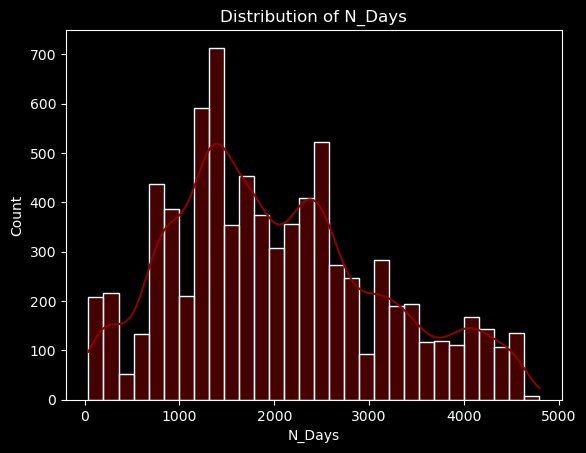


Descriptive Statistics for Feature: Age
count     7905.000000
mean     18373.146490
std       3679.958739
min       9598.000000
25%      15574.000000
50%      18713.000000
75%      20684.000000
max      28650.000000
Name: Age, dtype: float64


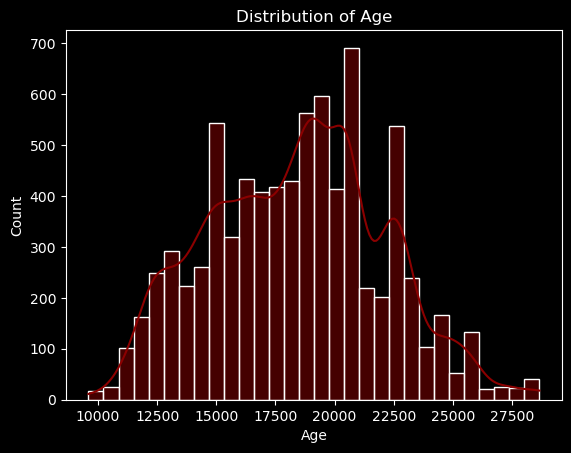


Descriptive Statistics for Feature: Bilirubin
count    7905.000000
mean        2.594485
std         3.812960
min         0.300000
25%         0.700000
50%         1.100000
75%         3.000000
max        28.000000
Name: Bilirubin, dtype: float64


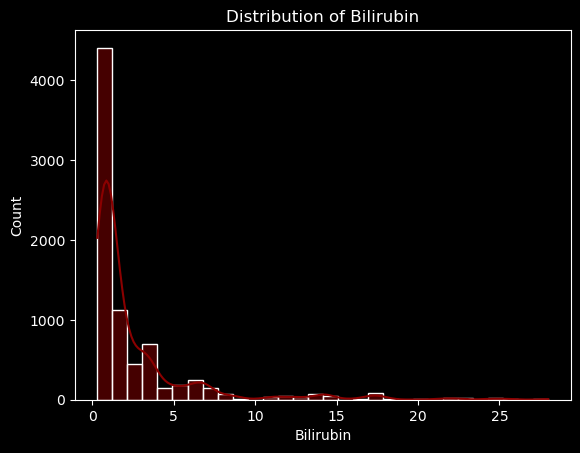


Descriptive Statistics for Feature: Cholesterol
count    7905.000000
mean      350.561923
std       195.379344
min       120.000000
25%       248.000000
50%       298.000000
75%       390.000000
max      1775.000000
Name: Cholesterol, dtype: float64


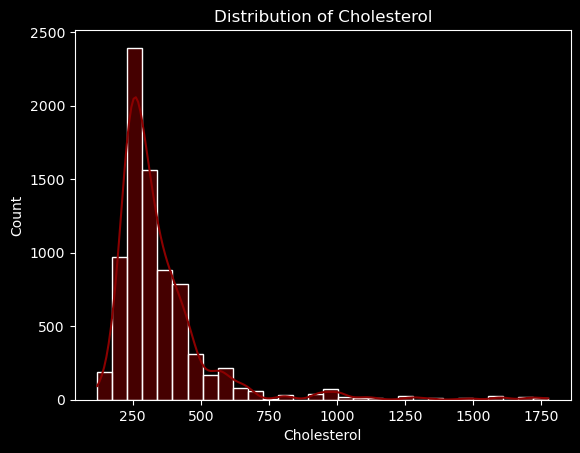


Descriptive Statistics for Feature: Albumin
count    7905.000000
mean        3.548323
std         0.346171
min         1.960000
25%         3.350000
50%         3.580000
75%         3.770000
max         4.640000
Name: Albumin, dtype: float64


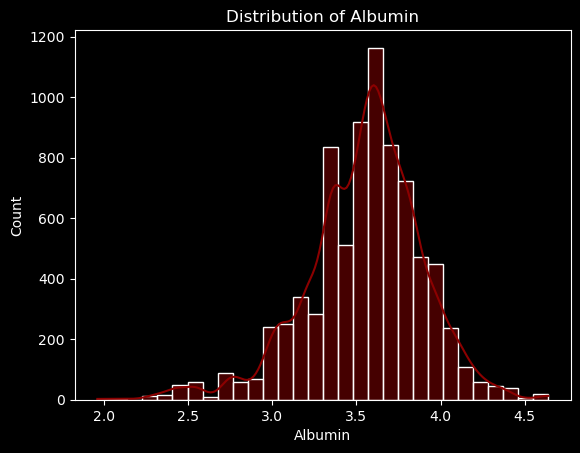


Descriptive Statistics for Feature: Copper
count    7905.000000
mean       83.902846
std        75.899266
min         4.000000
25%        39.000000
50%        63.000000
75%       102.000000
max       588.000000
Name: Copper, dtype: float64


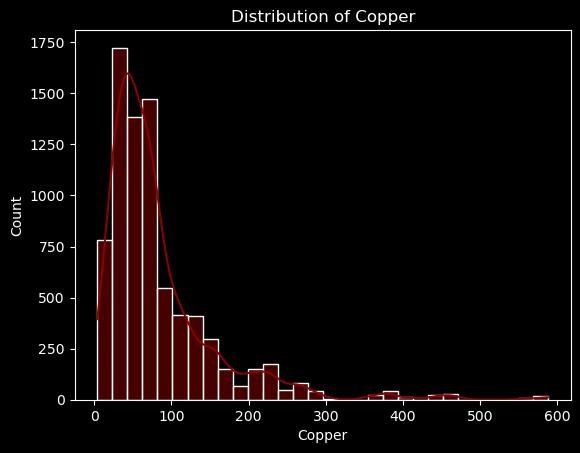


Descriptive Statistics for Feature: Alk_Phos
count     7905.000000
mean      1816.745250
std       1903.750657
min        289.000000
25%        834.000000
50%       1181.000000
75%       1857.000000
max      13862.400000
Name: Alk_Phos, dtype: float64


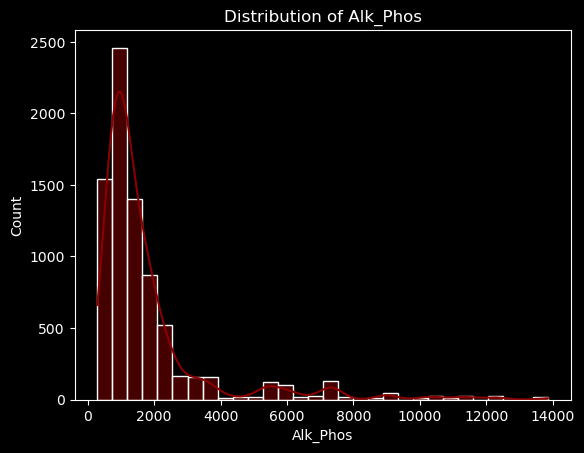


Descriptive Statistics for Feature: SGOT
count    7905.000000
mean      114.604602
std        48.790945
min        26.350000
25%        75.950000
50%       108.500000
75%       137.950000
max       457.250000
Name: SGOT, dtype: float64


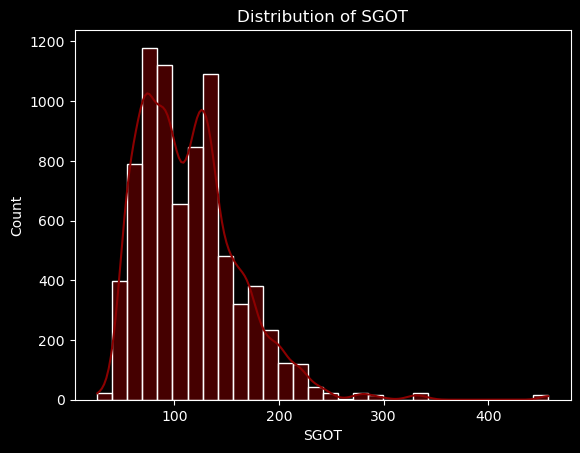


Descriptive Statistics for Feature: Tryglicerides
count    7905.000000
mean      115.340164
std        52.530402
min        33.000000
25%        84.000000
50%       104.000000
75%       139.000000
max       598.000000
Name: Tryglicerides, dtype: float64


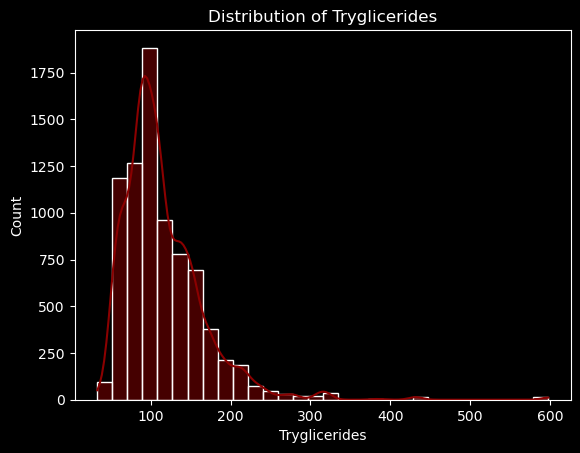


Descriptive Statistics for Feature: Platelets
count    7905.000000
mean      265.228969
std        87.465579
min        62.000000
25%       211.000000
50%       265.000000
75%       316.000000
max       563.000000
Name: Platelets, dtype: float64


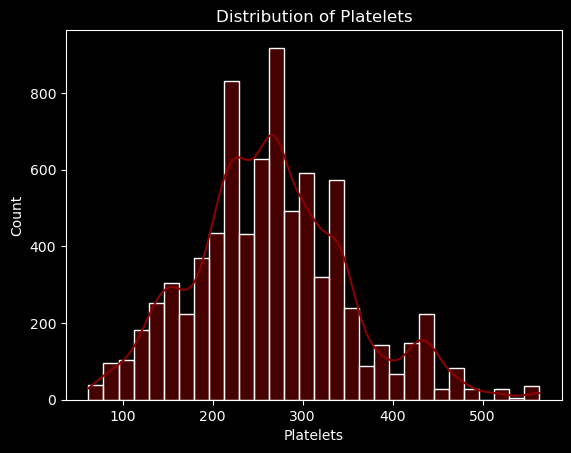


Descriptive Statistics for Feature: Prothrombin
count    7905.000000
mean       10.629462
std         0.781735
min         9.000000
25%        10.000000
50%        10.600000
75%        11.000000
max        18.000000
Name: Prothrombin, dtype: float64


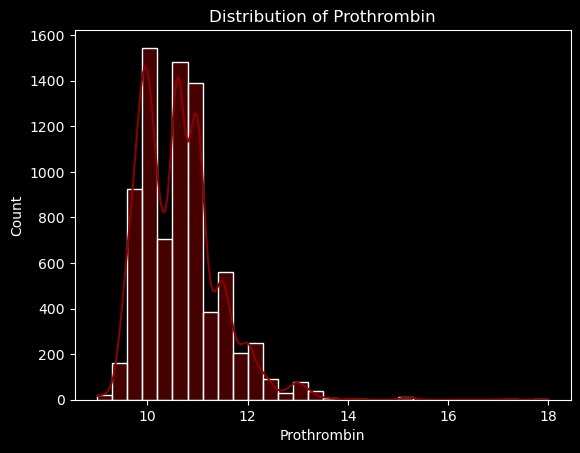


Descriptive Statistics for Feature: Stage
count    7905.000000
mean        3.032511
std         0.866511
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         4.000000
Name: Stage, dtype: float64


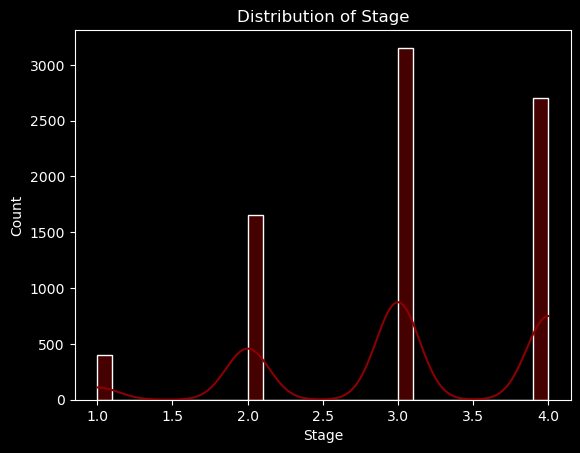


Descriptive Statistics for Feature: Bilirubin_Albumin_Ratio
count    7905.000000
mean        0.776456
std         1.214897
min         0.068182
25%         0.193966
50%         0.301508
75%         0.847458
max         9.859155
Name: Bilirubin_Albumin_Ratio, dtype: float64


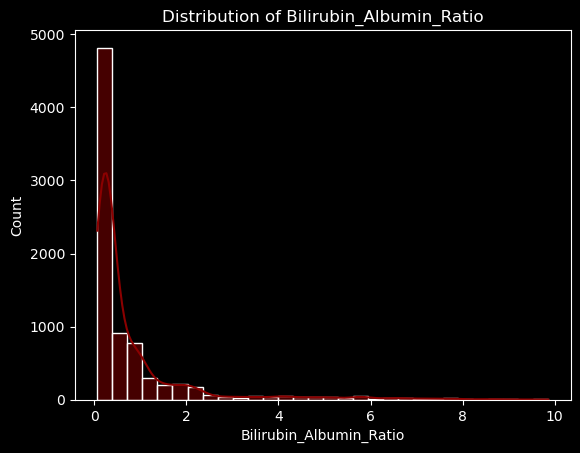


Descriptive Statistics for Feature: SGOT_Ratio
count    7905.000000
mean        0.093060
std         0.051323
min         0.004931
25%         0.062434
50%         0.088777
75%         0.113761
max         0.640406
Name: SGOT_Ratio, dtype: float64


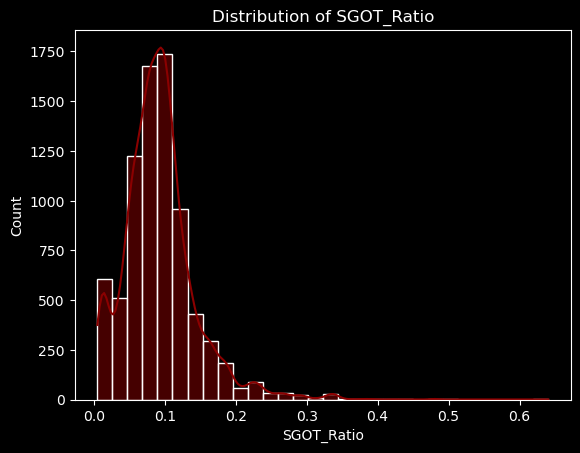


Descriptive Statistics for Feature: Copper_Albumin_Ratio
count    7905.000000
mean       24.415203
std        23.392529
min         1.015228
25%        10.625000
50%        17.500000
75%        28.767123
max       245.814978
Name: Copper_Albumin_Ratio, dtype: float64


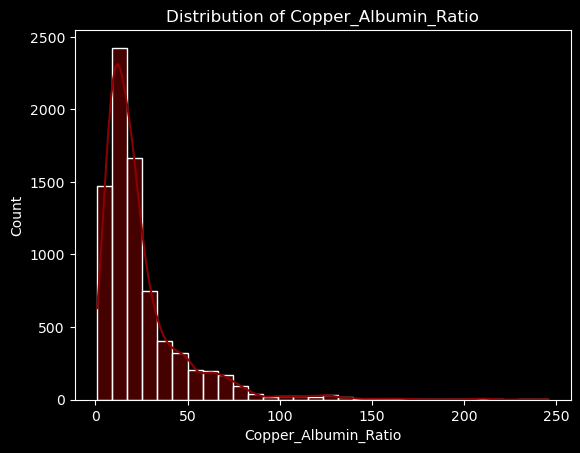


Descriptive Statistics for Feature: Platelets_Bilirubin_Ratio
count    7905.000000
mean      264.576486
std       213.139522
min         3.555556
25%        82.608696
50%       229.090909
75%       385.000000
max      1643.333333
Name: Platelets_Bilirubin_Ratio, dtype: float64


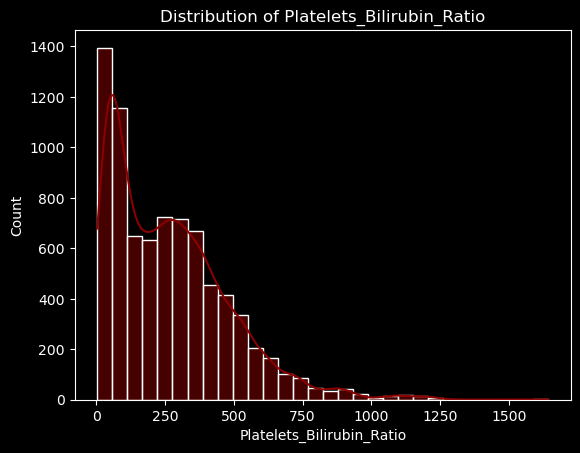


Descriptive Statistics for Feature: Tryglicerides_Albumin_Ratio
count    7905.000000
mean       33.036070
std        16.335029
min         8.068460
25%        23.055556
50%        29.189189
75%        39.612188
max       236.363636
Name: Tryglicerides_Albumin_Ratio, dtype: float64


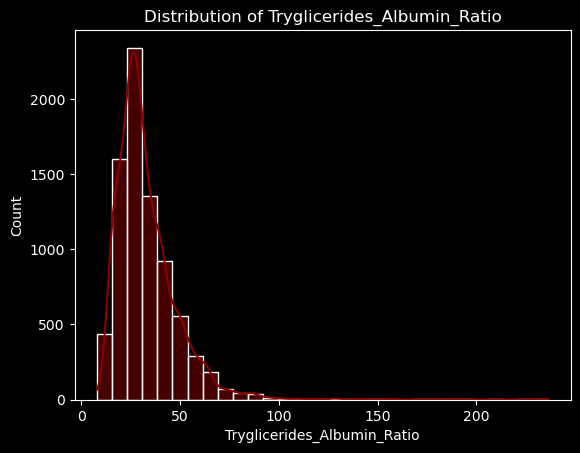

In [21]:
for col in numerical_data:
    print(f"\nDescriptive Statistics for Feature: {col}")
    print(cirrhosis_train[col].describe())
    sns.histplot(cirrhosis_train[col], kde=True, bins=30,color= '#8B0000')
    plt.title(f'Distribution of {col}')
    plt.show()

# FEATURE ENGINEERING CATEGORICAL

In [22]:
def age_category(age_in_days):
  age_in_years = age_in_days / 365.25
  if age_in_years <= 30:
    return 'Young'
  elif age_in_years <= 50:
    return 'Middle-Aged'
  else:
    return 'Old'

cirrhosis_train['Age_Category'] = cirrhosis_train['Age'].apply(age_category)
data_test['Age_Category'] = data_test['Age'].apply(age_category)

In [23]:
cirrhosis_train['Age_Category'].value_counts()

Age_Category
Old            4211
Middle-Aged    3651
Young            43
Name: count, dtype: int64

Age and Disease Progression:

- Young: Rare in younger individuals, but when present, it may indicate severe or rare underlying conditions. Tailored management strategies are needed for this group.

- Middle-Aged: Significant prevalence in middle-aged individuals suggests a need for preventive measures and early interventions to manage risk factors and slow disease progression.

- Old: Cirrhosis is most common in older patients. This group may have more severe disease and requires intensive management and monitoring.

The data indicates that cirrhosis predominantly affects older adults, with a notable presence in middle-aged individuals. Younger patients are less common but may require special attention.

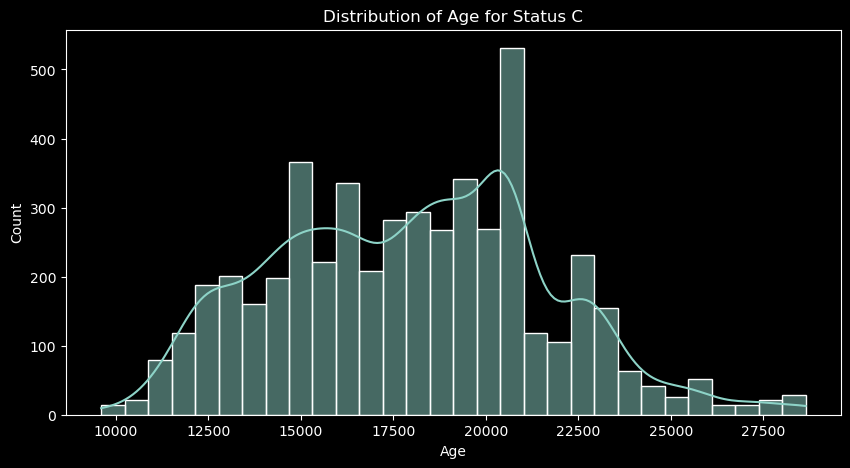

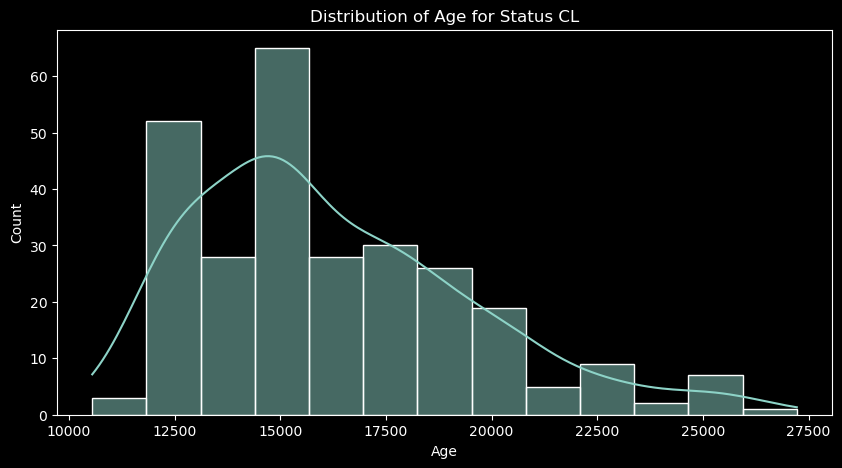

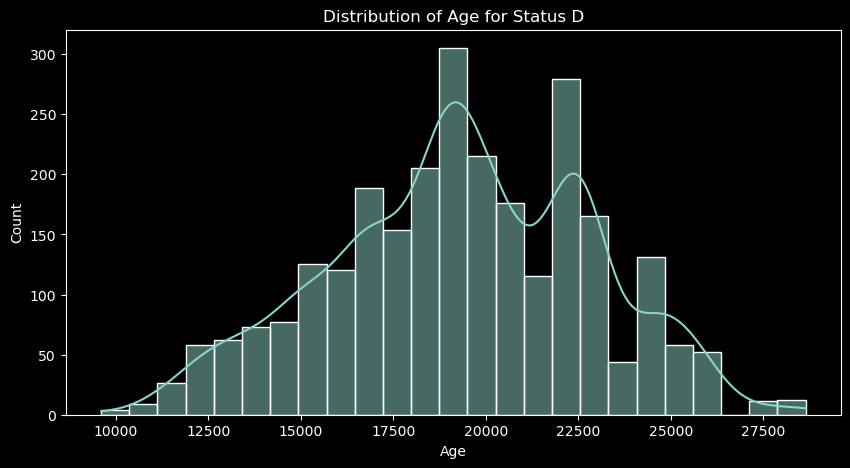

In [24]:
status_target = ['C', 'CL', 'D']

for status in status_target:
  plt.figure(figsize=(10, 5))
  sns.histplot(cirrhosis_train[cirrhosis_train['Status'] == status]['Age'], kde=True)
  plt.title(f'Distribution of Age for Status {status}')
  plt.show()

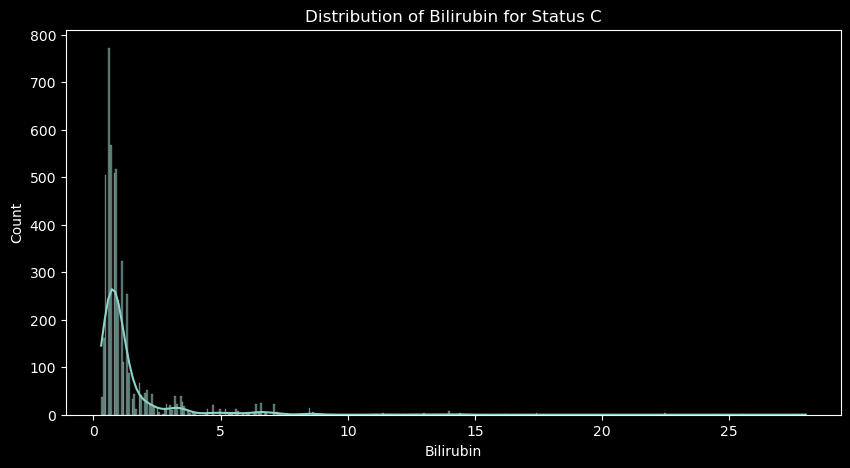

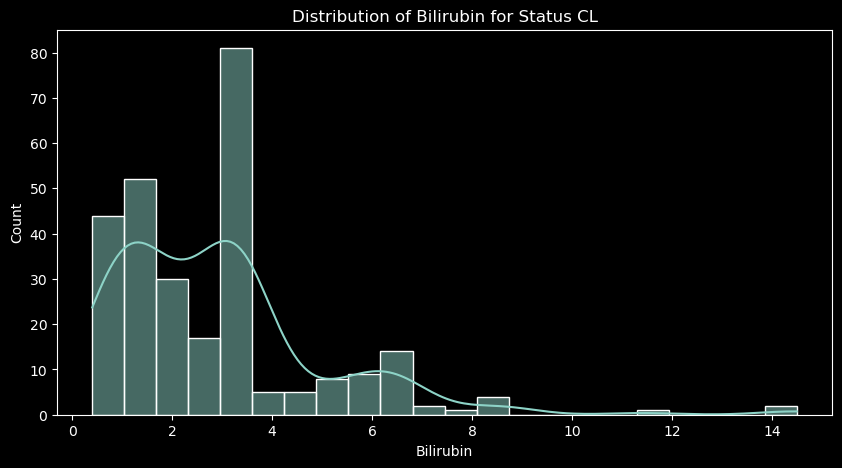

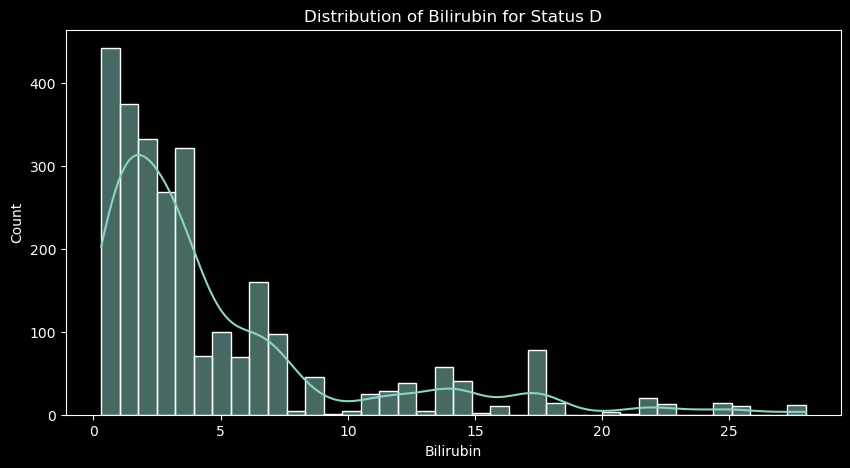

In [25]:
for status in status_target:
  plt.figure(figsize=(10, 5))
  sns.histplot(cirrhosis_train[cirrhosis_train['Status'] == status]['Bilirubin'], kde=True)
  plt.title(f'Distribution of Bilirubin for Status {status}')
  plt.show()

In [26]:
def categorize_bilirubin(value):
  if 0.3 <= value <= 1.2:
    return 'Normal'
  elif value > 1.2:
    return 'Abnormal'
  else:
    return 0

cirrhosis_train['Bilirubin_Category'] = cirrhosis_train['Bilirubin'].apply(categorize_bilirubin)
data_test['Bilirubin_Category'] = data_test['Bilirubin'].apply(categorize_bilirubin)

In [27]:
cirrhosis_train['Bilirubin_Category'].value_counts()

Bilirubin_Category
Normal      4406
Abnormal    3499
Name: count, dtype: int64

In [28]:
from scipy import stats

cirrhosis_train_log = cirrhosis_train.copy()
cirrhosis_train_sqrt =cirrhosis_train.copy()
cirrhosis_train_cube = cirrhosis_train.copy()
cirrhosis_train_boxcox = cirrhosis_train.copy()

for col in numerical_data:
  # Log transformation
  cirrhosis_train_log[f'{col}_log'] = np.log(cirrhosis_train[col])

  # Square root transformation
  cirrhosis_train_sqrt[f'{col}_sqrt'] = np.sqrt(cirrhosis_train[col])

  # Cube root transformation
  cirrhosis_train_cube[f'{col}_cbrt'] = np.cbrt(cirrhosis_train[col])

  # Box-Cox transformation
  cirrhosis_train_boxcox[f'{col}_boxcox'], _ = stats.boxcox(cirrhosis_train[col])

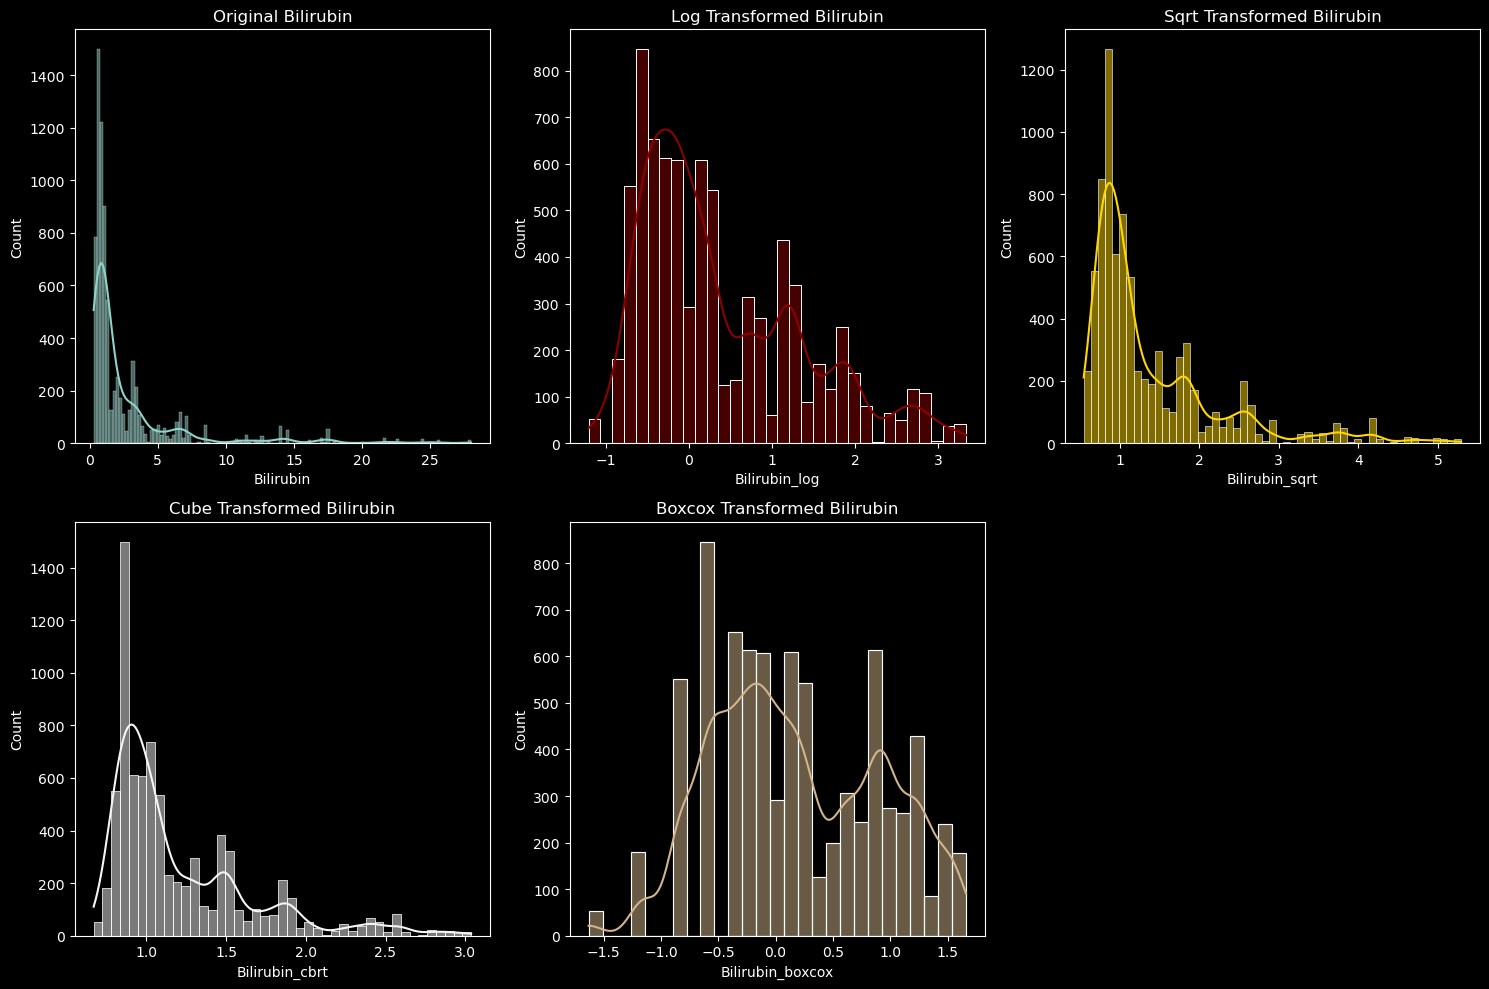

In [29]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
sns.histplot(cirrhosis_train['Bilirubin'], kde=True)
plt.title('Original Bilirubin')

plt.subplot(2, 3, 2)
sns.histplot(cirrhosis_train_log['Bilirubin_log'], kde=True,color='#8B0000')
plt.title('Log Transformed Bilirubin')

plt.subplot(2, 3, 3)
sns.histplot(cirrhosis_train_sqrt['Bilirubin_sqrt'], kde=True,color='#FFD700')
plt.title('Sqrt Transformed Bilirubin')

plt.subplot(2, 3, 4)
sns.histplot(cirrhosis_train_cube['Bilirubin_cbrt'], kde=True,color='#F5F5F5')
plt.title('Cube Transformed Bilirubin')

plt.subplot(2, 3, 5)
sns.histplot(cirrhosis_train_boxcox['Bilirubin_boxcox'], kde=True,color='#D2B48C')
plt.title('Boxcox Transformed Bilirubin')

plt.tight_layout()
plt.show()

In [30]:
cirrhosis_train['Bilirubin'], _ = stats.boxcox(cirrhosis_train['Bilirubin'])
data_test['Bilirubin'], _ = stats.boxcox(data_test['Bilirubin'])

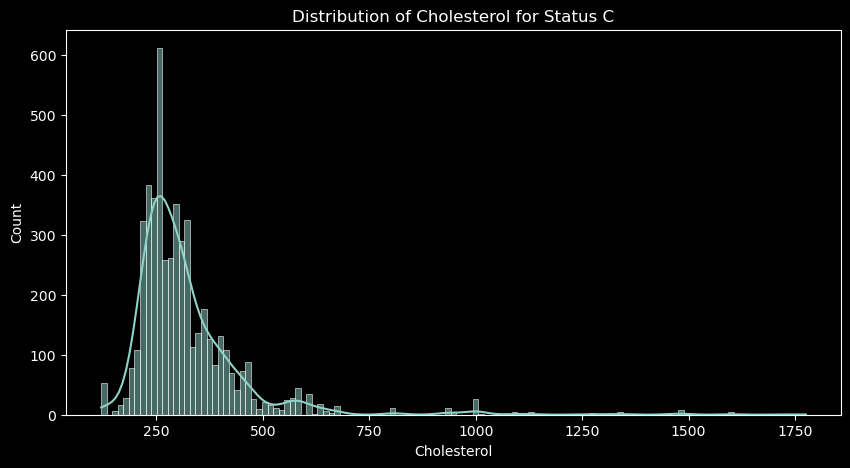

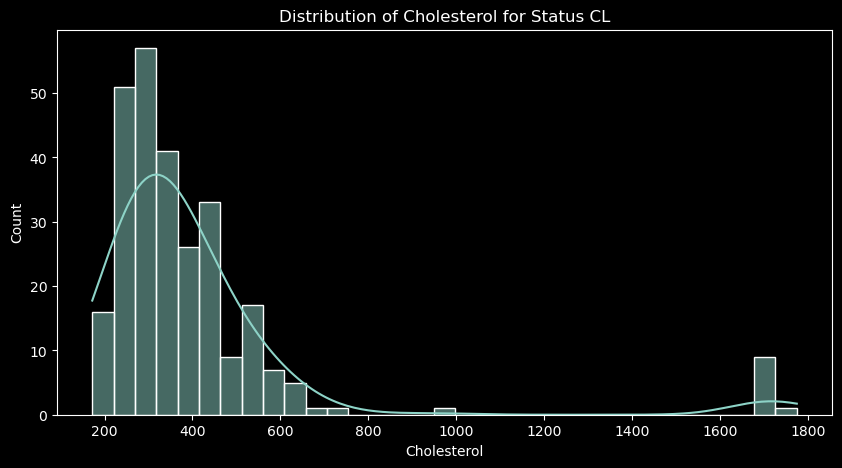

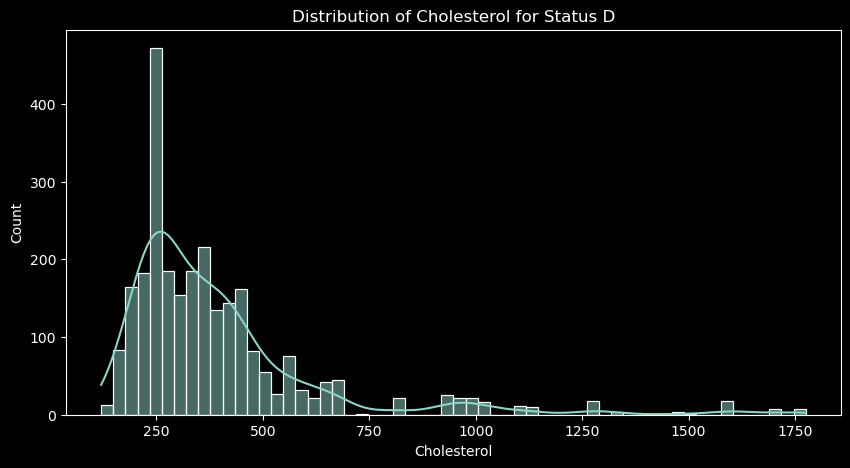

In [31]:
for status in status_target:
  plt.figure(figsize=(10, 5))
  sns.histplot(cirrhosis_train[cirrhosis_train['Status'] == status]['Cholesterol'], kde=True)
  plt.title(f'Distribution of Cholesterol for Status {status}')
  plt.show()

In [32]:
cirrhosis_train['Cholesterol'].describe()

count    7905.000000
mean      350.561923
std       195.379344
min       120.000000
25%       248.000000
50%       298.000000
75%       390.000000
max      1775.000000
Name: Cholesterol, dtype: float64

In [33]:
def categorize_cholesterol(value):
  if value <= 200:
    return 'Normal'
  elif value > 200:
    return 'Abnormal'
  else:
    return 0

cirrhosis_train['Cholesterol_Category'] = cirrhosis_train['Cholesterol'].apply(categorize_cholesterol)
data_test['Cholesterol_Category'] = data_test['Cholesterol'].apply(categorize_cholesterol)

In [34]:
cirrhosis_train['Cholesterol_Category'].value_counts()

Cholesterol_Category
Abnormal    7477
Normal       428
Name: count, dtype: int64

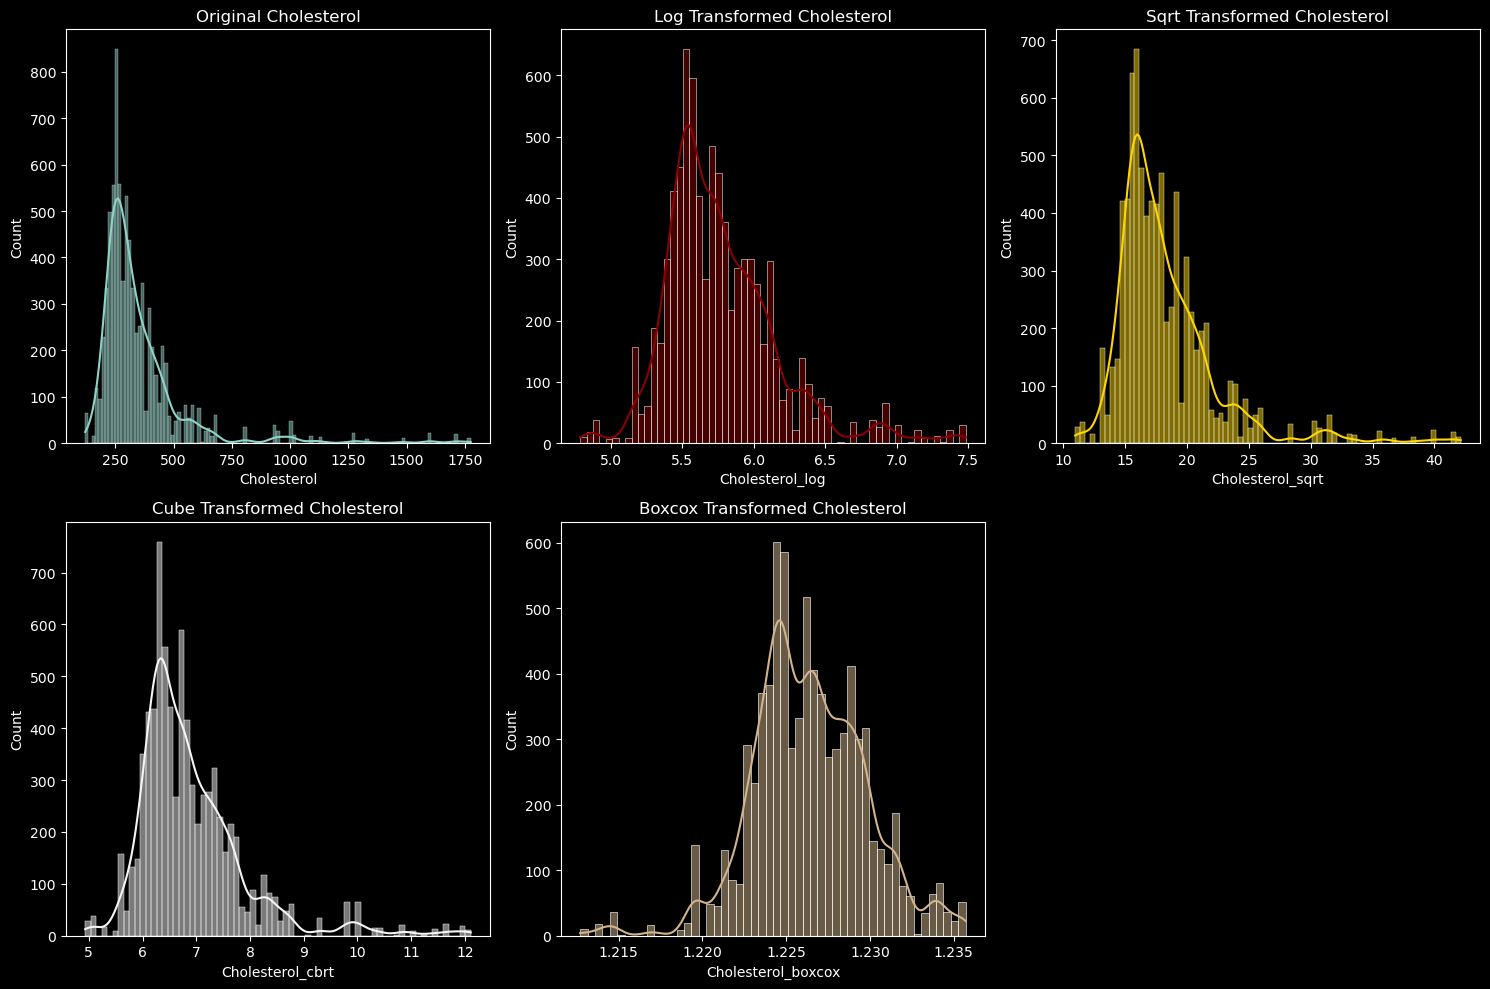

In [35]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
sns.histplot(cirrhosis_train['Cholesterol'], kde=True)
plt.title('Original Cholesterol')

plt.subplot(2, 3, 2)
sns.histplot(cirrhosis_train_log['Cholesterol_log'], kde=True,color='#8B0000')
plt.title('Log Transformed Cholesterol')

plt.subplot(2, 3, 3)
sns.histplot(cirrhosis_train_sqrt['Cholesterol_sqrt'], kde=True,color='#FFD700')
plt.title('Sqrt Transformed Cholesterol')

plt.subplot(2, 3, 4)
sns.histplot(cirrhosis_train_cube['Cholesterol_cbrt'], kde=True,color='#F5F5F5')
plt.title('Cube Transformed Cholesterol')

plt.subplot(2, 3, 5)
sns.histplot(cirrhosis_train_boxcox['Cholesterol_boxcox'], kde=True,color='#D2B48C')
plt.title('Boxcox Transformed Cholesterol')

plt.tight_layout()
plt.show()

In [36]:
cirrhosis_train['Cholesterol'], _ = stats.boxcox(cirrhosis_train['Cholesterol'])
data_test['Cholesterol'], _ = stats.boxcox(data_test['Cholesterol'])

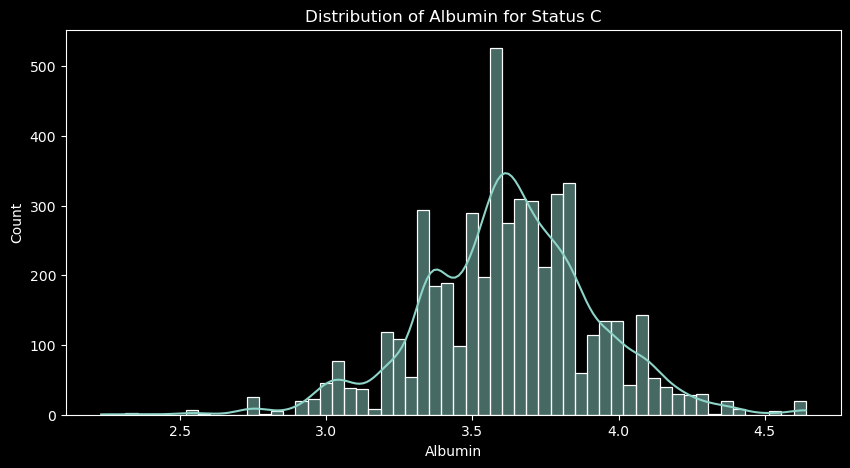

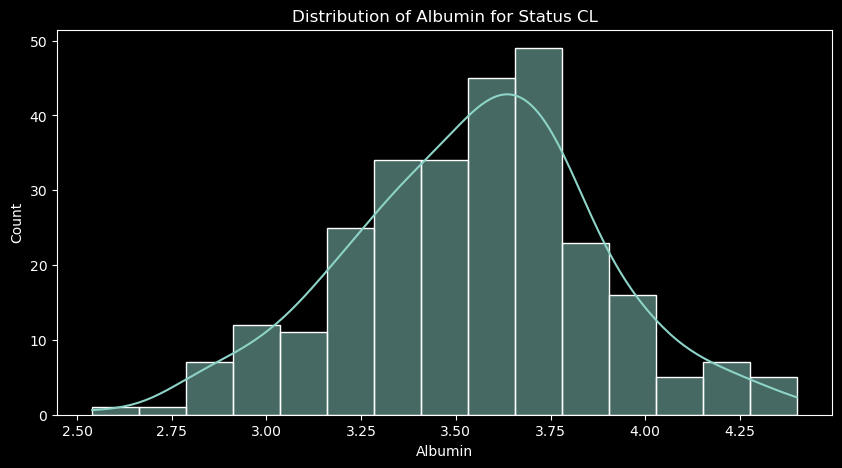

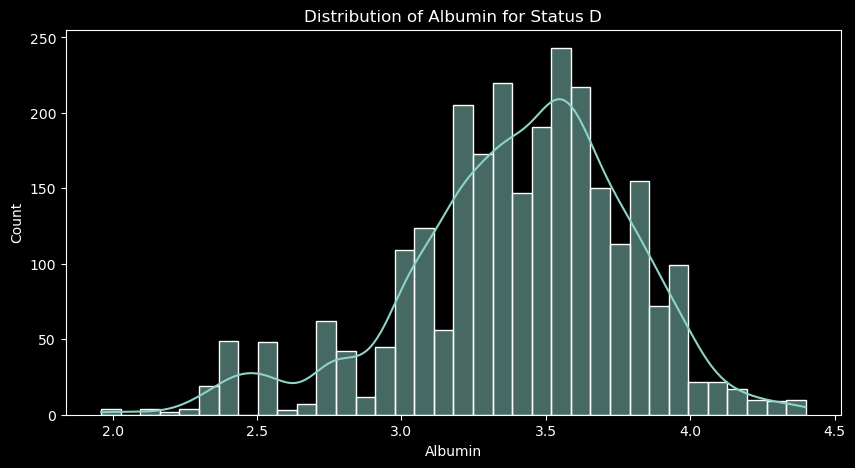

In [37]:
for status in status_target:
  plt.figure(figsize=(10, 5))
  sns.histplot(cirrhosis_train[cirrhosis_train['Status'] == status]['Albumin'], kde=True)
  plt.title(f'Distribution of Albumin for Status {status}')
  plt.show()

In [38]:
cirrhosis_train['Albumin'].describe()

count    7905.000000
mean        3.548323
std         0.346171
min         1.960000
25%         3.350000
50%         3.580000
75%         3.770000
max         4.640000
Name: Albumin, dtype: float64

In [39]:
def categorize_albumin(value):
  if 3.5 < value <= 5:
    return 'Normal'
  elif value <= 3.5:
    return 'Abnormal'
  else:
    return 0

cirrhosis_train['Albumin_Category'] = cirrhosis_train['Albumin'].apply(categorize_albumin)
data_test['Albumin_Category'] = data_test['Albumin'].apply(categorize_albumin)

In [40]:
cirrhosis_train['Albumin_Category'].value_counts()

Albumin_Category
Normal      4707
Abnormal    3198
Name: count, dtype: int64

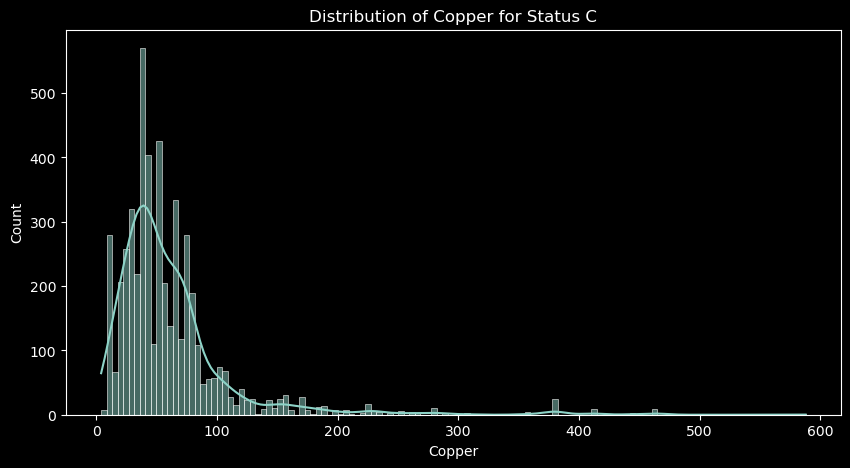

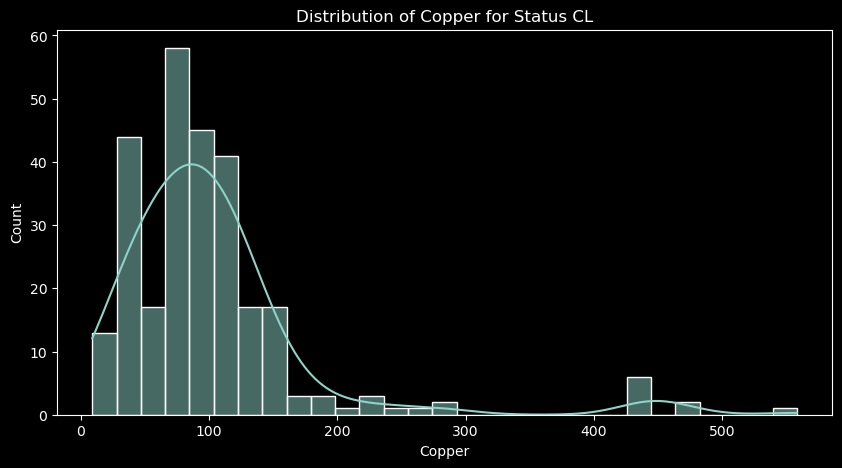

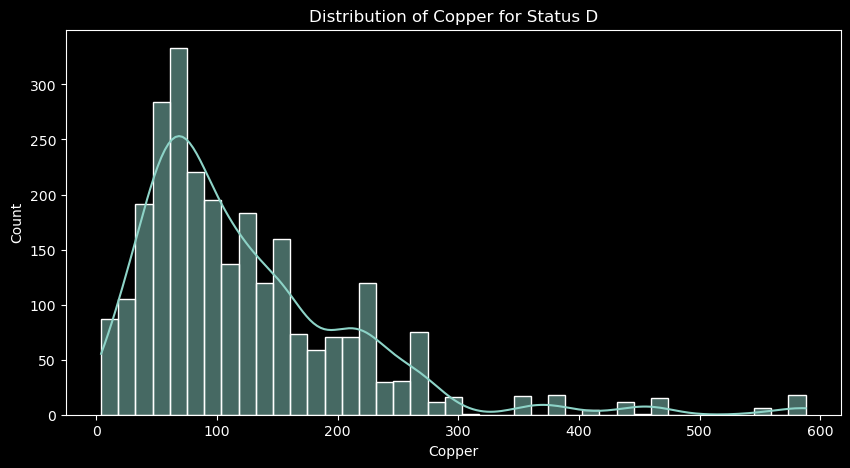

In [41]:
for status in status_target:
  plt.figure(figsize=(10, 5))
  sns.histplot(cirrhosis_train[cirrhosis_train['Status'] == status]['Copper'], kde=True)
  plt.title(f'Distribution of Copper for Status {status}')
  plt.show()

In [42]:
def categorize_copper(value):
  if 70 < value <= 140:
    return 'Normal'
  elif value <= 70 or value > 140:
    return 'Abnormal'
  else:
    return 0

cirrhosis_train['Copper_Category'] = cirrhosis_train['Copper'].apply(categorize_copper)
data_test['Copper_Category'] = data_test['Copper'].apply(categorize_copper)

In [43]:
cirrhosis_train['Copper_Category'].value_counts()

Copper_Category
Abnormal    5700
Normal      2205
Name: count, dtype: int64

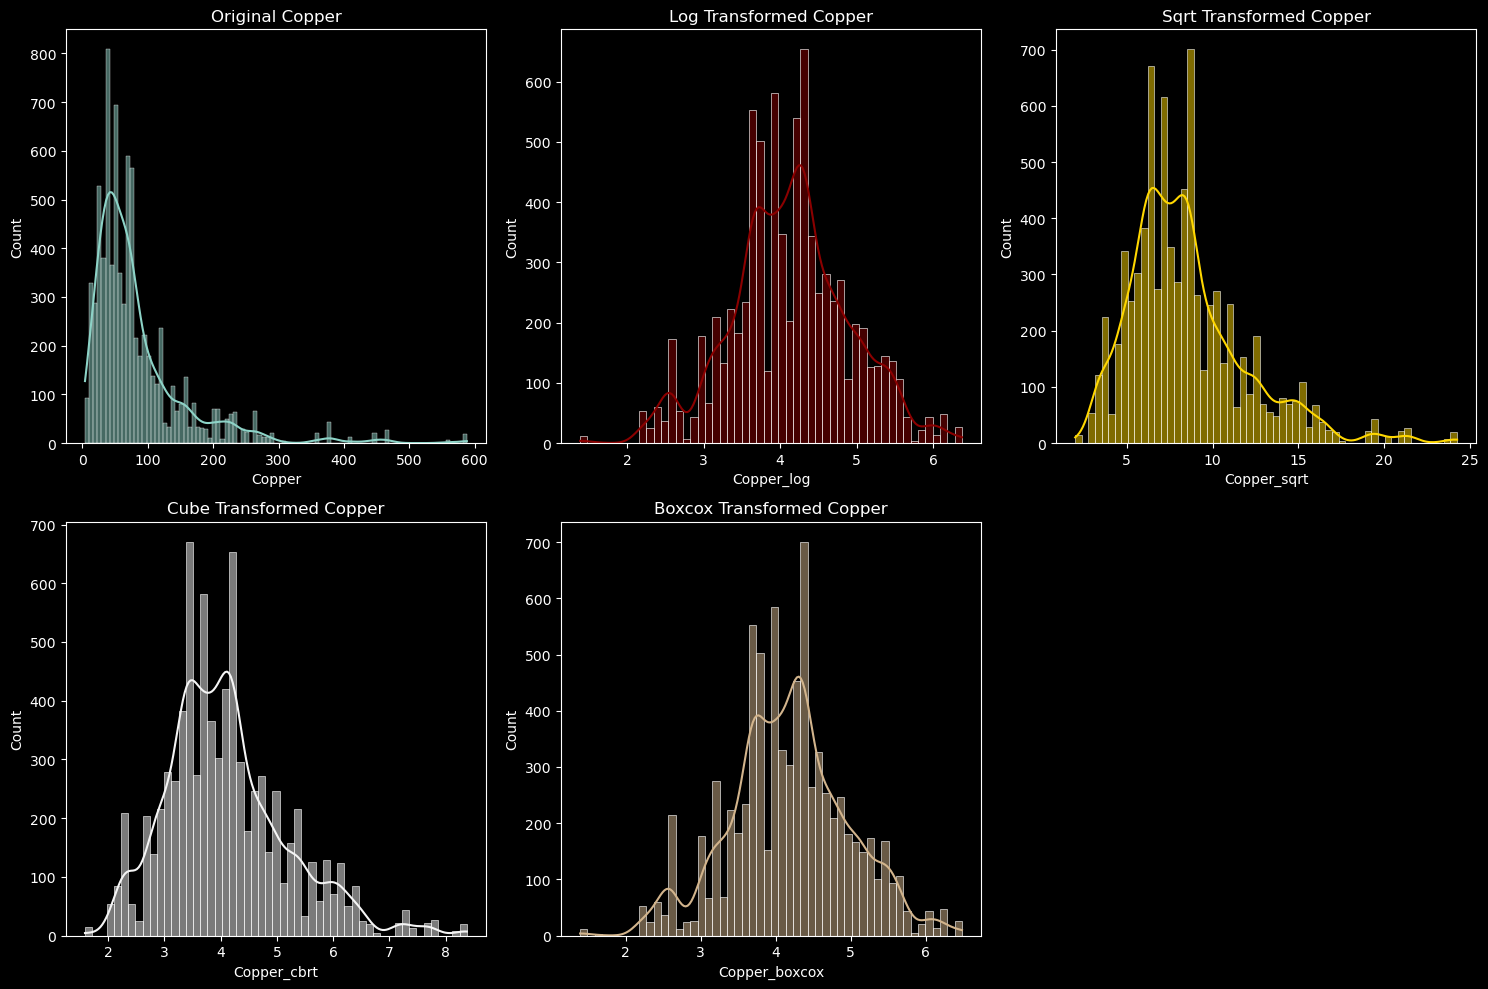

In [44]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
sns.histplot(cirrhosis_train['Copper'], kde=True)
plt.title('Original Copper')

plt.subplot(2, 3, 2)
sns.histplot(cirrhosis_train_log['Copper_log'], kde=True,color='#8B0000')
plt.title('Log Transformed Copper')

plt.subplot(2, 3, 3)
sns.histplot(cirrhosis_train_sqrt['Copper_sqrt'], kde=True,color='#FFD700')
plt.title('Sqrt Transformed Copper')

plt.subplot(2, 3, 4)
sns.histplot(cirrhosis_train_cube['Copper_cbrt'], kde=True,color='#F5F5F5')
plt.title('Cube Transformed Copper')

plt.subplot(2, 3, 5)
sns.histplot(cirrhosis_train_boxcox['Copper_boxcox'], kde=True,color='#D2B48C')
plt.title('Boxcox Transformed Copper')

plt.tight_layout()
plt.show()

In [45]:
cirrhosis_train['Copper'] = np.log(cirrhosis_train['Copper'])
data_test['Copper'] = np.log(data_test['Copper'])

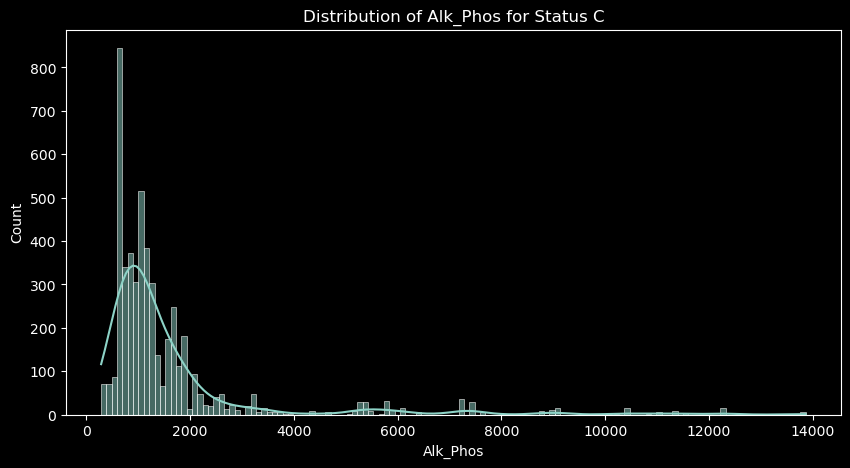

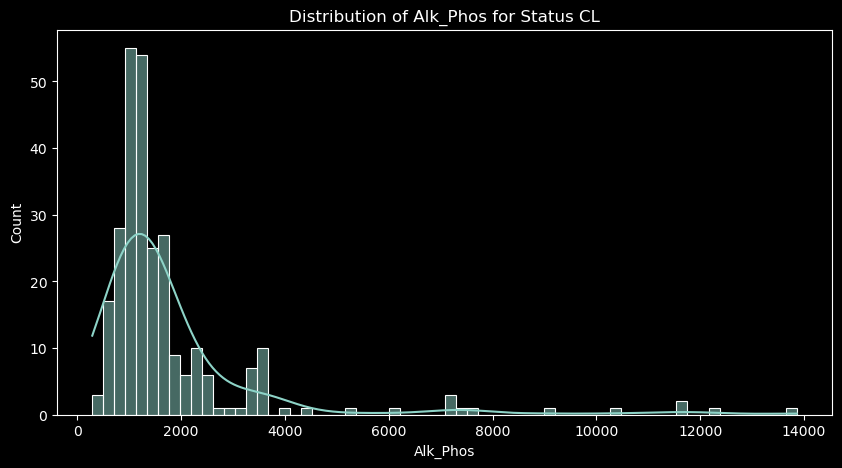

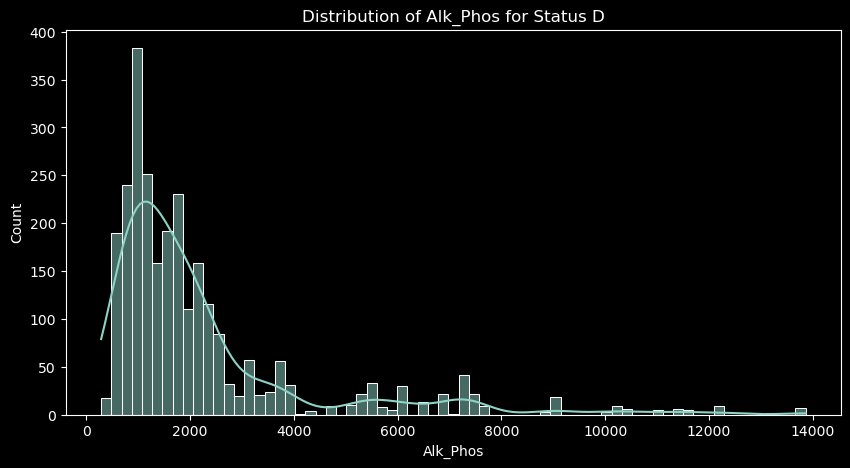

In [46]:
for status in status_target:
  plt.figure(figsize=(10, 5))
  sns.histplot(cirrhosis_train[cirrhosis_train['Status'] == status]['Alk_Phos'], kde=True)
  plt.title(f'Distribution of Alk_Phos for Status {status}')
  plt.show()

In [47]:
cirrhosis_train['Alk_Phos'].describe()

count     7905.000000
mean      1816.745250
std       1903.750657
min        289.000000
25%        834.000000
50%       1181.000000
75%       1857.000000
max      13862.400000
Name: Alk_Phos, dtype: float64

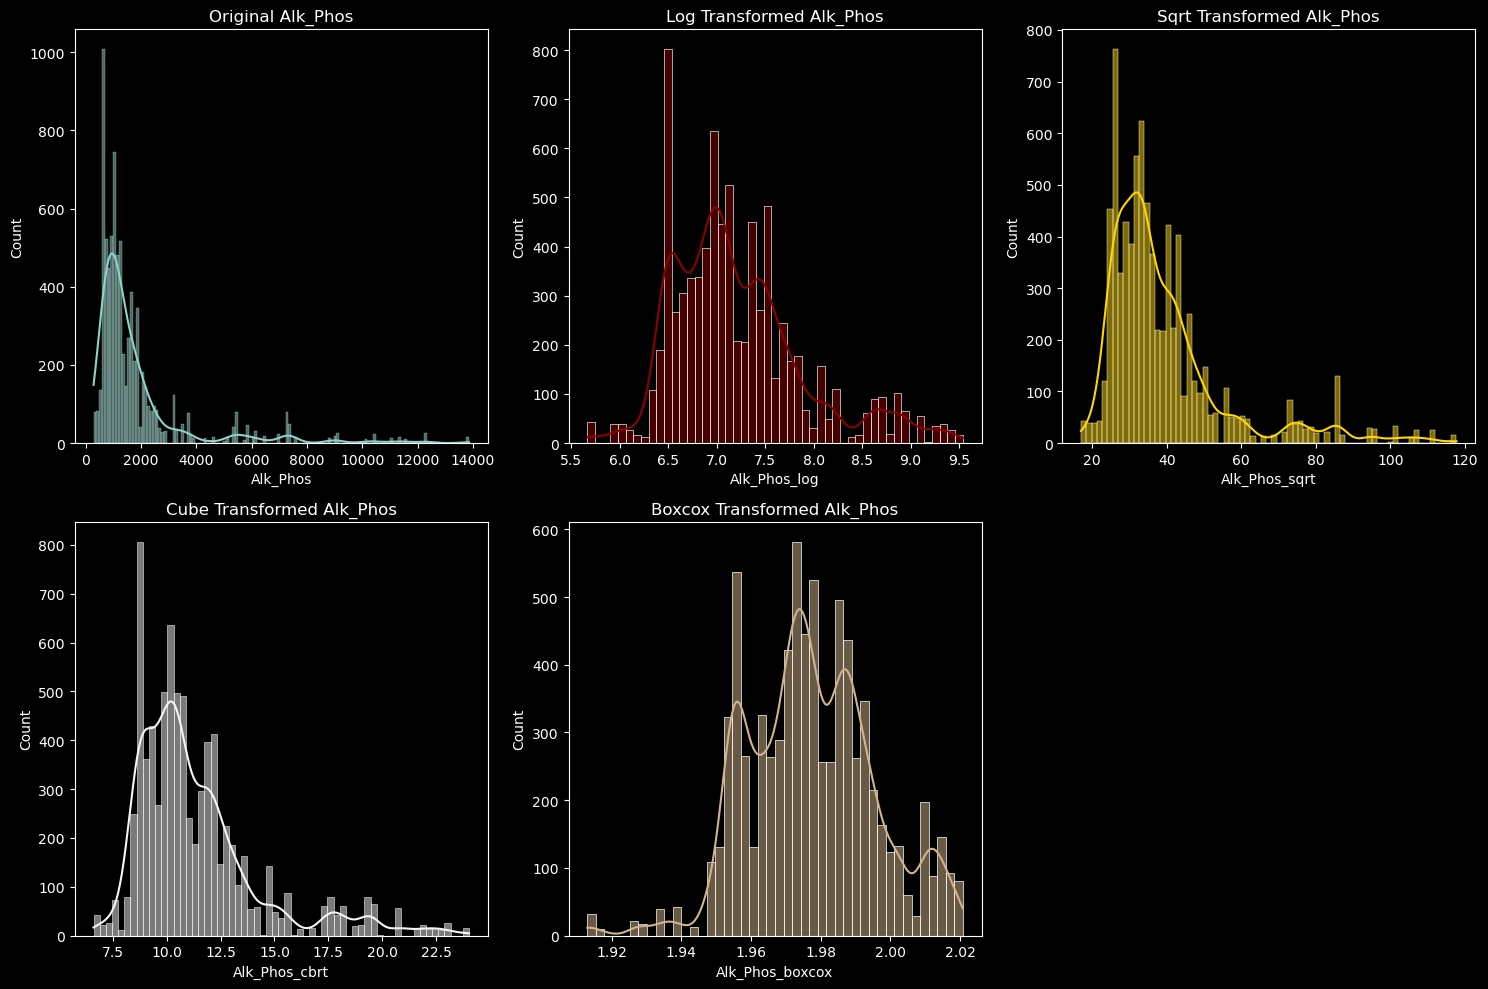

In [48]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
sns.histplot(cirrhosis_train['Alk_Phos'], kde=True)
plt.title('Original Alk_Phos')

plt.subplot(2, 3, 2)
sns.histplot(cirrhosis_train_log['Alk_Phos_log'], kde=True,color='#8B0000')
plt.title('Log Transformed Alk_Phos')

plt.subplot(2, 3, 3)
sns.histplot(cirrhosis_train_sqrt['Alk_Phos_sqrt'], kde=True,color='#FFD700')
plt.title('Sqrt Transformed Alk_Phos')

plt.subplot(2, 3, 4)
sns.histplot(cirrhosis_train_cube['Alk_Phos_cbrt'], kde=True,color='#F5F5F5')
plt.title('Cube Transformed Alk_Phos')

plt.subplot(2, 3, 5)
sns.histplot(cirrhosis_train_boxcox['Alk_Phos_boxcox'], kde=True,color='#D2B48C')
plt.title('Boxcox Transformed Alk_Phos')

plt.tight_layout()
plt.show()

In [49]:
cirrhosis_train['Alk_Phos'], _ = stats.boxcox(cirrhosis_train['Alk_Phos'])
data_test['Alk_Phos'], _ = stats.boxcox(data_test['Alk_Phos'])

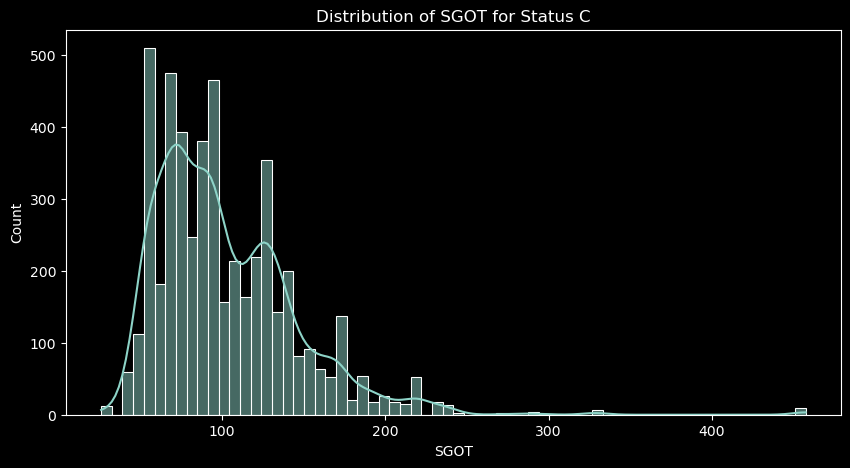

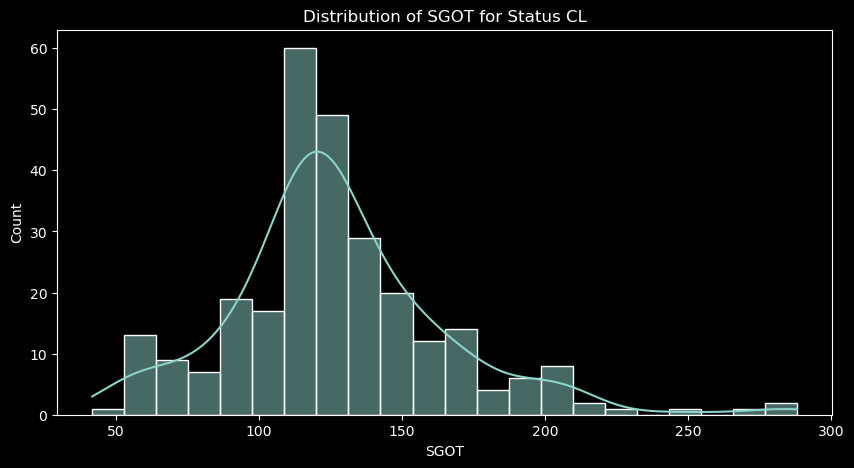

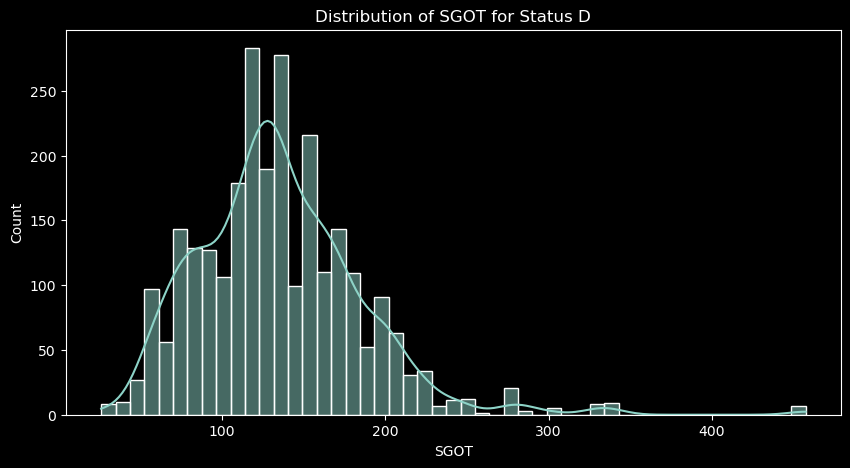

In [50]:
for status in status_target:
  plt.figure(figsize=(10, 5))
  sns.histplot(cirrhosis_train[cirrhosis_train['Status'] == status]['SGOT'], kde=True)
  plt.title(f'Distribution of SGOT for Status {status}')
  plt.show()

In [51]:
def categorize_sgot(value):
  if 10 < value <= 40:
    return 'Normal'
  elif value > 40:
    return 'Abnormal'
  else:
    return 0

cirrhosis_train['SGOT_Category'] = cirrhosis_train['SGOT'].apply(categorize_sgot)
data_test['SGOT_Category'] = data_test['SGOT'].apply(categorize_sgot)

In [52]:
cirrhosis_train['SGOT_Category'].value_counts()

SGOT_Category
Abnormal    7885
Normal        20
Name: count, dtype: int64

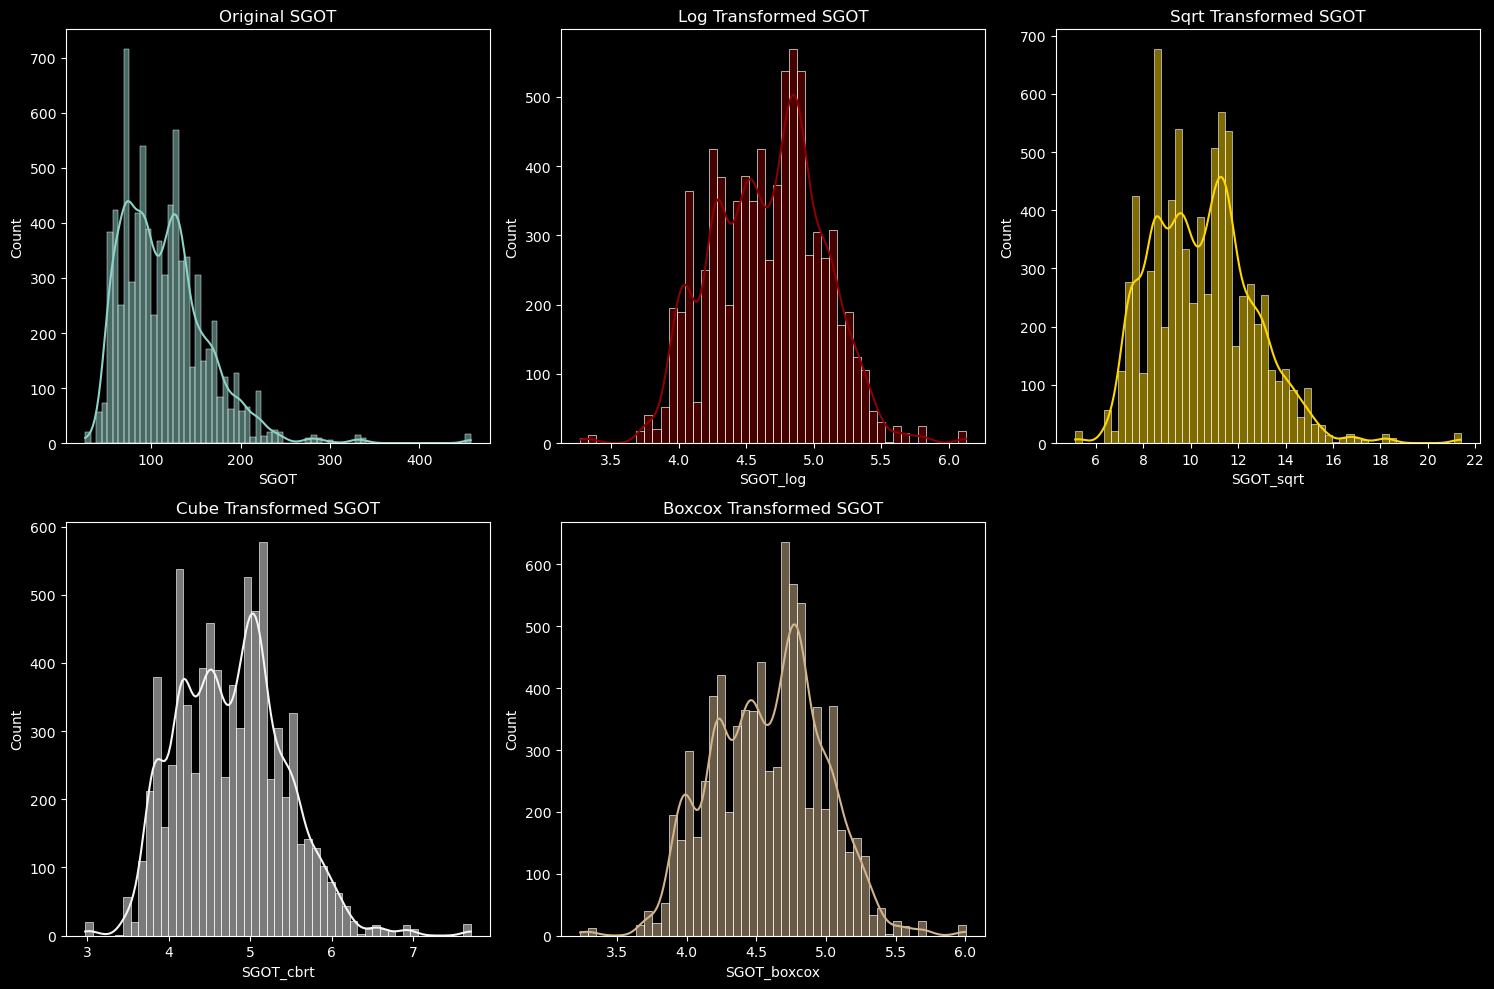

In [53]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
sns.histplot(cirrhosis_train['SGOT'], kde=True)
plt.title('Original SGOT')

plt.subplot(2, 3, 2)
sns.histplot(cirrhosis_train_log['SGOT_log'], kde=True,color='#8B0000')
plt.title('Log Transformed SGOT')

plt.subplot(2, 3, 3)
sns.histplot(cirrhosis_train_sqrt['SGOT_sqrt'], kde=True,color='#FFD700')
plt.title('Sqrt Transformed SGOT')

plt.subplot(2, 3, 4)
sns.histplot(cirrhosis_train_cube['SGOT_cbrt'], kde=True,color='#F5F5F5')
plt.title('Cube Transformed SGOT')

plt.subplot(2, 3, 5)
sns.histplot(cirrhosis_train_boxcox['SGOT_boxcox'], kde=True,color='#D2B48C')
plt.title('Boxcox Transformed SGOT')

plt.tight_layout()
plt.show()

In [54]:
cirrhosis_train['SGOT'], _ = stats.boxcox(cirrhosis_train['SGOT'])
data_test['SGOT'], _ = stats.boxcox(data_test['SGOT'])

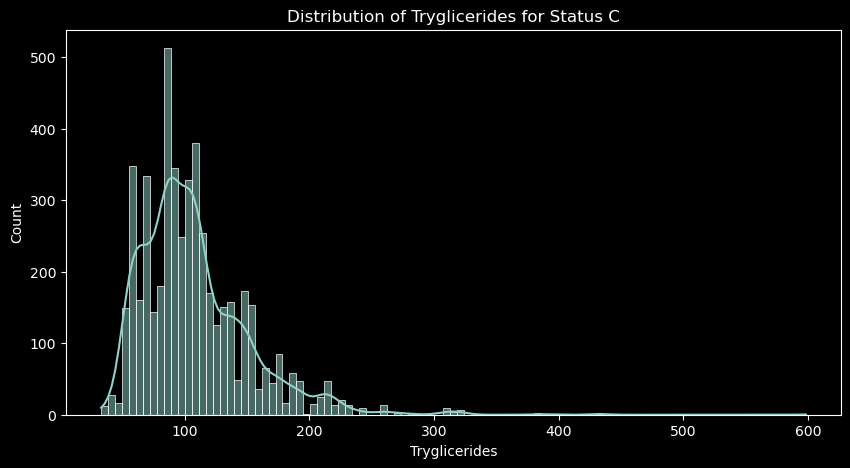

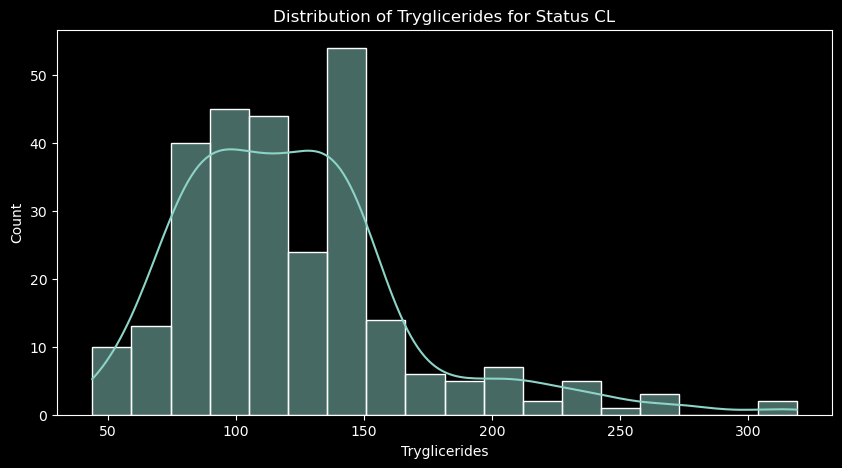

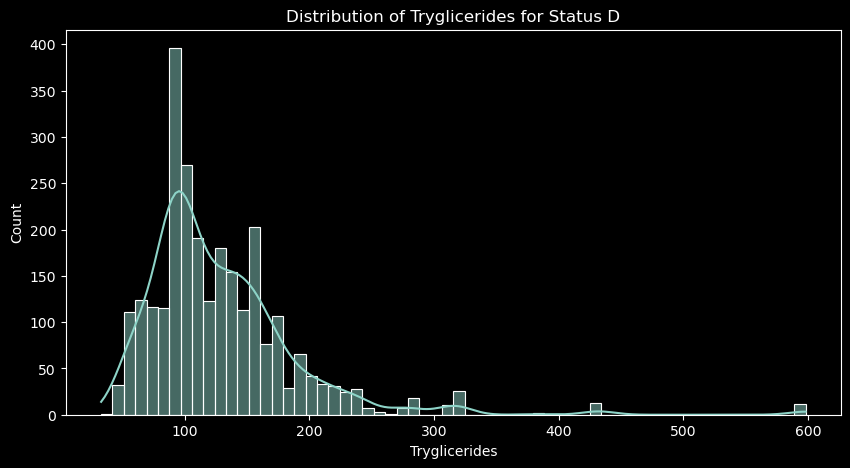

In [55]:
for status in status_target:
  plt.figure(figsize=(10, 5))
  sns.histplot(cirrhosis_train[cirrhosis_train['Status'] == status]['Tryglicerides'], kde=True)
  plt.title(f'Distribution of Tryglicerides for Status {status}')
  plt.show()

In [56]:
def categorize_tryglicerides(value):
  if value <= 150:
    return 'Normal'
  elif value > 150:
    return 'Abnormal'
  else:
    return 0

cirrhosis_train['Tryglicerides_Category'] = cirrhosis_train['Tryglicerides'].apply(categorize_tryglicerides)
data_test['Tryglicerides_Category'] = data_test['Tryglicerides'].apply(categorize_tryglicerides)

In [57]:
cirrhosis_train['Tryglicerides_Category'].value_counts()

Tryglicerides_Category
Normal      6413
Abnormal    1492
Name: count, dtype: int64

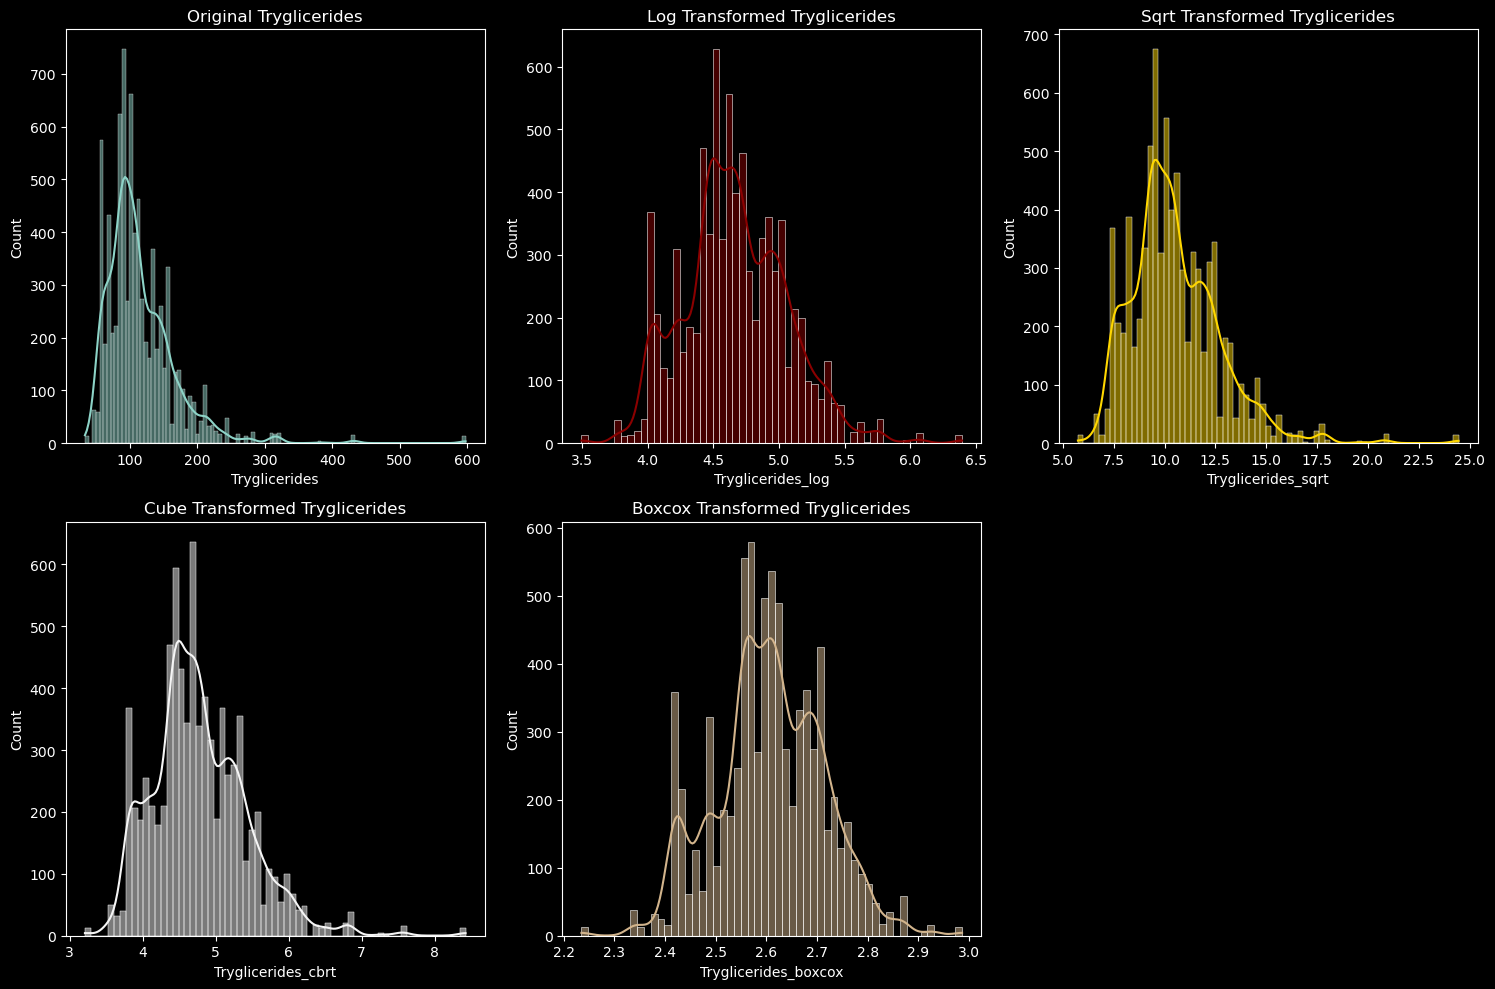

In [58]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
sns.histplot(cirrhosis_train['Tryglicerides'], kde=True)
plt.title('Original Tryglicerides')

plt.subplot(2, 3, 2)
sns.histplot(cirrhosis_train_log['Tryglicerides_log'], kde=True,color='#8B0000')
plt.title('Log Transformed Tryglicerides')

plt.subplot(2, 3, 3)
sns.histplot(cirrhosis_train_sqrt['Tryglicerides_sqrt'], kde=True,color='#FFD700')
plt.title('Sqrt Transformed Tryglicerides')

plt.subplot(2, 3, 4)
sns.histplot(cirrhosis_train_cube['Tryglicerides_cbrt'], kde=True,color='#F5F5F5')
plt.title('Cube Transformed Tryglicerides')

plt.subplot(2, 3, 5)
sns.histplot(cirrhosis_train_boxcox['Tryglicerides_boxcox'], kde=True,color='#D2B48C')
plt.title('Boxcox Transformed Tryglicerides')

plt.tight_layout()
plt.show()

In [59]:
cirrhosis_train['Tryglicerides'], _ = stats.boxcox(cirrhosis_train['Tryglicerides'])
data_test['Tryglicerides'], _ = stats.boxcox(data_test['Tryglicerides'])

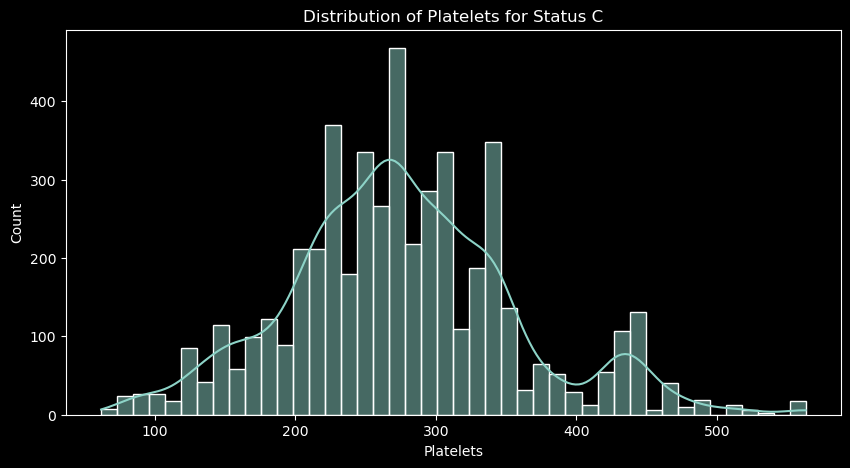

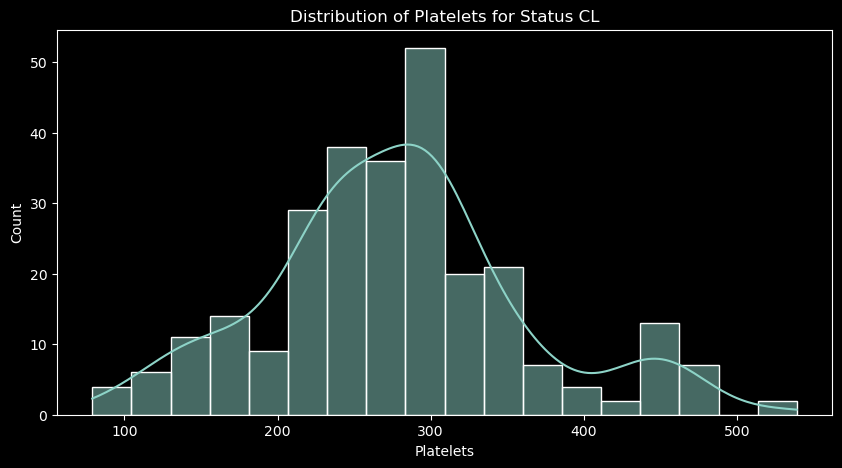

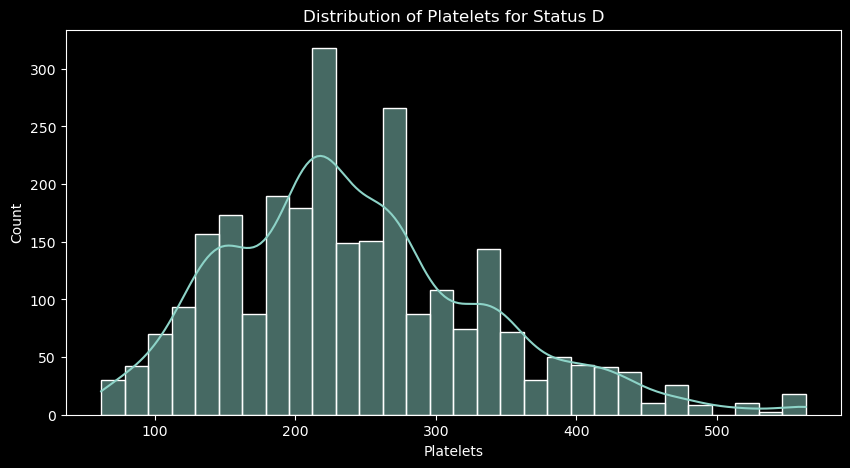

In [60]:
for status in status_target:
  plt.figure(figsize=(10, 5))
  sns.histplot(cirrhosis_train[cirrhosis_train['Status'] == status]['Platelets'], kde=True)
  plt.title(f'Distribution of Platelets for Status {status}')
  plt.show()

In [61]:
def categorize_platelets(value):
  if 150 < value <= 450:
    return 'Normal'
  elif value <= 150 or value > 450:
    return 'Abnormal'
  else:
    return 0

cirrhosis_train['Platelets_Category'] = cirrhosis_train['Platelets'].apply(categorize_platelets)
data_test['Platelets_Category'] = data_test['Platelets'].apply(categorize_platelets)

In [62]:
cirrhosis_train['Platelets_Category'].value_counts()

Platelets_Category
Normal      7015
Abnormal     890
Name: count, dtype: int64

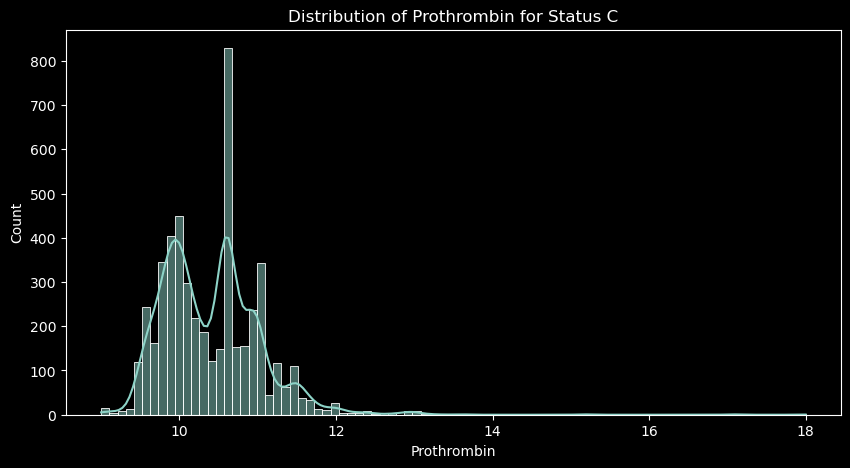

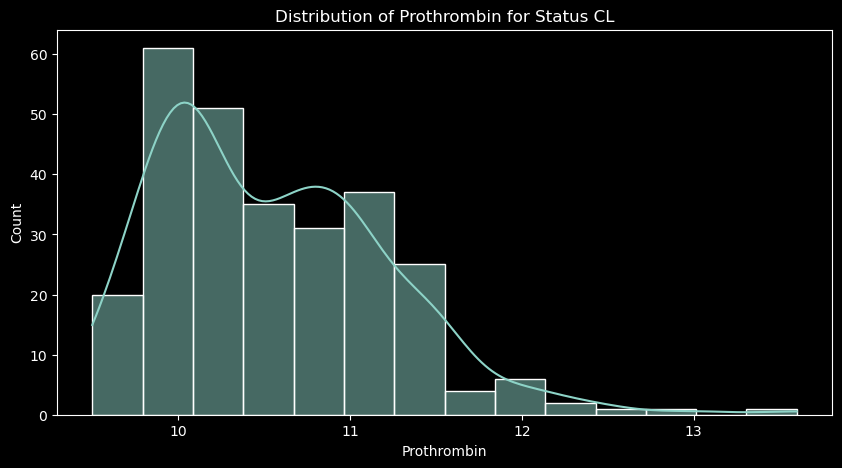

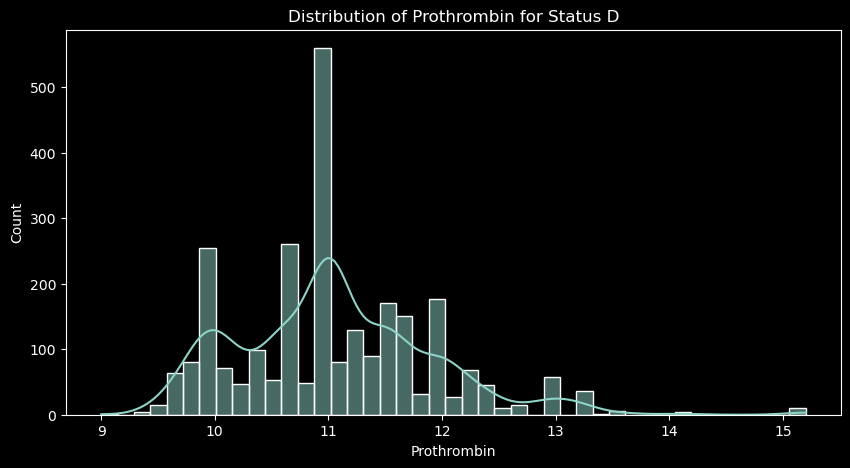

In [63]:
for status in status_target:
  plt.figure(figsize=(10, 5))
  sns.histplot(cirrhosis_train[cirrhosis_train['Status'] == status]['Prothrombin'], kde=True)
  plt.title(f'Distribution of Prothrombin for Status {status}')
  plt.show()

In [64]:
def categorize_prothrombin(value):
  if 11 <= value <= 13.5:
    return 'Normal'
  elif value < 11 or value > 13.5:
    return 'Abnormal'
  else:
    return 0

cirrhosis_train['Prothrombin_Category'] = cirrhosis_train['Prothrombin'].apply(categorize_prothrombin)
data_test['Prothrombin_Category'] = data_test['Prothrombin'].apply(categorize_prothrombin)

In [65]:
cirrhosis_train['Prothrombin_Category'].value_counts()

Prothrombin_Category
Abnormal    5423
Normal      2482
Name: count, dtype: int64

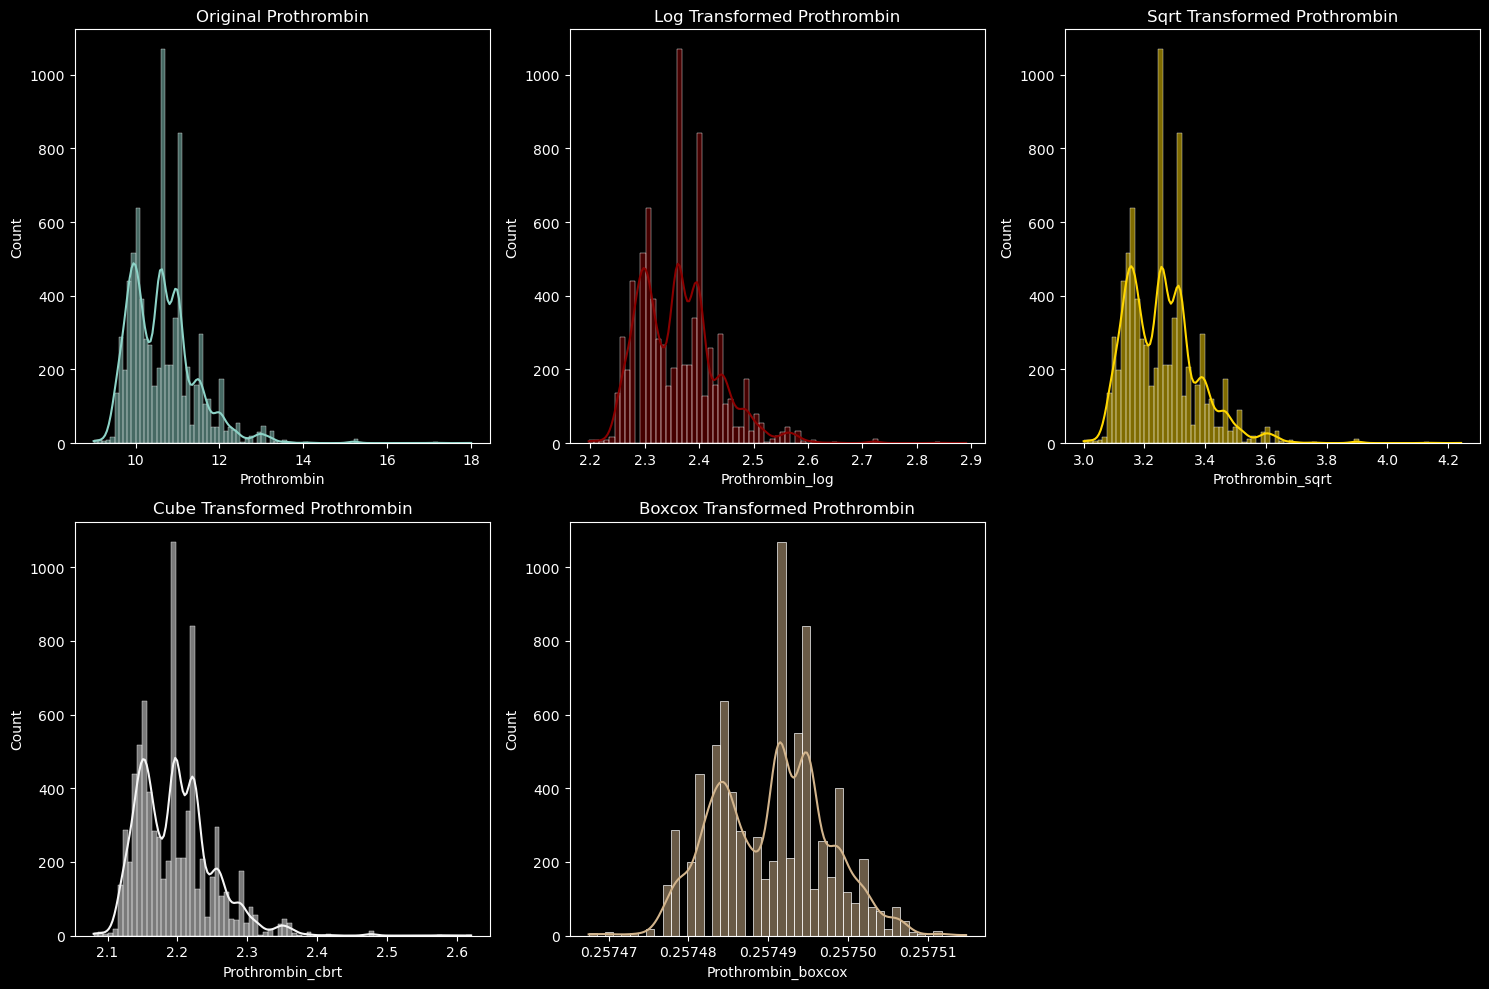

In [66]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
sns.histplot(cirrhosis_train['Prothrombin'], kde=True)
plt.title('Original Prothrombin')

plt.subplot(2, 3, 2)
sns.histplot(cirrhosis_train_log['Prothrombin_log'], kde=True,color='#8B0000')
plt.title('Log Transformed Prothrombin')

plt.subplot(2, 3, 3)
sns.histplot(cirrhosis_train_sqrt['Prothrombin_sqrt'], kde=True,color='#FFD700')
plt.title('Sqrt Transformed Prothrombin')

plt.subplot(2, 3, 4)
sns.histplot(cirrhosis_train_cube['Prothrombin_cbrt'], kde=True,color='#F5F5F5')
plt.title('Cube Transformed Prothrombin')

plt.subplot(2, 3, 5)
sns.histplot(cirrhosis_train_boxcox['Prothrombin_boxcox'], kde=True,color='#D2B48C')
plt.title('Boxcox Transformed Prothrombin')

plt.tight_layout()
plt.show()

In [67]:
cirrhosis_train['Prothrombin'], _ = stats.boxcox(cirrhosis_train['Prothrombin'])
data_test['Prothrombin'], _ = stats.boxcox(data_test['Prothrombin'])

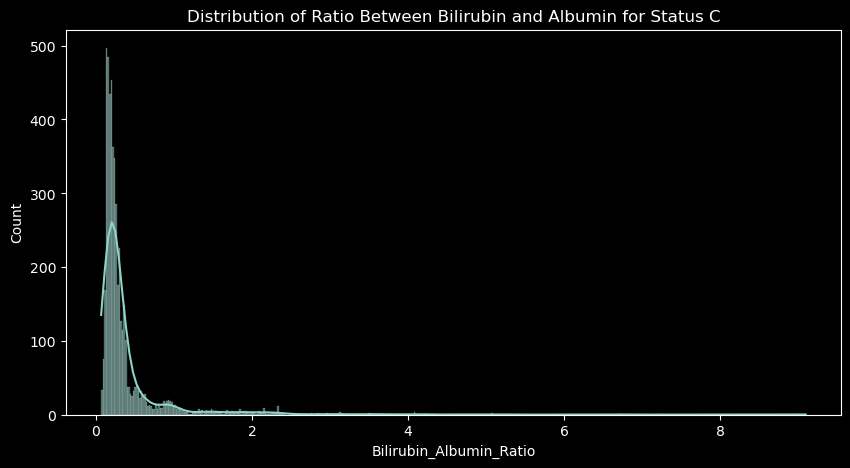

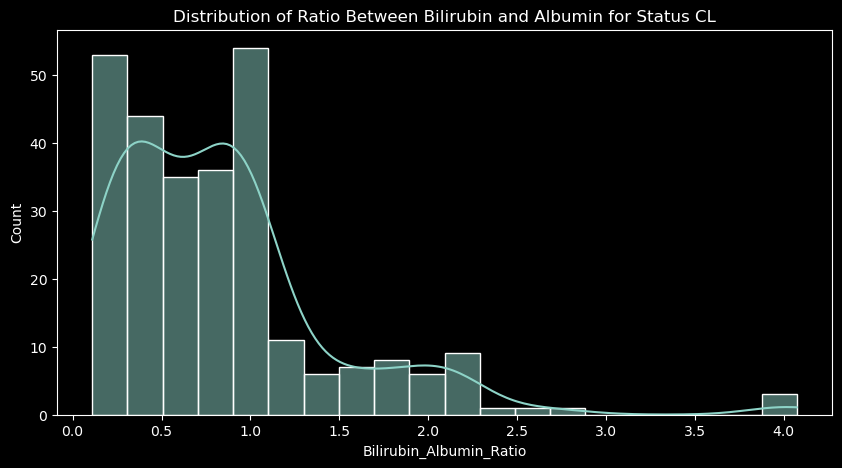

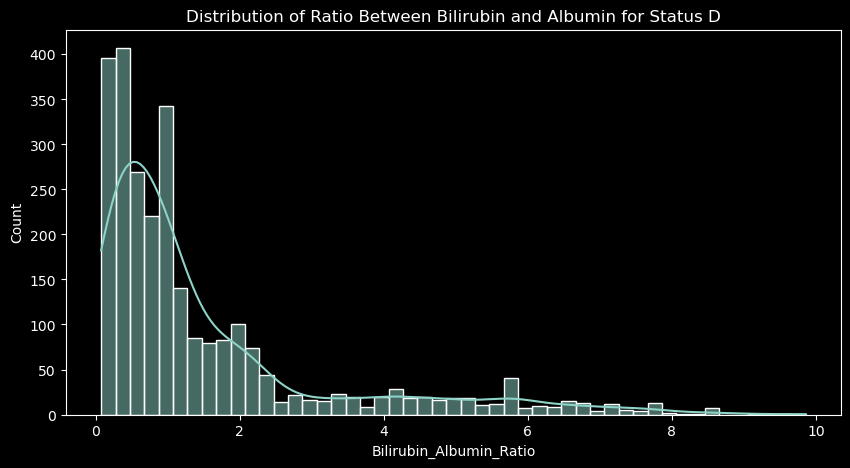

In [68]:
for status in status_target:
  plt.figure(figsize=(10, 5))
  sns.histplot(cirrhosis_train[cirrhosis_train['Status'] == status]['Bilirubin_Albumin_Ratio'], kde=True)
  plt.title(f'Distribution of Ratio Between Bilirubin and Albumin for Status {status}')
  plt.show()

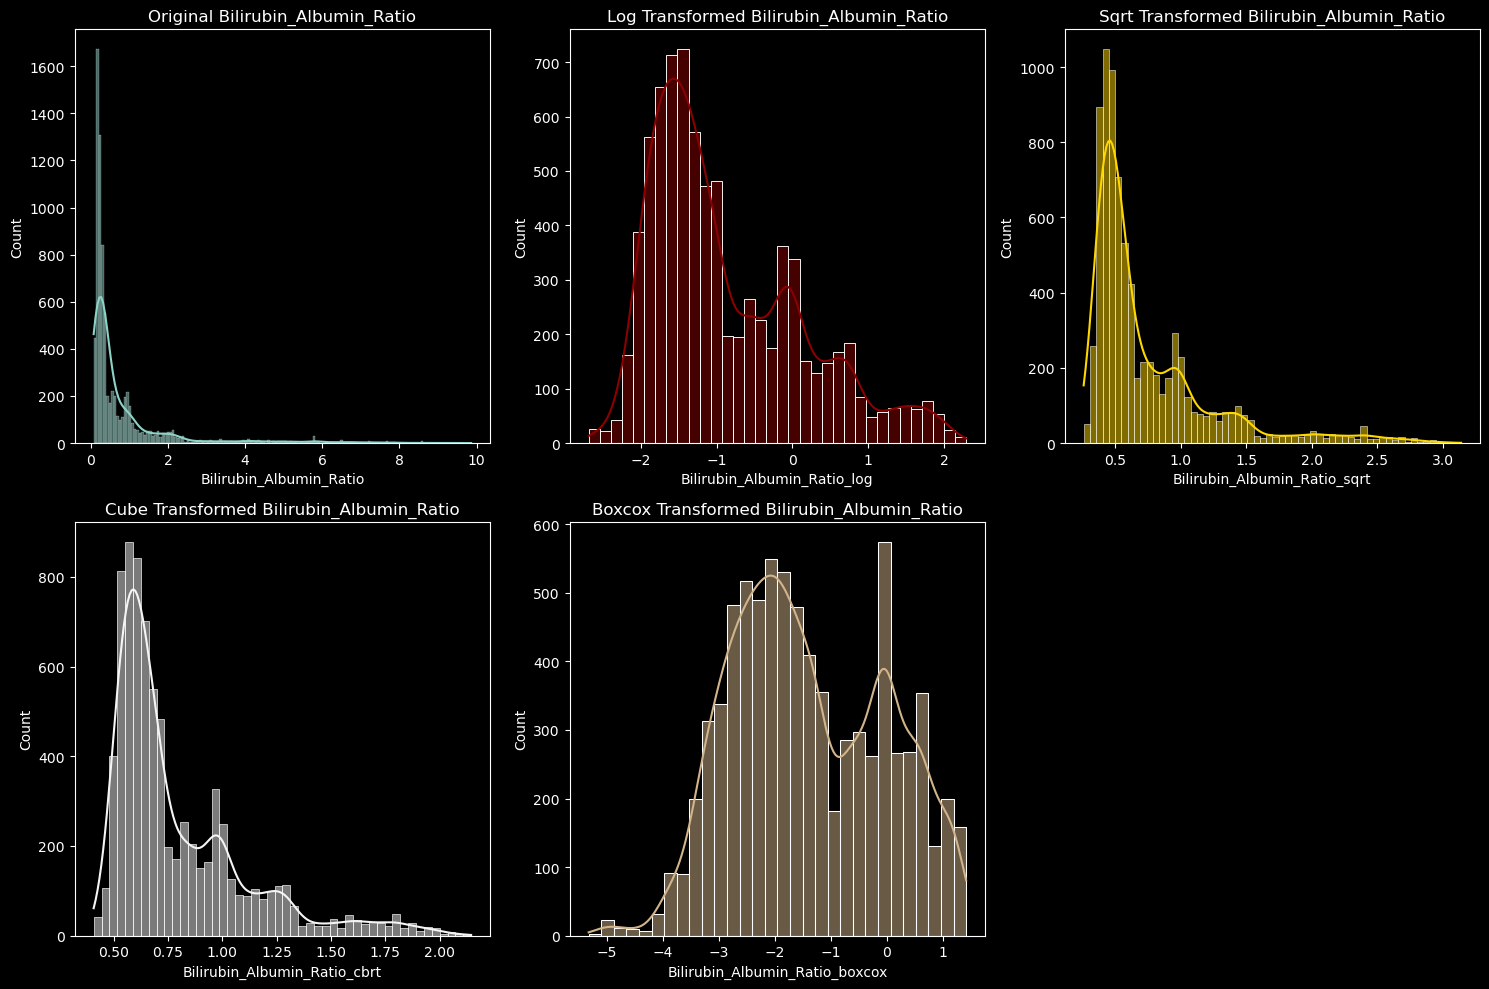

In [69]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
sns.histplot(cirrhosis_train['Bilirubin_Albumin_Ratio'], kde=True)
plt.title('Original Bilirubin_Albumin_Ratio')

plt.subplot(2, 3, 2)
sns.histplot(cirrhosis_train_log['Bilirubin_Albumin_Ratio_log'], kde=True,color='#8B0000')
plt.title('Log Transformed Bilirubin_Albumin_Ratio')

plt.subplot(2, 3, 3)
sns.histplot(cirrhosis_train_sqrt['Bilirubin_Albumin_Ratio_sqrt'], kde=True,color='#FFD700')
plt.title('Sqrt Transformed Bilirubin_Albumin_Ratio')

plt.subplot(2, 3, 4)
sns.histplot(cirrhosis_train_cube['Bilirubin_Albumin_Ratio_cbrt'], kde=True,color='#F5F5F5')
plt.title('Cube Transformed Bilirubin_Albumin_Ratio')

plt.subplot(2, 3, 5)
sns.histplot(cirrhosis_train_boxcox['Bilirubin_Albumin_Ratio_boxcox'], kde=True,color='#D2B48C')
plt.title('Boxcox Transformed Bilirubin_Albumin_Ratio')

plt.tight_layout()
plt.show()

In [70]:
cirrhosis_train['Bilirubin_Albumin_Ratio'], _ = stats.boxcox(cirrhosis_train['Bilirubin_Albumin_Ratio'])
data_test['Bilirubin_Albumin_Ratio'], _ = stats.boxcox(data_test['Bilirubin_Albumin_Ratio'])

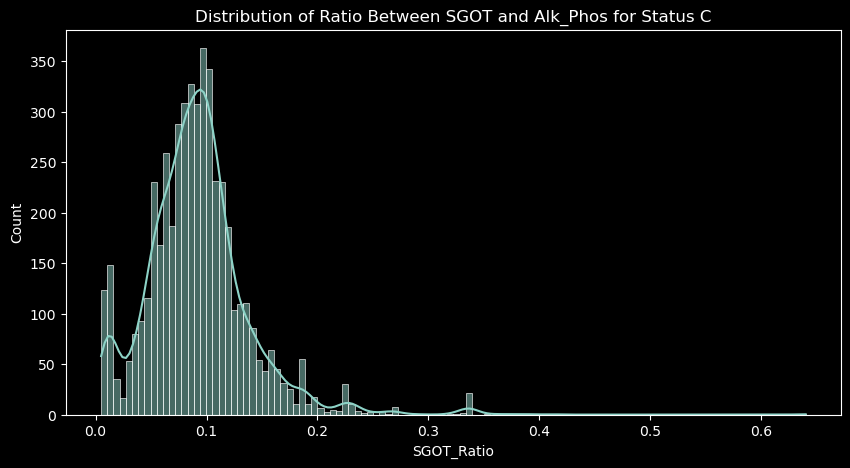

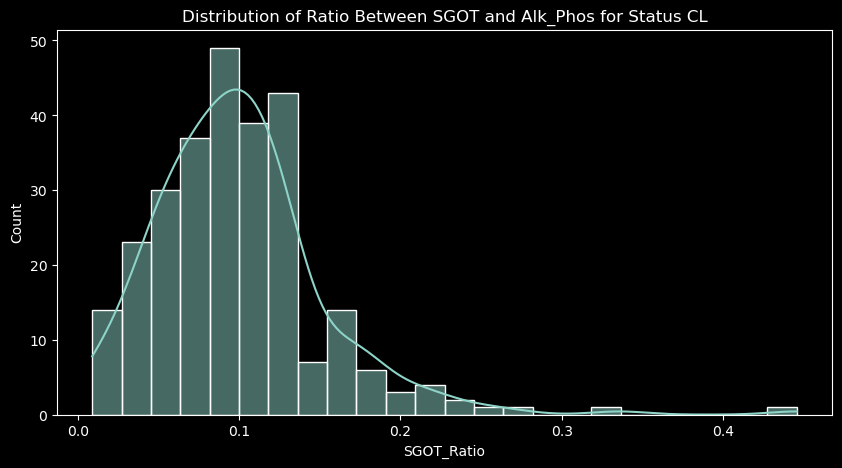

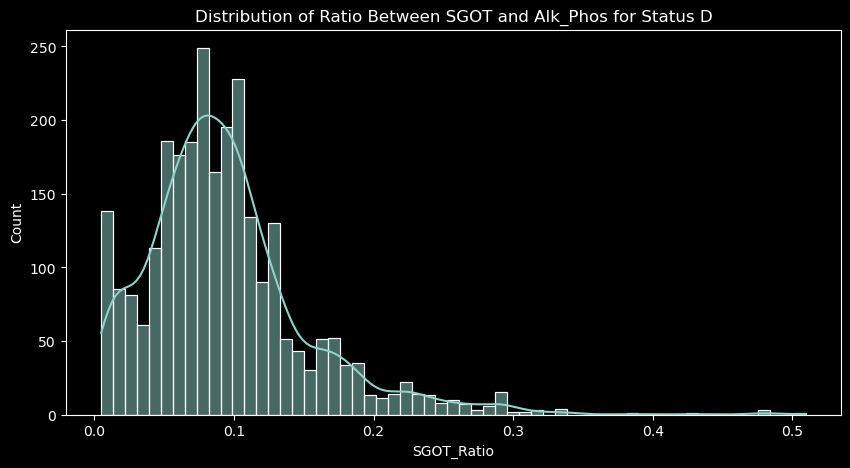

In [71]:
for status in status_target:
  plt.figure(figsize=(10, 5))
  sns.histplot(cirrhosis_train[cirrhosis_train['Status'] == status]['SGOT_Ratio'], kde=True)
  plt.title(f'Distribution of Ratio Between SGOT and Alk_Phos for Status {status}')
  plt.show()

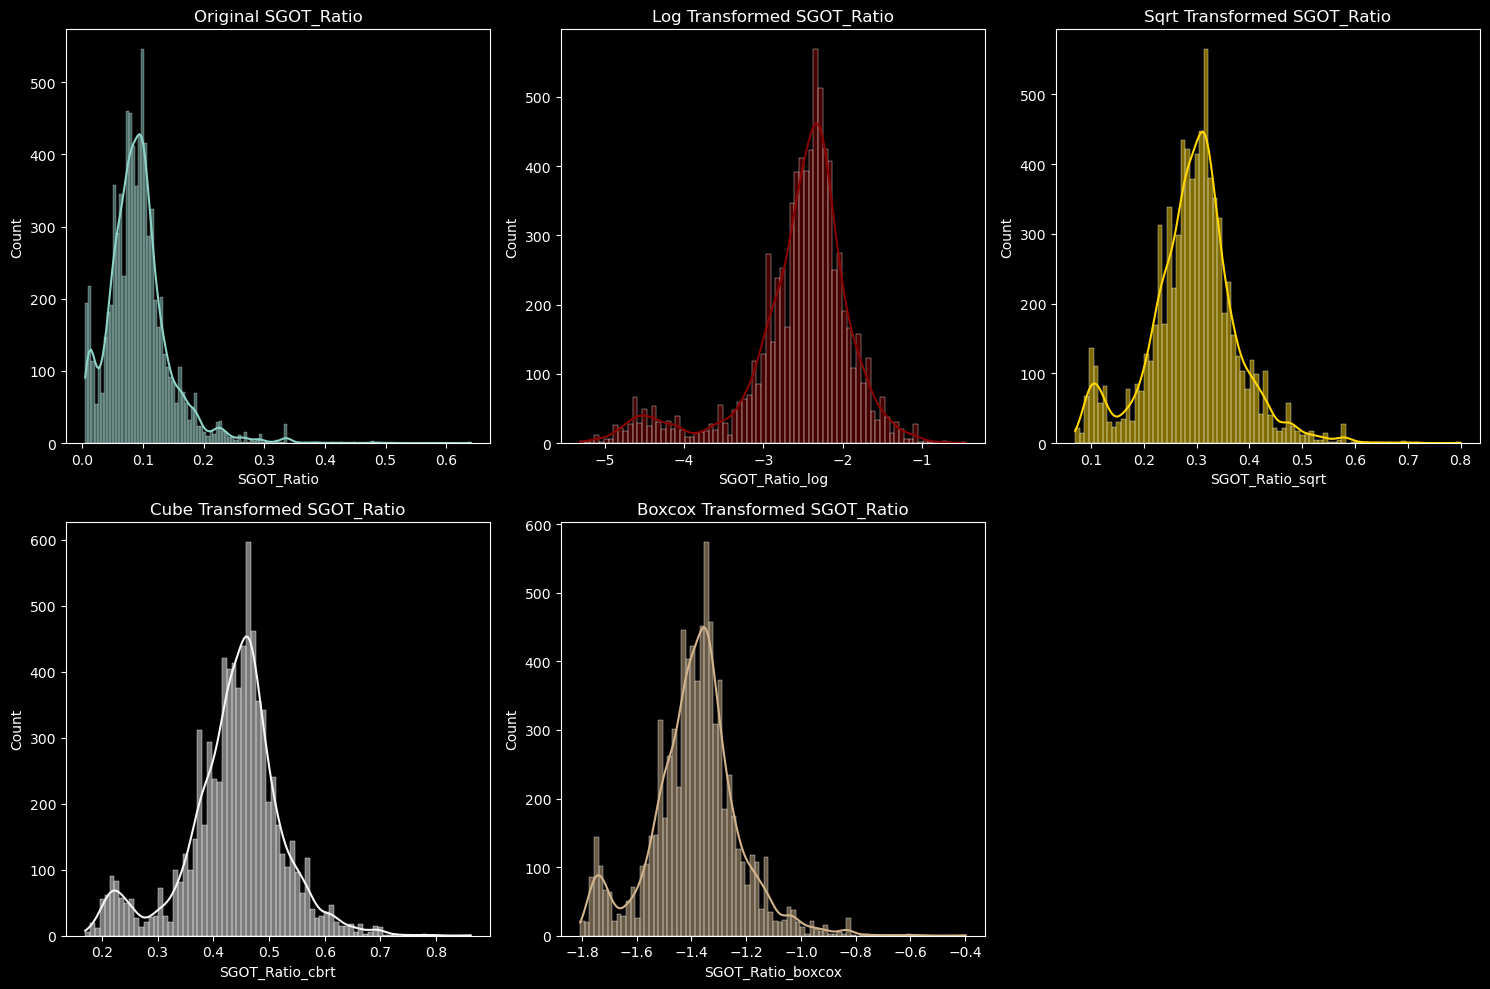

In [72]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
sns.histplot(cirrhosis_train['SGOT_Ratio'], kde=True)
plt.title('Original SGOT_Ratio')

plt.subplot(2, 3, 2)
sns.histplot(cirrhosis_train_log['SGOT_Ratio_log'], kde=True,color='#8B0000')
plt.title('Log Transformed SGOT_Ratio')

plt.subplot(2, 3, 3)
sns.histplot(cirrhosis_train_sqrt['SGOT_Ratio_sqrt'], kde=True,color='#FFD700')
plt.title('Sqrt Transformed SGOT_Ratio')

plt.subplot(2, 3, 4)
sns.histplot(cirrhosis_train_cube['SGOT_Ratio_cbrt'], kde=True,color='#F5F5F5')
plt.title('Cube Transformed SGOT_Ratio')

plt.subplot(2, 3, 5)
sns.histplot(cirrhosis_train_boxcox['SGOT_Ratio_boxcox'], kde=True,color='#D2B48C')
plt.title('Boxcox Transformed SGOT_Ratio')

plt.tight_layout()
plt.show()

In [73]:
Q1_log = cirrhosis_train_log['SGOT_Ratio_log'].quantile(0.25)
Q3_log = cirrhosis_train_log['SGOT_Ratio_log'].quantile(0.75)
IQR_log = Q3_log - Q1_log
lower_bound_log = Q1_log - 1.5 * IQR_log
upper_bound_log = Q3_log + 1.5 * IQR_log

outliers_log = cirrhosis_train_log[(cirrhosis_train_log['SGOT_Ratio_log'] < lower_bound_log) | (cirrhosis_train_log['SGOT_Ratio_log'] > upper_bound_log)]

Q1_cbrt = cirrhosis_train_cube['SGOT_Ratio_cbrt'].quantile(0.25)
Q3_cbrt = cirrhosis_train_cube['SGOT_Ratio_cbrt'].quantile(0.75)
IQR_cbrt = Q3_cbrt - Q1_cbrt
lower_bound_cbrt = Q1_cbrt - 1.5 * IQR_cbrt
upper_bound_cbrt = Q3_cbrt + 1.5 * IQR_cbrt

outliers_cbrt = cirrhosis_train_cube[(cirrhosis_train_cube['SGOT_Ratio_cbrt'] < lower_bound_cbrt) | (cirrhosis_train_cube['SGOT_Ratio_cbrt'] > upper_bound_cbrt)]

print(f"Number of outliers in SGOT_Ratio_log: {len(outliers_log)}")
print(f"Number of outliers in SGOT_Ratio_cbrt: {len(outliers_cbrt)}")

Number of outliers in SGOT_Ratio_log: 649
Number of outliers in SGOT_Ratio_cbrt: 653


In [74]:
cirrhosis_train['SGOT_Ratio'] = np.log(cirrhosis_train['SGOT_Ratio'])
data_test['SGOT_Ratio'] = np.log(data_test['SGOT_Ratio'])

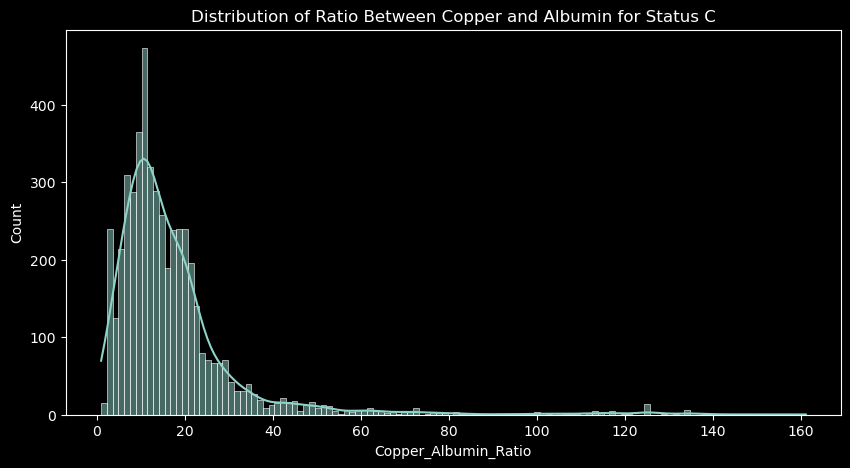

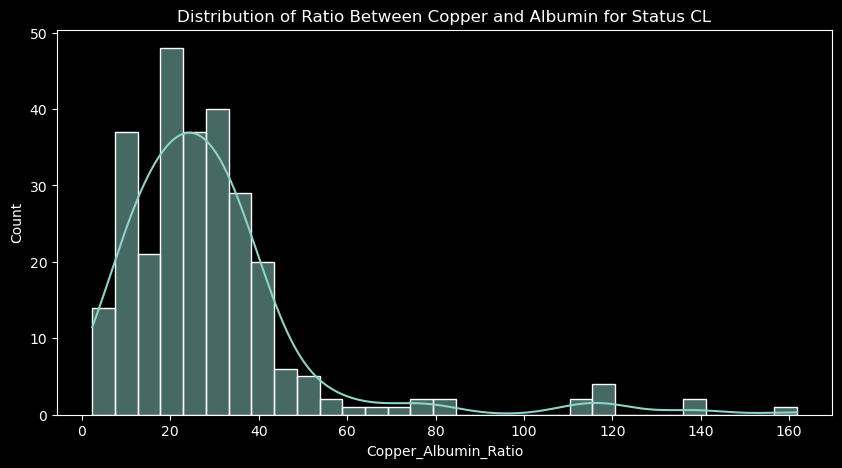

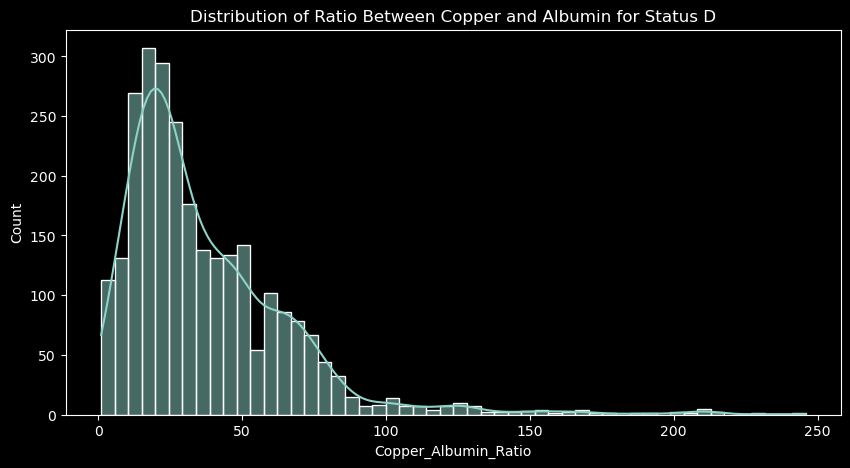

In [75]:
for status in status_target:
  plt.figure(figsize=(10, 5))
  sns.histplot(cirrhosis_train[cirrhosis_train['Status'] == status]['Copper_Albumin_Ratio'], kde=True)
  plt.title(f'Distribution of Ratio Between Copper and Albumin for Status {status}')
  plt.show()

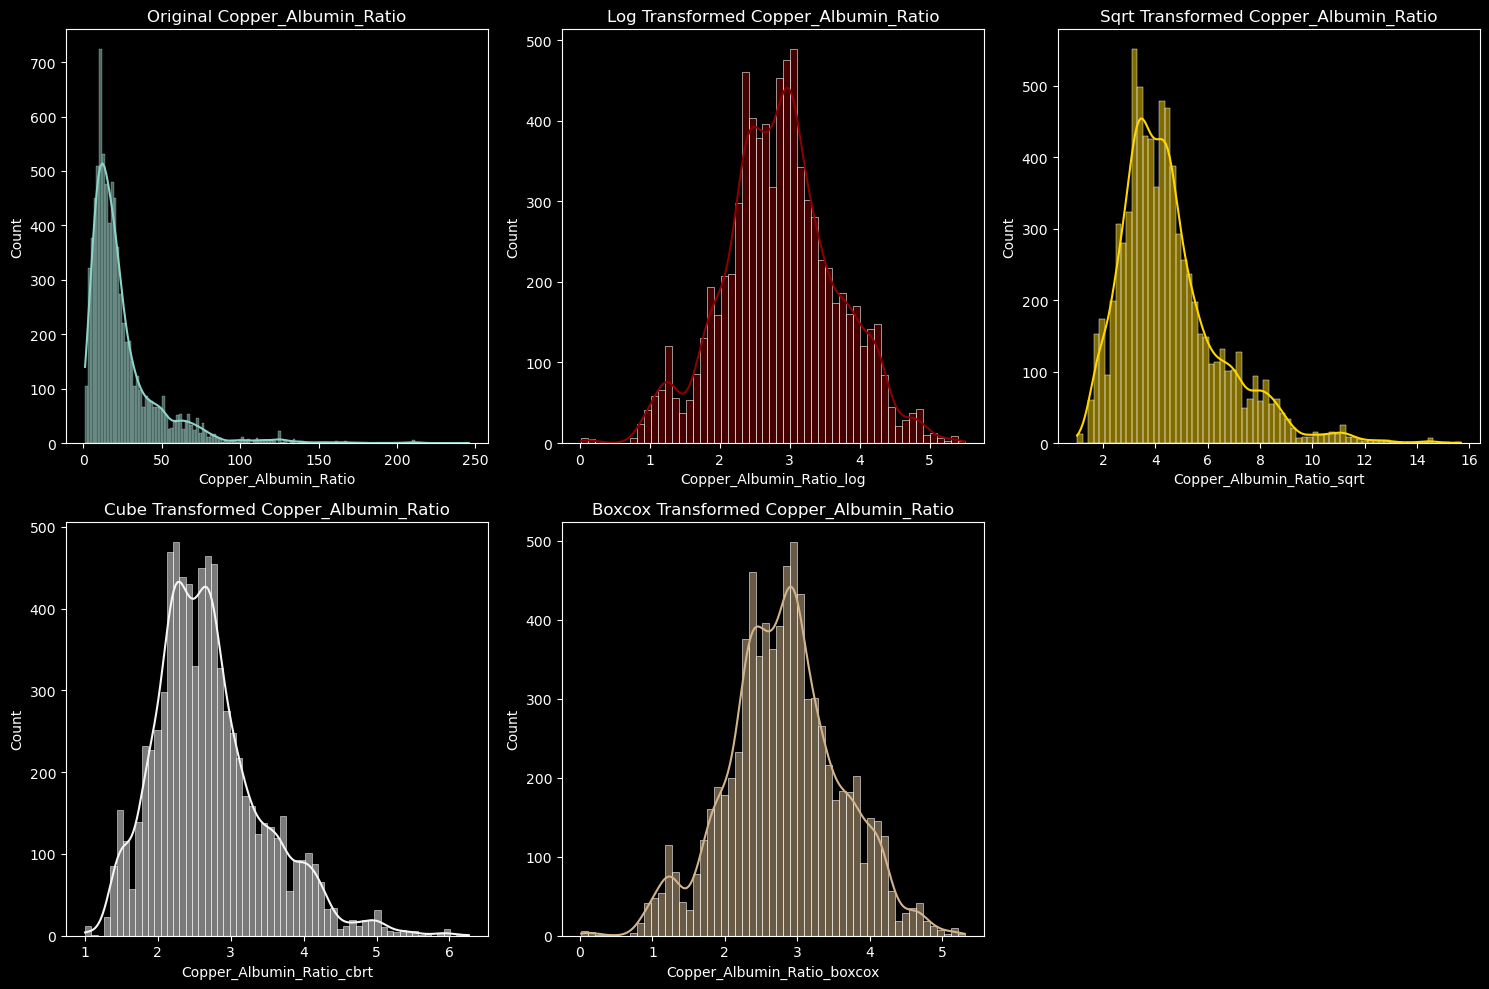

In [76]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
sns.histplot(cirrhosis_train['Copper_Albumin_Ratio'], kde=True)
plt.title('Original Copper_Albumin_Ratio')

plt.subplot(2, 3, 2)
sns.histplot(cirrhosis_train_log['Copper_Albumin_Ratio_log'], kde=True,color='#8B0000')
plt.title('Log Transformed Copper_Albumin_Ratio')

plt.subplot(2, 3, 3)
sns.histplot(cirrhosis_train_sqrt['Copper_Albumin_Ratio_sqrt'], kde=True,color='#FFD700')
plt.title('Sqrt Transformed Copper_Albumin_Ratio')

plt.subplot(2, 3, 4)
sns.histplot(cirrhosis_train_cube['Copper_Albumin_Ratio_cbrt'], kde=True,color='#F5F5F5')
plt.title('Cube Transformed Copper_Albumin_Ratio')

plt.subplot(2, 3, 5)
sns.histplot(cirrhosis_train_boxcox['Copper_Albumin_Ratio_boxcox'], kde=True,color='#D2B48C')
plt.title('Boxcox Transformed Copper_Albumin_Ratio')

plt.tight_layout()
plt.show()

In [77]:
cirrhosis_train['Copper_Albumin_Ratio'], _ = stats.boxcox(cirrhosis_train['Copper_Albumin_Ratio'])
data_test['Copper_Albumin_Ratio'], _ = stats.boxcox(data_test['Copper_Albumin_Ratio'])

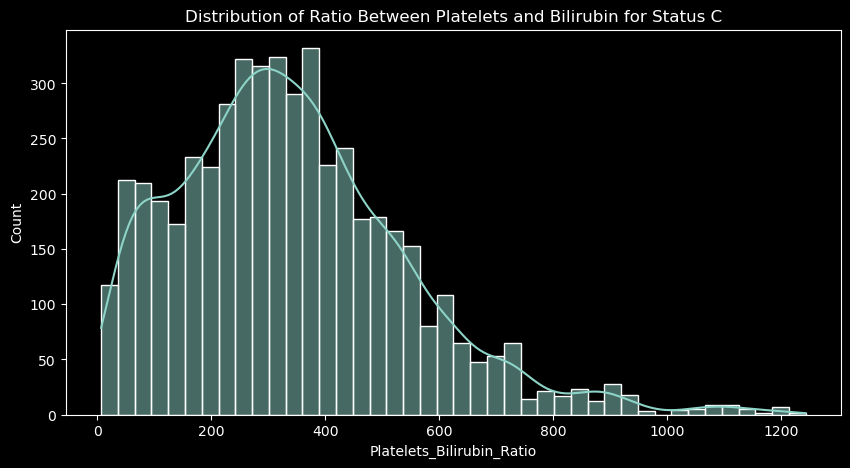

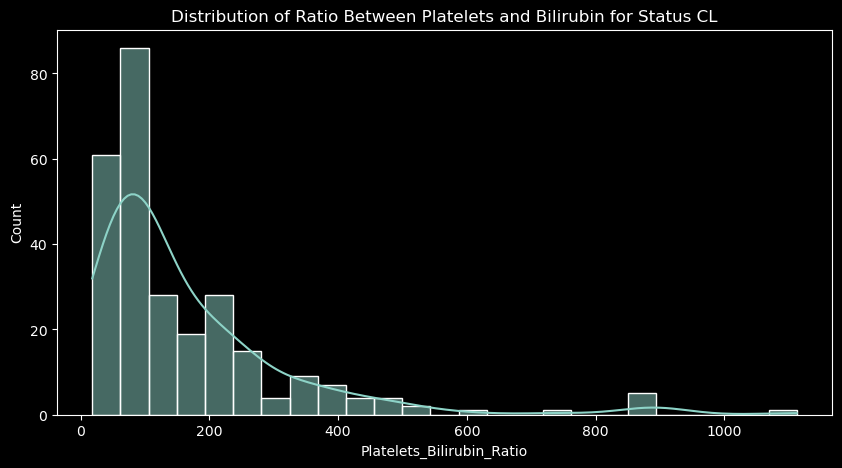

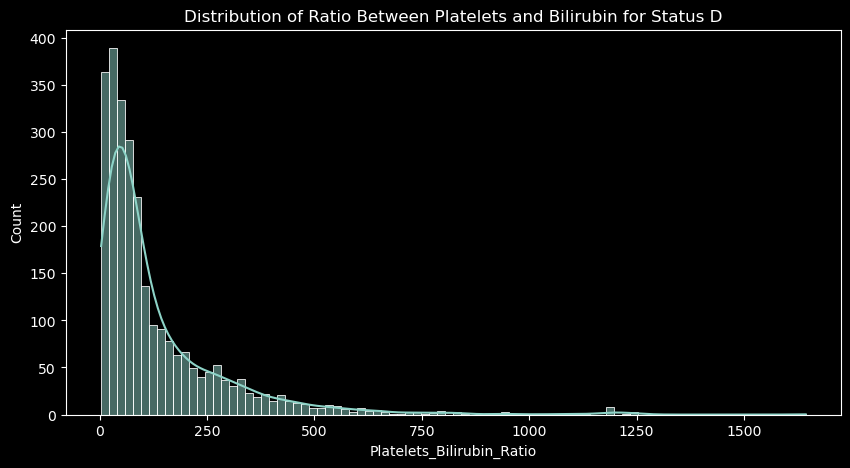

In [78]:
for status in status_target:
  plt.figure(figsize=(10, 5))
  sns.histplot(cirrhosis_train[cirrhosis_train['Status'] == status]['Platelets_Bilirubin_Ratio'], kde=True)
  plt.title(f'Distribution of Ratio Between Platelets and Bilirubin for Status {status}')
  plt.show()

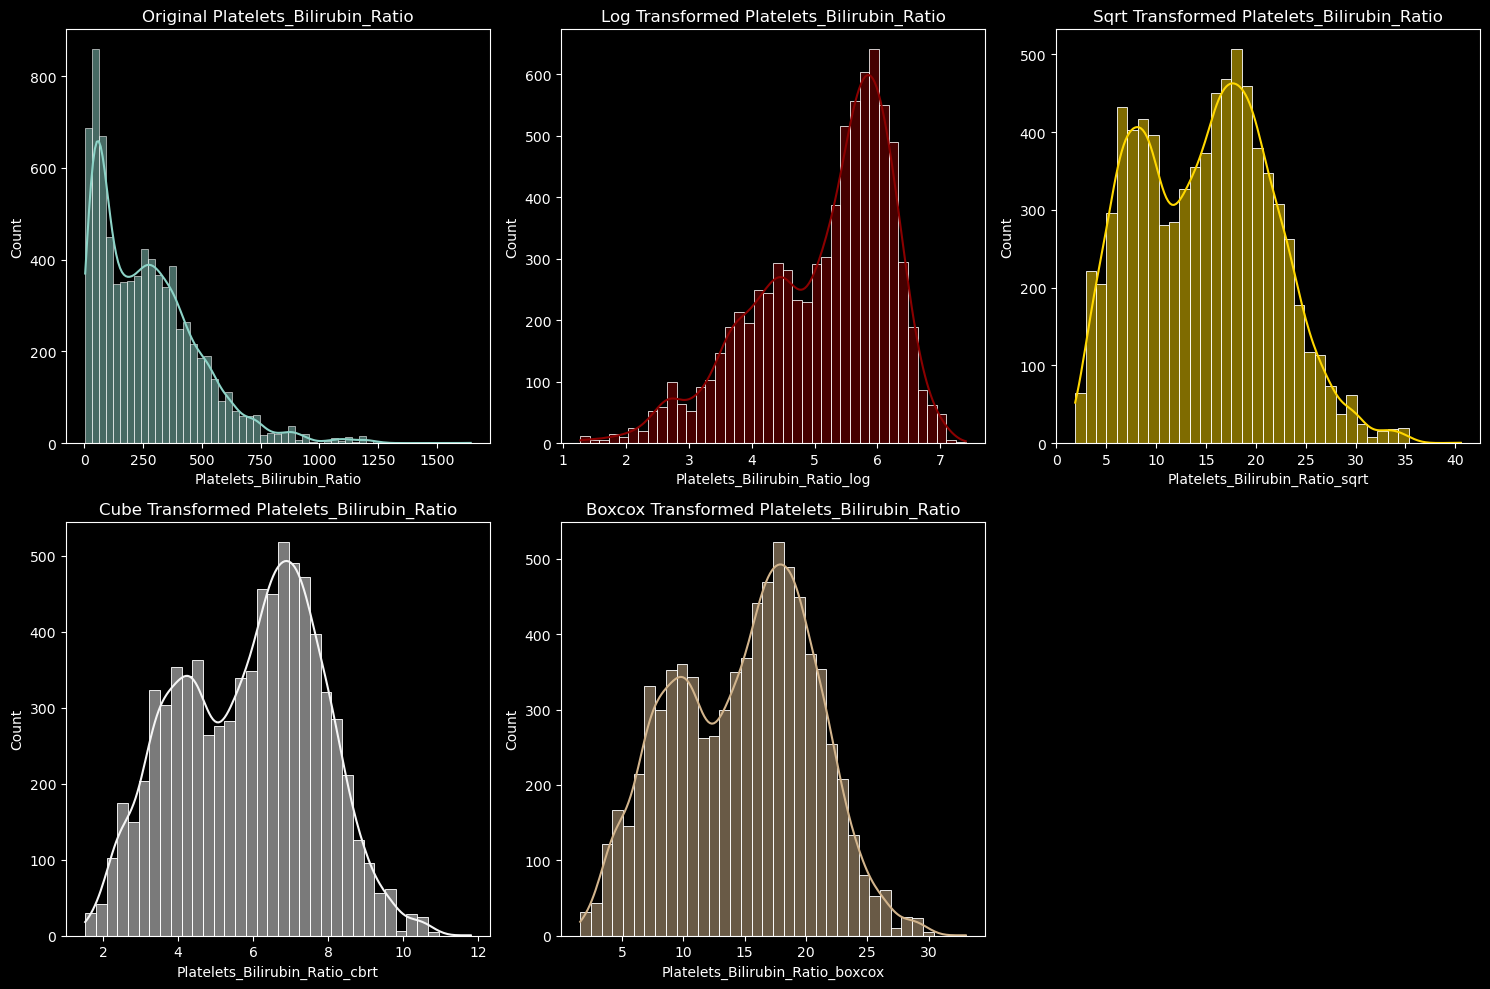

In [79]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
sns.histplot(cirrhosis_train['Platelets_Bilirubin_Ratio'], kde=True)
plt.title('Original Platelets_Bilirubin_Ratio')

plt.subplot(2, 3, 2)
sns.histplot(cirrhosis_train_log['Platelets_Bilirubin_Ratio_log'], kde=True,color='#8B0000')
plt.title('Log Transformed Platelets_Bilirubin_Ratio')

plt.subplot(2, 3, 3)
sns.histplot(cirrhosis_train_sqrt['Platelets_Bilirubin_Ratio_sqrt'], kde=True,color='#FFD700')
plt.title('Sqrt Transformed Platelets_Bilirubin_Ratio')

plt.subplot(2, 3, 4)
sns.histplot(cirrhosis_train_cube['Platelets_Bilirubin_Ratio_cbrt'], kde=True,color='#F5F5F5')
plt.title('Cube Transformed Platelets_Bilirubin_Ratio')

plt.subplot(2, 3, 5)
sns.histplot(cirrhosis_train_boxcox['Platelets_Bilirubin_Ratio_boxcox'], kde=True,color='#D2B48C')
plt.title('Boxcox Transformed Platelets_Bilirubin_Ratio')

plt.tight_layout()
plt.show()

In [80]:
Q1_log = cirrhosis_train_log['Platelets_Bilirubin_Ratio_log'].quantile(0.25)
Q3_log = cirrhosis_train_log['Platelets_Bilirubin_Ratio_log'].quantile(0.75)
IQR_log = Q3_log - Q1_log
lower_bound_log = Q1_log - 1.5 * IQR_log
upper_bound_log = Q3_log + 1.5 * IQR_log


outliers_log = cirrhosis_train_log[(cirrhosis_train_log['Platelets_Bilirubin_Ratio_log'] < lower_bound_log) | (cirrhosis_train_log['Platelets_Bilirubin_Ratio_log'] > upper_bound_log)]

Q1_sqrt = cirrhosis_train_sqrt['Platelets_Bilirubin_Ratio_sqrt'].quantile(0.25)
Q3_sqrt = cirrhosis_train_sqrt['Platelets_Bilirubin_Ratio_sqrt'].quantile(0.75)
IQR_sqrt = Q3_sqrt - Q1_sqrt
lower_bound_sqrt = Q1_sqrt - 1.5 * IQR_sqrt
upper_bound_sqrt = Q3_sqrt + 1.5 * IQR_sqrt

outliers_sqrt = cirrhosis_train_sqrt[(cirrhosis_train_sqrt['Platelets_Bilirubin_Ratio_sqrt'] < lower_bound_sqrt) | (cirrhosis_train_sqrt['Platelets_Bilirubin_Ratio_sqrt'] > upper_bound_sqrt)]

Q1_cbrt = cirrhosis_train_cube['Platelets_Bilirubin_Ratio_cbrt'].quantile(0.25)
Q3_cbrt = cirrhosis_train_cube['Platelets_Bilirubin_Ratio_cbrt'].quantile(0.75)
IQR_cbrt = Q3_cbrt - Q1_cbrt
lower_bound_cbrt = Q1_cbrt - 1.5 * IQR_cbrt
upper_bound_cbrt = Q3_cbrt + 1.5 * IQR_cbrt


outliers_cbrt = cirrhosis_train_cube[(cirrhosis_train_cube['Platelets_Bilirubin_Ratio_cbrt'] < lower_bound_cbrt) | (cirrhosis_train_cube['Platelets_Bilirubin_Ratio_cbrt'] > upper_bound_cbrt)]

Q1_boxcox = cirrhosis_train_boxcox['Platelets_Bilirubin_Ratio_boxcox'].quantile(0.25)
Q3_boxcox = cirrhosis_train_boxcox['Platelets_Bilirubin_Ratio_boxcox'].quantile(0.75)
IQR_boxcox = Q3_boxcox - Q1_boxcox
lower_bound_boxcox = Q1_boxcox - 1.5 * IQR_boxcox
upper_bound_boxcox = Q3_boxcox + 1.5 * IQR_boxcox

outliers_boxcox = cirrhosis_train_boxcox[(cirrhosis_train_boxcox['Platelets_Bilirubin_Ratio_boxcox'] < lower_bound_boxcox) | (cirrhosis_train_boxcox['Platelets_Bilirubin_Ratio_boxcox'] > upper_bound_boxcox)]

print(f"Number of outliers in Platelets_Bilirubin_Ratio_log: {len(outliers_log)}")
print(f"Number of outliers in Platelets_Bilirubin_Ratio_sqrt: {len(outliers_sqrt)}")
print(f"Number of outliers in Platelets_Bilirubin_Ratio_cbrt: {len(outliers_cbrt)}")
print(f"Number of outliers in Platelets_Bilirubin_Ratio_boxcox: {len(outliers_boxcox)}")

Number of outliers in Platelets_Bilirubin_Ratio_log: 55
Number of outliers in Platelets_Bilirubin_Ratio_sqrt: 1
Number of outliers in Platelets_Bilirubin_Ratio_cbrt: 1
Number of outliers in Platelets_Bilirubin_Ratio_boxcox: 1


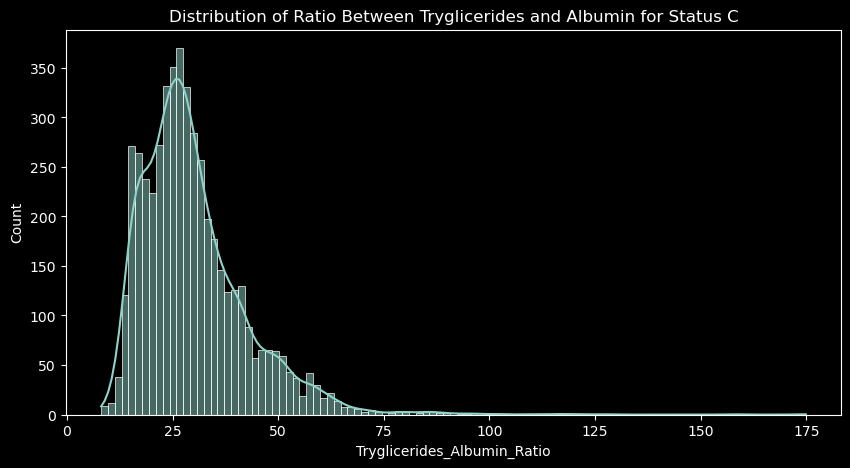

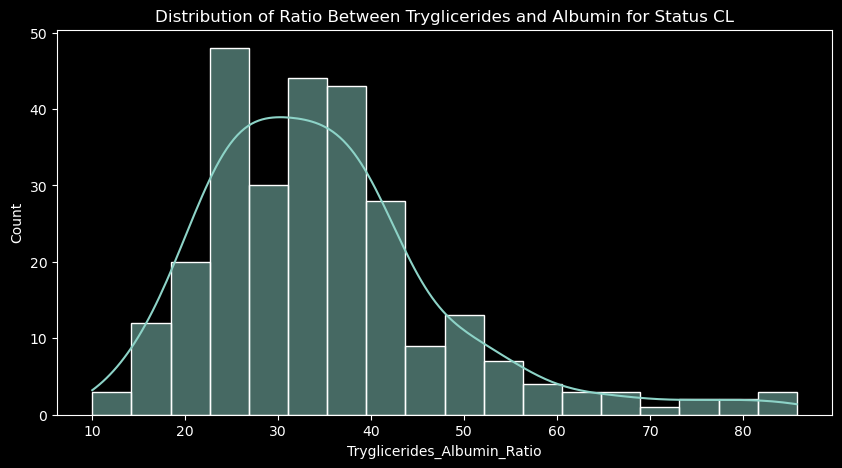

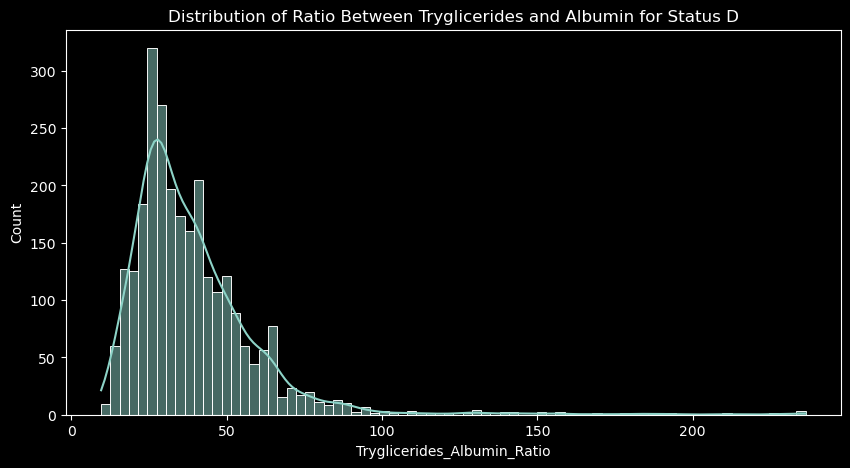

In [81]:
for status in status_target:
  plt.figure(figsize=(10, 5))
  sns.histplot(cirrhosis_train[cirrhosis_train['Status'] == status]['Tryglicerides_Albumin_Ratio'], kde=True)
  plt.title(f'Distribution of Ratio Between Tryglicerides and Albumin for Status {status}')
  plt.show()

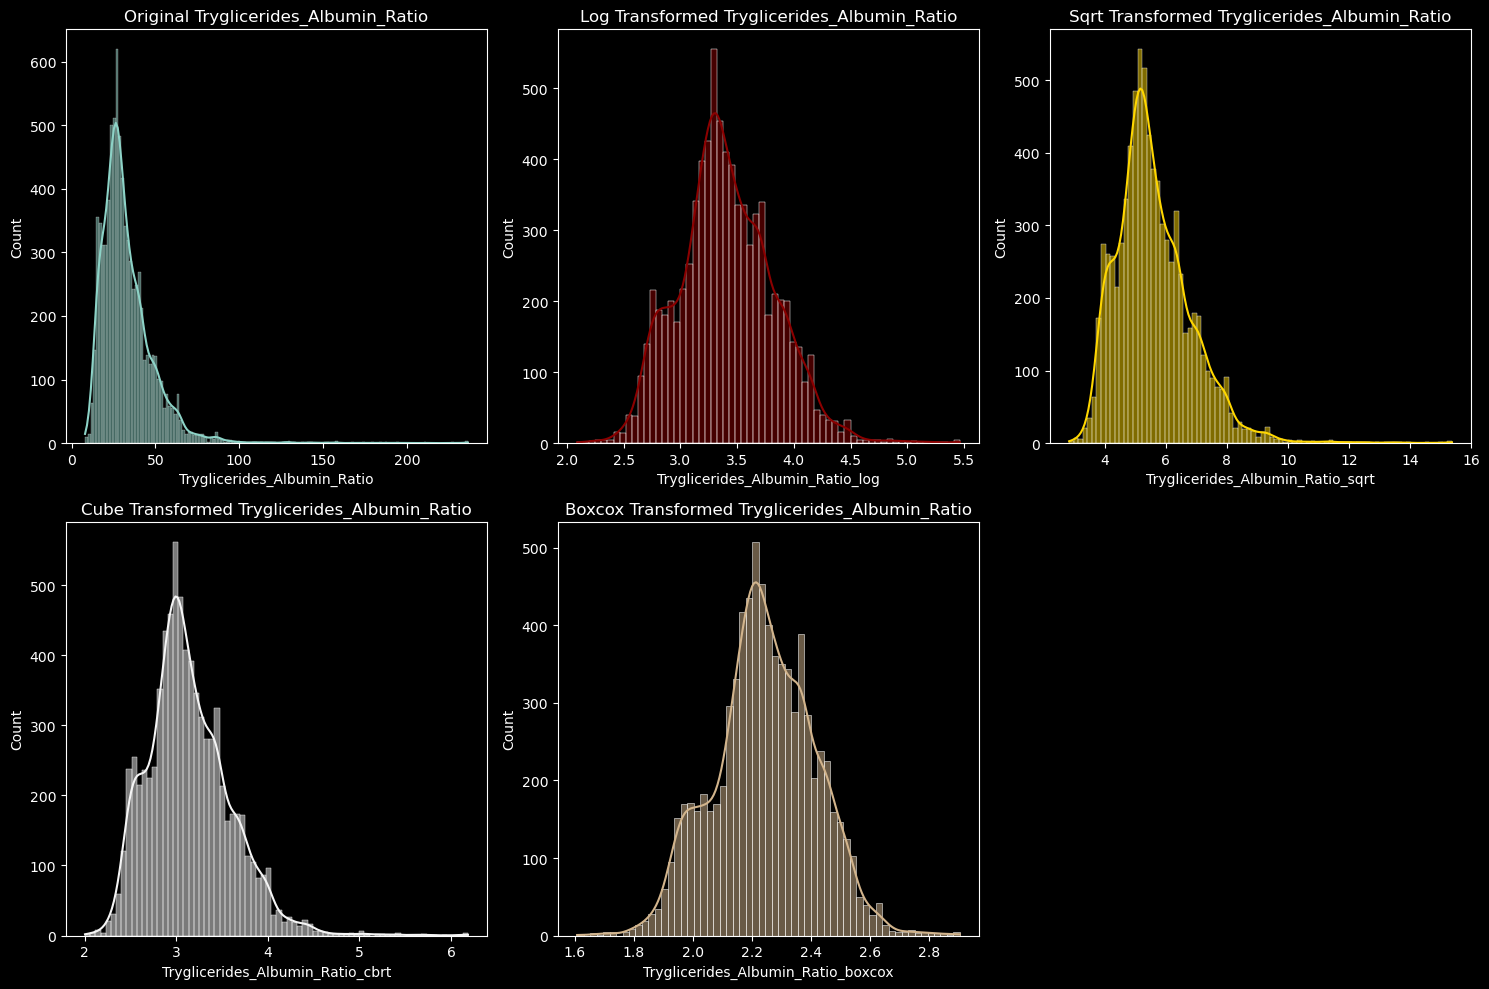

In [82]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
sns.histplot(cirrhosis_train['Tryglicerides_Albumin_Ratio'], kde=True)
plt.title('Original Tryglicerides_Albumin_Ratio')

plt.subplot(2, 3, 2)
sns.histplot(cirrhosis_train_log['Tryglicerides_Albumin_Ratio_log'], kde=True,color='#8B0000')
plt.title('Log Transformed Tryglicerides_Albumin_Ratio')

plt.subplot(2, 3, 3)
sns.histplot(cirrhosis_train_sqrt['Tryglicerides_Albumin_Ratio_sqrt'], kde=True,color='#FFD700')
plt.title('Sqrt Transformed Tryglicerides_Albumin_Ratio')

plt.subplot(2, 3, 4)
sns.histplot(cirrhosis_train_cube['Tryglicerides_Albumin_Ratio_cbrt'], kde=True,color='#F5F5F5')
plt.title('Cube Transformed Tryglicerides_Albumin_Ratio')

plt.subplot(2, 3, 5)
sns.histplot(cirrhosis_train_boxcox['Tryglicerides_Albumin_Ratio_boxcox'], kde=True,color='#D2B48C')
plt.title('Boxcox Transformed Tryglicerides_Albumin_Ratio')

plt.tight_layout()
plt.show()

In [83]:
cirrhosis_train['Tryglicerides_Albumin_Ratio'], _ = stats.boxcox(cirrhosis_train['Tryglicerides_Albumin_Ratio'])
data_test['Tryglicerides_Albumin_Ratio'], _ = stats.boxcox(data_test['Tryglicerides_Albumin_Ratio'])

In [84]:
cirrhosis_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7905 entries, 0 to 7904
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   N_Days                       7905 non-null   int64  
 1   Drug                         7905 non-null   object 
 2   Age                          7905 non-null   int64  
 3   Sex                          7905 non-null   object 
 4   Ascites                      7905 non-null   object 
 5   Hepatomegaly                 7905 non-null   object 
 6   Spiders                      7905 non-null   object 
 7   Edema                        7905 non-null   object 
 8   Bilirubin                    7905 non-null   float64
 9   Cholesterol                  7905 non-null   float64
 10  Albumin                      7905 non-null   float64
 11  Copper                       7905 non-null   float64
 12  Alk_Phos                     7905 non-null   float64
 13  SGOT                   

In [85]:
pd.set_option('display.max_columns', None)
cirrhosis_train.describe(include='all')

N_Days     Drug           Age   Sex Ascites Hepatomegaly Spiders  \
count   7905.000000     7905   7905.000000  7905    7905         7905    7905   
unique          NaN        2           NaN     2       2            2       2   
top             NaN  Placebo           NaN     F       N            Y       N   
freq            NaN     4010           NaN  7336    7525         4042    5966   
mean    2030.173308      NaN  18373.146490   NaN     NaN          NaN     NaN   
std     1094.233744      NaN   3679.958739   NaN     NaN          NaN     NaN   
min       41.000000      NaN   9598.000000   NaN     NaN          NaN     NaN   
25%     1230.000000      NaN  15574.000000   NaN     NaN          NaN     NaN   
50%     1831.000000      NaN  18713.000000   NaN     NaN          NaN     NaN   
75%     2689.000000      NaN  20684.000000   NaN     NaN          NaN     NaN   
max     4795.000000      NaN  28650.000000   NaN     NaN          NaN     NaN   

       Edema    Bilirubin  Cholesterol      Albumin       Copper     Alk_Phos  \
count   7905  7905.000000  7905.000000  7905.000000  7905.000000  7905.000000   
unique     3          NaN          NaN          NaN          NaN          NaN   
top        N          NaN          NaN          NaN          NaN          NaN   
freq    7161          NaN          NaN          NaN          NaN          NaN   
mean     NaN     0.179406     1.226368     3.548323     4.126148     1.977262   
std      NaN     0.723710     0.003376     0.346171     0.778188     0.018380   
min      NaN    -1.630630     1.212704     1.960000     1.386294     1.912975   
25%      NaN    -0.389082     1.224219     3.350000     3.663562     1.964358   
50%      NaN     0.093159     1.226211     3.580000     4.143135     1.976184   
75%      NaN     0.853469     1.228643     3.770000     4.624973     1.988838   
max      NaN     1.660899     1.235719     4.640000     6.376727     2.020764   

               SGOT  Tryglicerides    Platelets  Prothrombin        Stage  \
count   7905.000000    7905.000000  7905.000000  7905.000000  7905.000000   
unique          NaN            NaN          NaN          NaN          NaN   
top             NaN            NaN          NaN          NaN          NaN   
freq            NaN            NaN          NaN          NaN          NaN   
mean       4.586959       2.606391   265.228969     0.257490     3.032511   
std        0.395113       0.106343    87.465579     0.000007     0.866511   
min        3.236337       2.235043    62.000000     0.257468     1.000000   
25%        4.268671       2.545869   211.000000     0.257485     2.000000   
50%        4.614870       2.606268   265.000000     0.257491     3.000000   
75%        4.847498       2.682759   316.000000     0.257495     4.000000   
max        6.002842       2.986362   563.000000     0.257515     4.000000   

       Status  Bilirubin_Albumin_Ratio   SGOT_Ratio  Copper_Albumin_Ratio  \
count    7905              7905.000000  7905.000000           7905.000000   
unique      3                      NaN          NaN                   NaN   
top         C                      NaN          NaN                   NaN   
freq     4965                      NaN          NaN                   NaN   
mean      NaN                -1.403769    -2.553664              2.808710   
std       NaN                 1.358311     0.679397              0.779587   
min       NaN                -5.323985    -5.312183              0.015112   
25%       NaN                -2.454104    -2.773640              2.327768   
50%       NaN                -1.602264    -2.421627              2.810322   
75%       NaN                -0.172013    -2.173651              3.287922   
max       NaN                 1.412014    -0.445653              5.314830   

        Platelets_Bilirubin_Ratio  Tryglicerides_Albumin_Ratio Age_Category  \
count                 7905.000000                  7905.000000         7905   
unique                        NaN                          

# EDA FOR CATEGORICAL

In [86]:
categorical_data = cirrhosis_train.select_dtypes(include=['object'])

print("Categorical Data:")
print(categorical_data.info())

Categorical Data:
<class 'pandas.core.frame.DataFrame'>
Index: 7905 entries, 0 to 7904
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Drug                    7905 non-null   object
 1   Sex                     7905 non-null   object
 2   Ascites                 7905 non-null   object
 3   Hepatomegaly            7905 non-null   object
 4   Spiders                 7905 non-null   object
 5   Edema                   7905 non-null   object
 6   Status                  7905 non-null   object
 7   Age_Category            7905 non-null   object
 8   Bilirubin_Category      7905 non-null   object
 9   Cholesterol_Category    7905 non-null   object
 10  Albumin_Category        7905 non-null   object
 11  Copper_Category         7905 non-null   object
 12  SGOT_Category           7905 non-null   object
 13  Tryglicerides_Category  7905 non-null   object
 14  Platelets_Category      7905 non-null   obj


Feature Distribution: Drug
Drug
Placebo            4010
D-penicillamine    3895
Name: count, dtype: int64


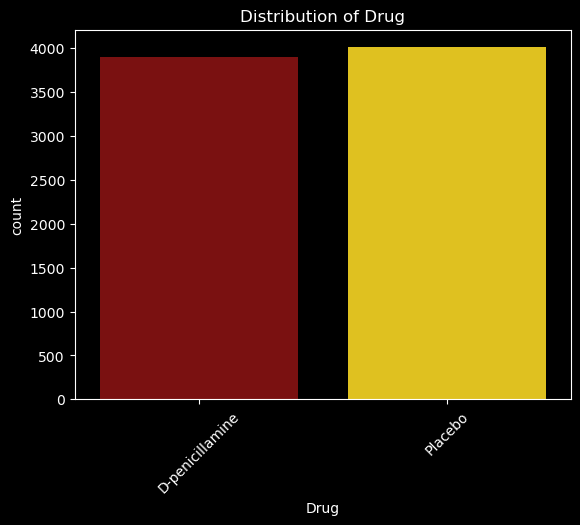


Feature Distribution: Sex
Sex
F    7336
M     569
Name: count, dtype: int64


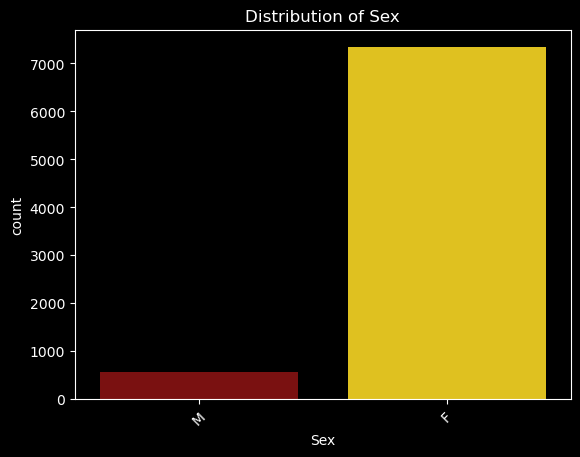


Feature Distribution: Ascites
Ascites
N    7525
Y     380
Name: count, dtype: int64


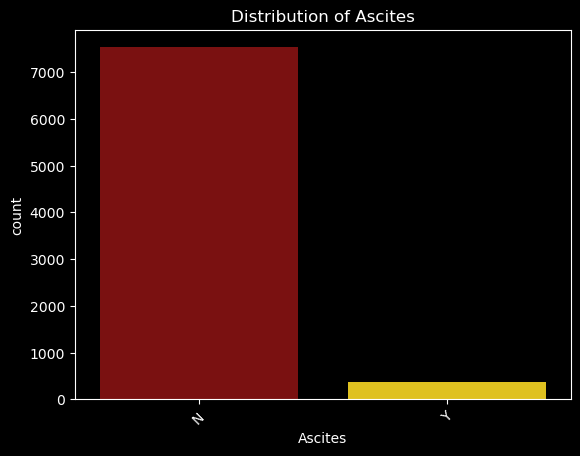


Feature Distribution: Hepatomegaly
Hepatomegaly
Y    4042
N    3863
Name: count, dtype: int64


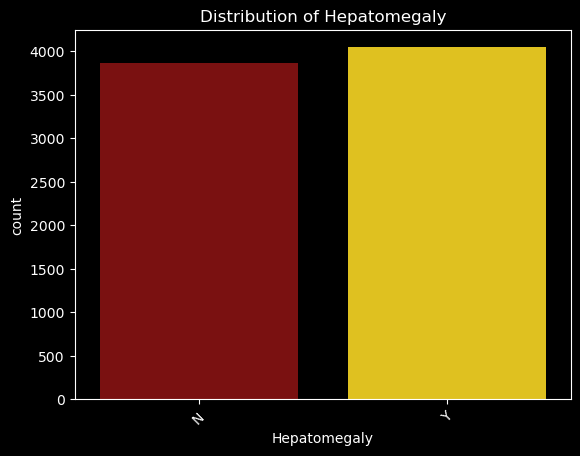


Feature Distribution: Spiders
Spiders
N    5966
Y    1939
Name: count, dtype: int64


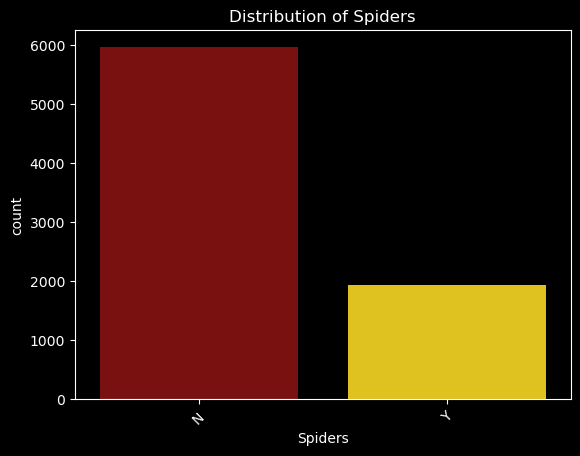


Feature Distribution: Edema
Edema
N    7161
S     399
Y     345
Name: count, dtype: int64


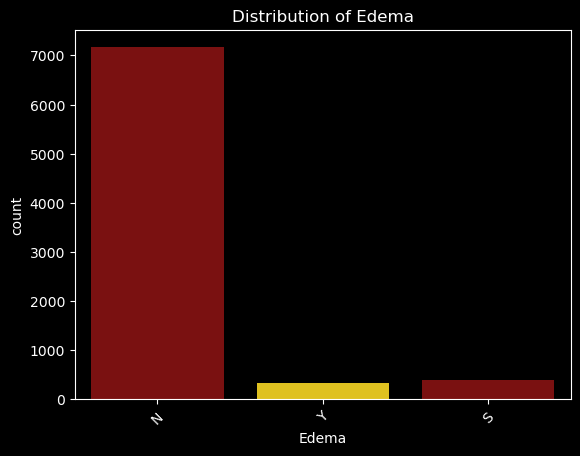


Feature Distribution: Status
Status
C     4965
D     2665
CL     275
Name: count, dtype: int64


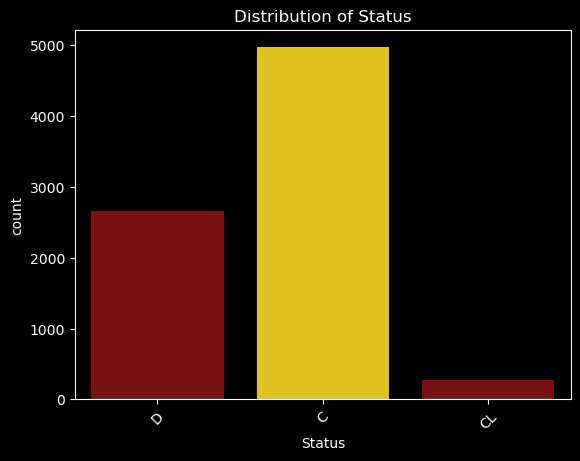


Feature Distribution: Age_Category
Age_Category
Old            4211
Middle-Aged    3651
Young            43
Name: count, dtype: int64


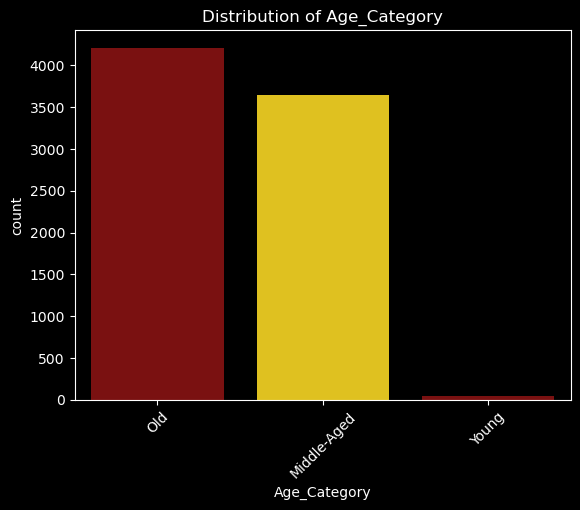


Feature Distribution: Bilirubin_Category
Bilirubin_Category
Normal      4406
Abnormal    3499
Name: count, dtype: int64


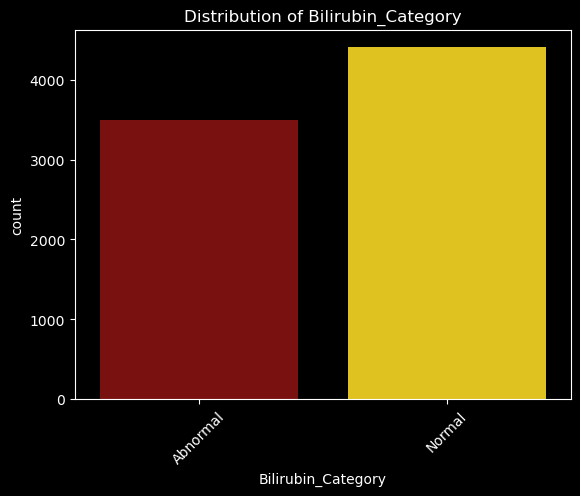


Feature Distribution: Cholesterol_Category
Cholesterol_Category
Abnormal    7477
Normal       428
Name: count, dtype: int64


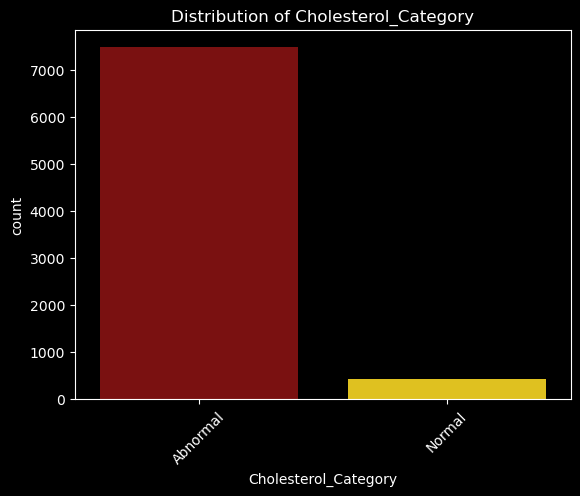


Feature Distribution: Albumin_Category
Albumin_Category
Normal      4707
Abnormal    3198
Name: count, dtype: int64


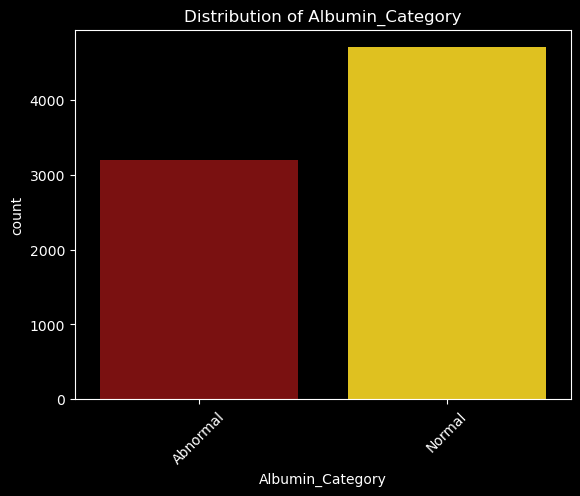


Feature Distribution: Copper_Category
Copper_Category
Abnormal    5700
Normal      2205
Name: count, dtype: int64


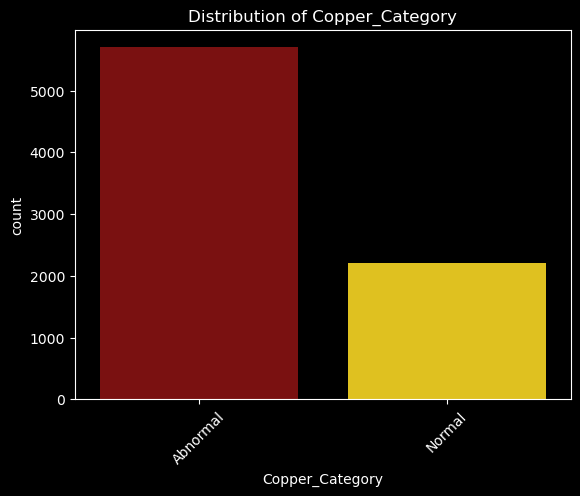


Feature Distribution: SGOT_Category
SGOT_Category
Abnormal    7885
Normal        20
Name: count, dtype: int64


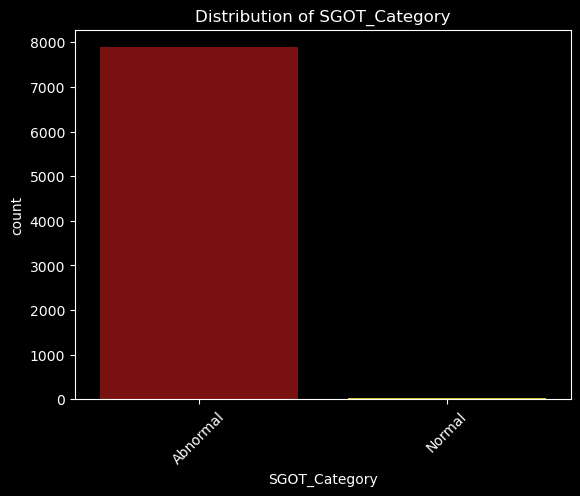


Feature Distribution: Tryglicerides_Category
Tryglicerides_Category
Normal      6413
Abnormal    1492
Name: count, dtype: int64


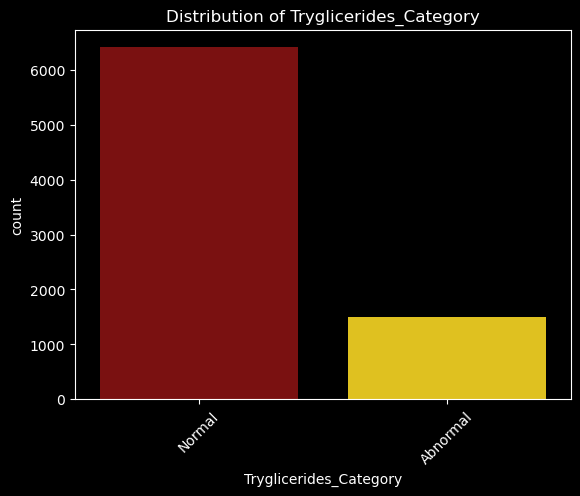


Feature Distribution: Platelets_Category
Platelets_Category
Normal      7015
Abnormal     890
Name: count, dtype: int64


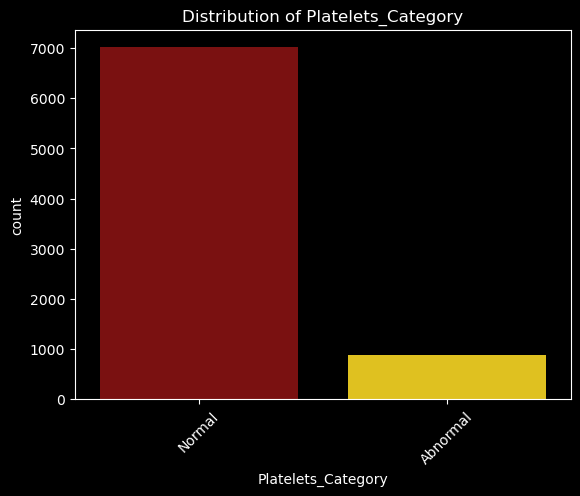


Feature Distribution: Prothrombin_Category
Prothrombin_Category
Abnormal    5423
Normal      2482
Name: count, dtype: int64


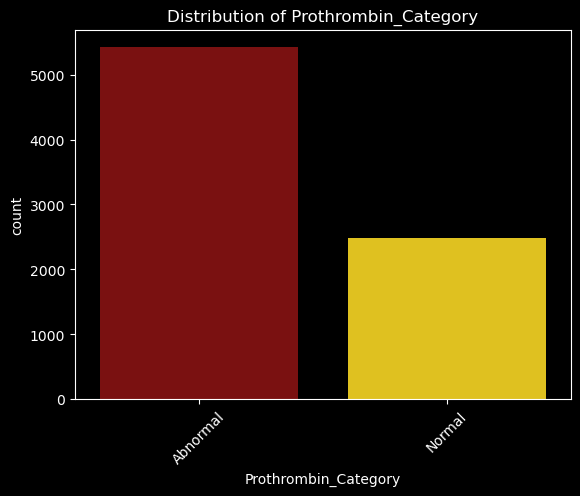

In [87]:
for col in categorical_data:
    print(f"\nFeature Distribution: {col}")
    print(cirrhosis_train[col].value_counts())
    sns.countplot(cirrhosis_train, x=col, palette=['#8B0000', '#FFD700'])
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()

# ENCODING

In [88]:
# Mapping for Drug
cirrhosis_train['Drug'] = cirrhosis_train['Drug'].map({'Placebo': 0, 'D-penicillamine': 1})
data_test['Drug'] = data_test['Drug'].map({'Placebo': 0, 'D-penicillamine': 1})

# Mapping for Sex
cirrhosis_train['Sex'] = cirrhosis_train['Sex'].map({'F': 1, 'M': 0})
data_test['Sex'] = data_test['Sex'].map({'F': 1, 'M': 0})

# Mapping for Ascites
cirrhosis_train['Ascites'] = cirrhosis_train['Ascites'].map({'N': 0, 'Y': 1})
data_test['Ascites'] = data_test['Ascites'].map({'N': 0, 'Y': 1})

# Mapping for Hepatomegaly
cirrhosis_train['Hepatomegaly'] = cirrhosis_train['Hepatomegaly'].map({'N': 0, 'Y': 1})
data_test['Hepatomegaly'] = data_test['Hepatomegaly'].map({'N': 0, 'Y': 1})

# Mapping for Spiders
cirrhosis_train['Spiders'] = cirrhosis_train['Spiders'].map({'N': 0, 'Y': 1})
data_test['Spiders'] = data_test['Spiders'].map({'N': 0, 'Y': 1})

# Mapping for Edema
cirrhosis_train['Edema'] = cirrhosis_train['Edema'].map({'N': 0, 'Y': 1, 'S': 2})
data_test['Edema'] = data_test['Edema'].map({'N': 0, 'Y': 1, 'S': 2})

# Mapping for Age_Category
cirrhosis_train['Age_Category'] = cirrhosis_train['Age_Category'].map({'Young': 1, 'Middle-Aged': 2, 'Old': 3})
data_test['Age_Category'] = data_test['Age_Category'].map({'Young': 1, 'Middle-Aged': 2, 'Old': 3})

# Mapping for Bilirubin_Category
cirrhosis_train['Bilirubin_Category'] = cirrhosis_train['Bilirubin_Category'].map({'Normal': 0, 'Abnormal': 1})
data_test['Bilirubin_Category'] = data_test['Bilirubin_Category'].map({'Normal': 0, 'Abnormal': 1})

# Mapping for Albumin_Category
cirrhosis_train['Albumin_Category'] = cirrhosis_train['Albumin_Category'].map({'Normal': 0, 'Abnormal': 1})
data_test['Albumin_Category'] = data_test['Albumin_Category'].map({'Normal': 0, 'Abnormal': 1})

# Mapping for Copper_Category
cirrhosis_train['Copper_Category'] = cirrhosis_train['Copper_Category'].map({'Normal': 0, 'Abnormal': 1})
data_test['Copper_Category'] = data_test['Copper_Category'].map({'Normal': 0, 'Abnormal': 1})

# Mapping for Tryglicerides_Category
cirrhosis_train['Tryglicerides_Category'] = cirrhosis_train['Tryglicerides_Category'].map({'Normal': 0, 'Abnormal': 1})
data_test['Tryglicerides_Category'] = data_test['Tryglicerides_Category'].map({'Normal': 0, 'Abnormal': 1})

# Mapping for Platelets_Category
cirrhosis_train['Platelets_Category'] = cirrhosis_train['Platelets_Category'].map({'Normal': 0, 'Abnormal': 1})
data_test['Platelets_Category'] = data_test['Platelets_Category'].map({'Normal': 0, 'Abnormal': 1})

# Mapping for Prothrombin_Category
cirrhosis_train['Prothrombin_Category'] = cirrhosis_train['Prothrombin_Category'].map({'Normal': 0, 'Abnormal': 1})
data_test['Prothrombin_Category'] = data_test['Prothrombin_Category'].map({'Normal': 0, 'Abnormal': 1})

# Mapping for Status
cirrhosis_train['Status'] = cirrhosis_train['Status'].map({'C': 0, 'CL': 1, 'D': 2})

In [90]:
cirrhosis_train.drop(columns=['Cholesterol_Category', 'SGOT_Category'], inplace=True)

In [91]:
cirrhosis_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7905 entries, 0 to 7904
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   N_Days                       7905 non-null   int64  
 1   Drug                         7905 non-null   int64  
 2   Age                          7905 non-null   int64  
 3   Sex                          7905 non-null   int64  
 4   Ascites                      7905 non-null   int64  
 5   Hepatomegaly                 7905 non-null   int64  
 6   Spiders                      7905 non-null   int64  
 7   Edema                        7905 non-null   int64  
 8   Bilirubin                    7905 non-null   float64
 9   Cholesterol                  7905 non-null   float64
 10  Albumin                      7905 non-null   float64
 11  Copper                       7905 non-null   float64
 12  Alk_Phos                     7905 non-null   float64
 13  SGOT                   

# FEATURE SELECTION

In [92]:
cirrhosis_train.columns

Index(['N_Days', 'Drug', 'Age', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders',
       'Edema', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos',
       'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage', 'Status',
       'Bilirubin_Albumin_Ratio', 'SGOT_Ratio', 'Copper_Albumin_Ratio',
       'Platelets_Bilirubin_Ratio', 'Tryglicerides_Albumin_Ratio',
       'Age_Category', 'Bilirubin_Category', 'Albumin_Category',
       'Copper_Category', 'Tryglicerides_Category', 'Platelets_Category',
       'Prothrombin_Category'],
      dtype='object')

In [94]:
numerical_list = ['N_Days', 'Age', 'Bilirubin', 'Alk_Phos', 'SGOT', 'Albumin', 'Copper', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Cholesterol', 'Bilirubin_Albumin_Ratio', 'SGOT_Ratio', 'Copper_Albumin_Ratio','Platelets_Bilirubin_Ratio', 'Tryglicerides_Albumin_Ratio']

In [95]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
cirrhosis_train[numerical_list] = scaler.fit_transform(cirrhosis_train[numerical_list])

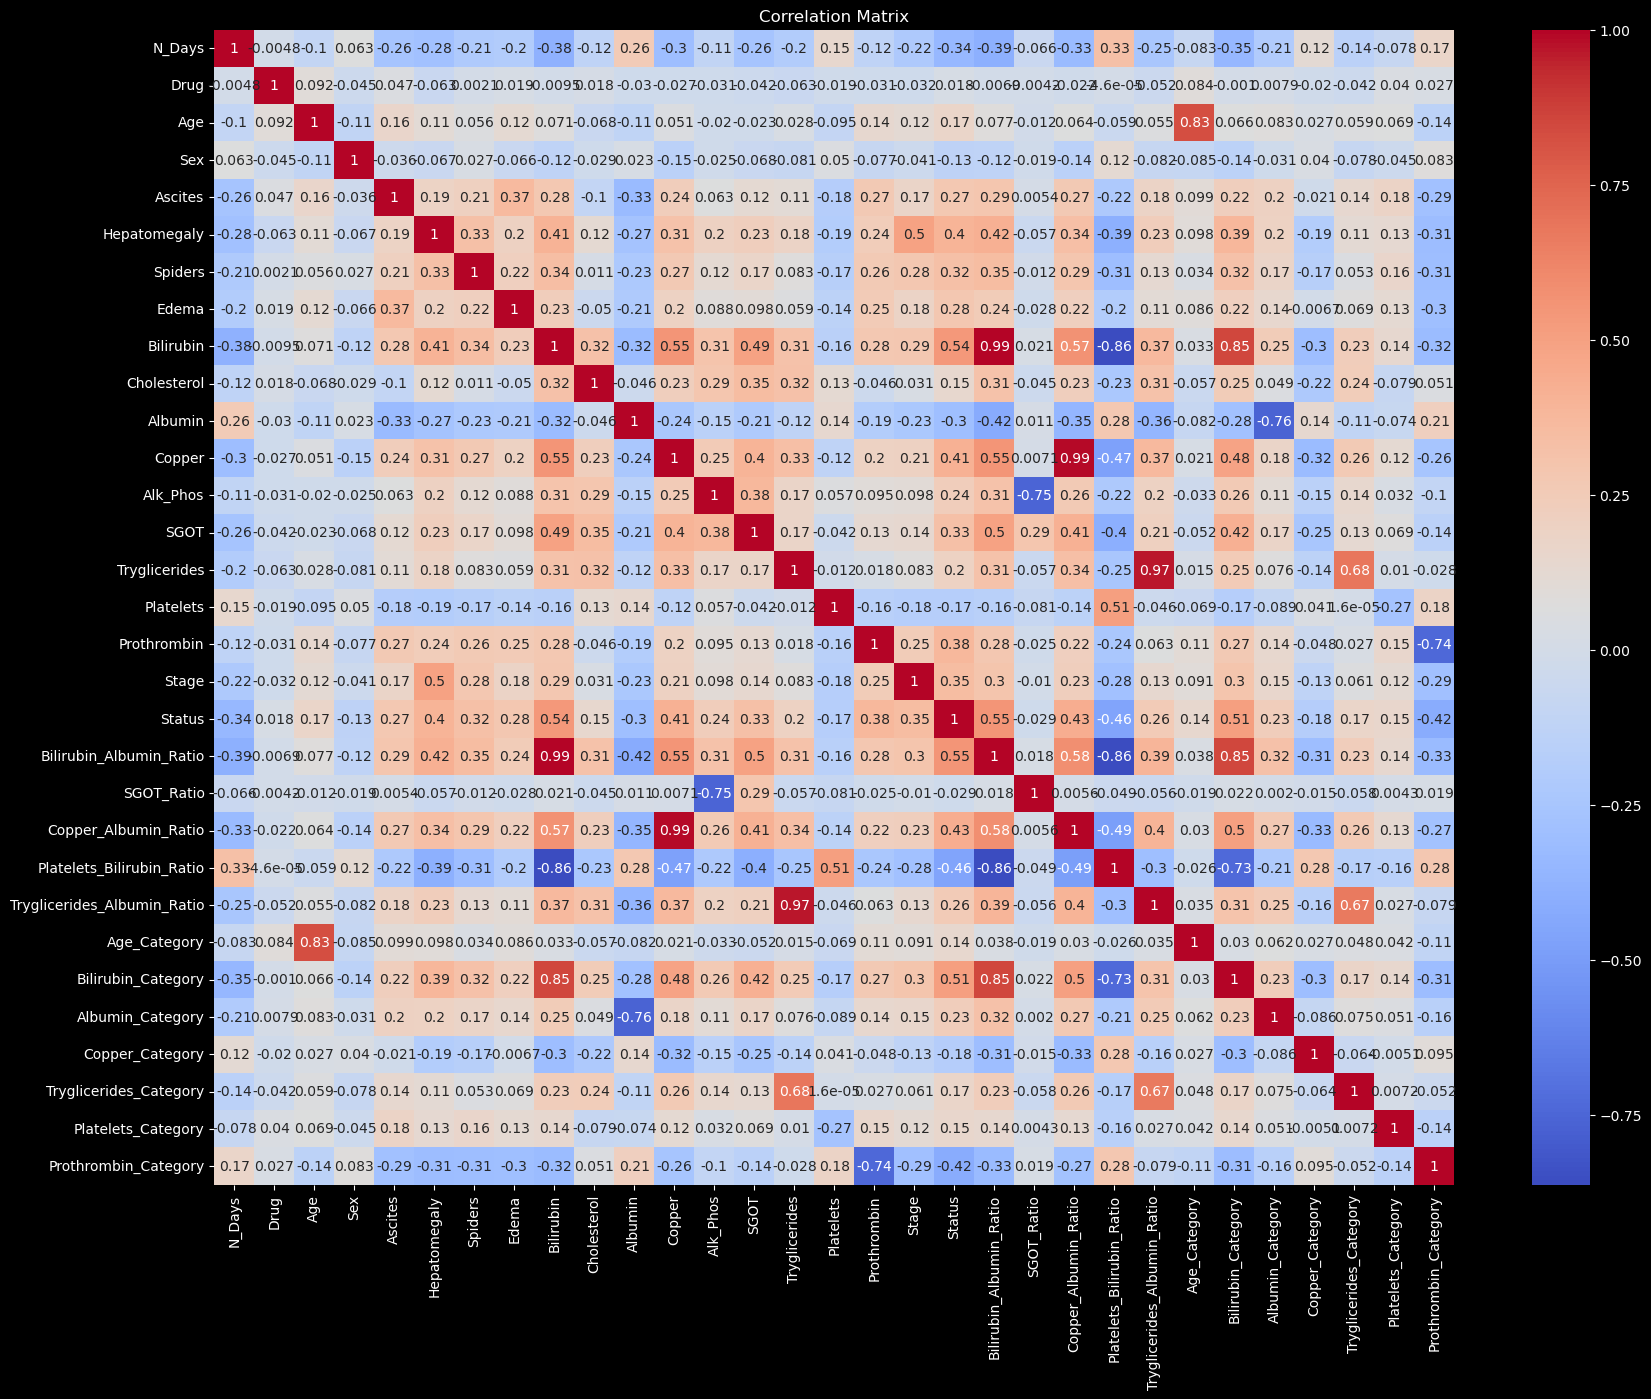

In [96]:
plt.figure(figsize=(20, 15))
sns.heatmap(cirrhosis_train.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [97]:
cirrhosis_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7905 entries, 0 to 7904
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   N_Days                       7905 non-null   float64
 1   Drug                         7905 non-null   int64  
 2   Age                          7905 non-null   float64
 3   Sex                          7905 non-null   int64  
 4   Ascites                      7905 non-null   int64  
 5   Hepatomegaly                 7905 non-null   int64  
 6   Spiders                      7905 non-null   int64  
 7   Edema                        7905 non-null   int64  
 8   Bilirubin                    7905 non-null   float64
 9   Cholesterol                  7905 non-null   float64
 10  Albumin                      7905 non-null   float64
 11  Copper                       7905 non-null   float64
 12  Alk_Phos                     7905 non-null   float64
 13  SGOT                   

# MODELING

In [98]:
from sklearn.model_selection import train_test_split

X = cirrhosis_train.drop('Status', axis=1)
y = cirrhosis_train['Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Evaluating: Logistic Regression
Accuracy: 0.8032890575585073

Log Loss: 0.5148720790388722

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.91      0.86       966
           1       0.00      0.00      0.00        52
           2       0.79      0.69      0.74       563

    accuracy                           0.80      1581
   macro avg       0.53      0.53      0.53      1581
weighted avg       0.78      0.80      0.79      1581



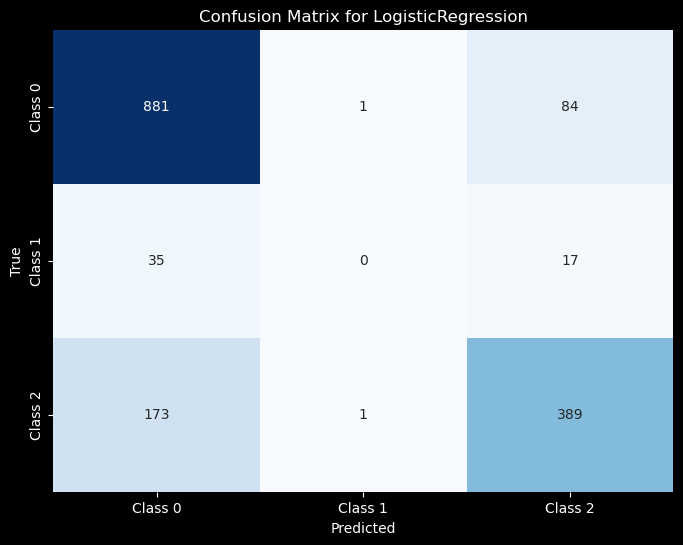

Evaluating: Random Forest
Accuracy: 0.8216318785578748

Log Loss: 0.48370733270577027

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.92      0.87       966
           1       0.73      0.15      0.25        52
           2       0.82      0.71      0.76       563

    accuracy                           0.82      1581
   macro avg       0.79      0.60      0.63      1581
weighted avg       0.82      0.82      0.81      1581



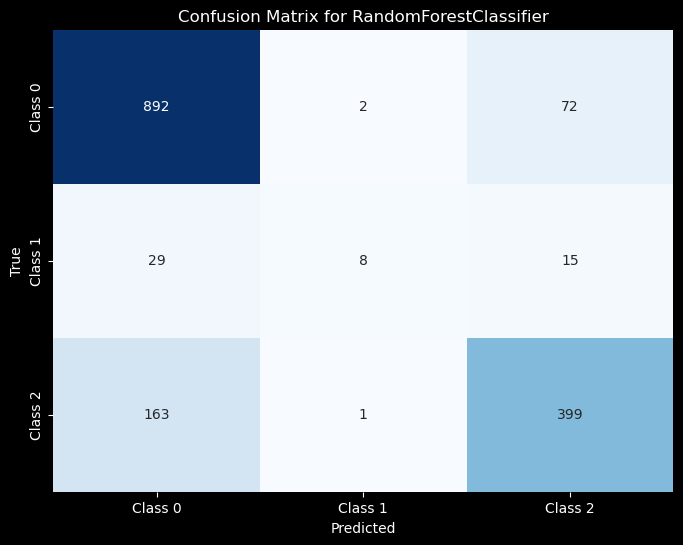

Evaluating: SVM
Accuracy: 0.8159392789373814

Log Loss: 0.49665361135601527

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.93      0.87       966
           1       0.00      0.00      0.00        52
           2       0.82      0.70      0.75       563

    accuracy                           0.82      1581
   macro avg       0.54      0.54      0.54      1581
weighted avg       0.79      0.82      0.80      1581



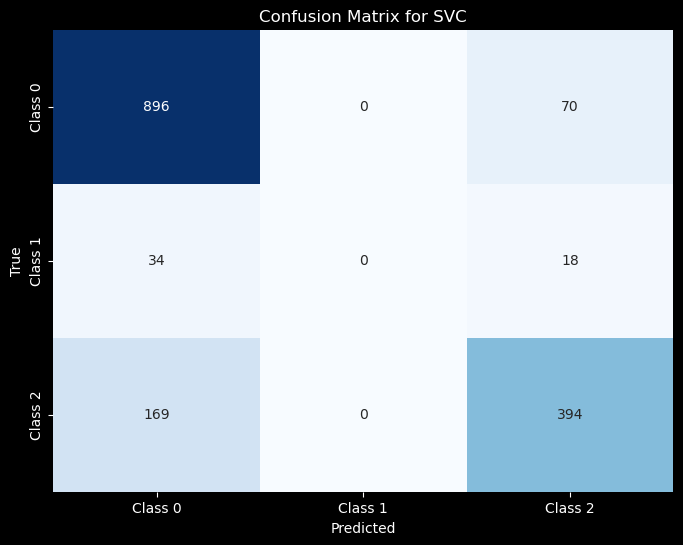

Evaluating: AdaBoost (Default)
Accuracy: 0.8115117014547755

Log Loss: 1.0454297249567703

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.92      0.87       966
           1       0.32      0.13      0.19        52
           2       0.82      0.69      0.75       563

    accuracy                           0.81      1581
   macro avg       0.65      0.58      0.60      1581
weighted avg       0.80      0.81      0.80      1581



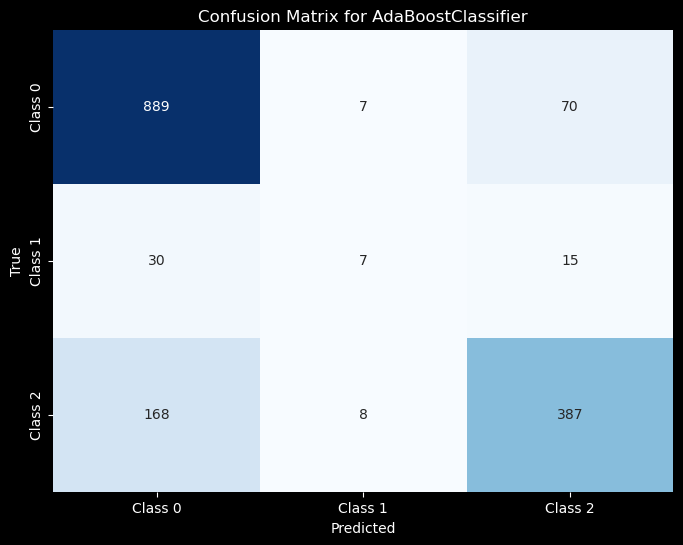

Evaluating: XGBoost
Accuracy: 0.8431372549019608

Log Loss: 0.5112811217795797

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.93      0.88       966
           1       0.69      0.21      0.32        52
           2       0.84      0.75      0.80       563

    accuracy                           0.84      1581
   macro avg       0.79      0.63      0.67      1581
weighted avg       0.84      0.84      0.84      1581



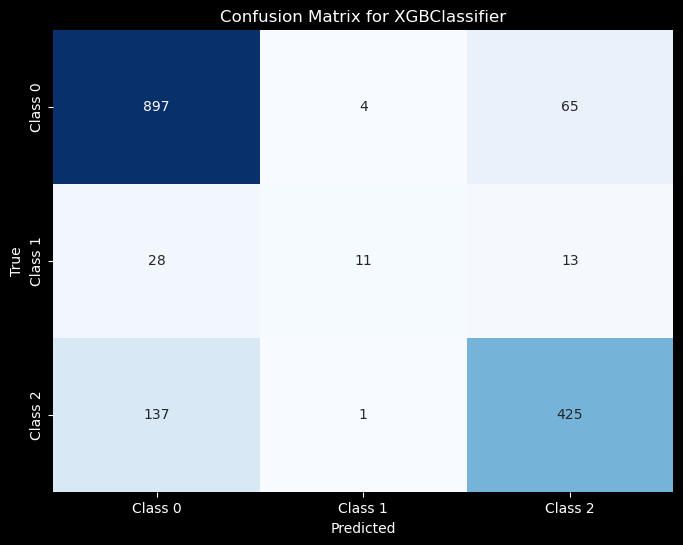

Evaluating: Gradient Boosting
Accuracy: 0.8292220113851992

Log Loss: 0.44810764832836775

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.92      0.88       966
           1       0.46      0.12      0.18        52
           2       0.82      0.73      0.78       563

    accuracy                           0.83      1581
   macro avg       0.71      0.59      0.61      1581
weighted avg       0.82      0.83      0.82      1581



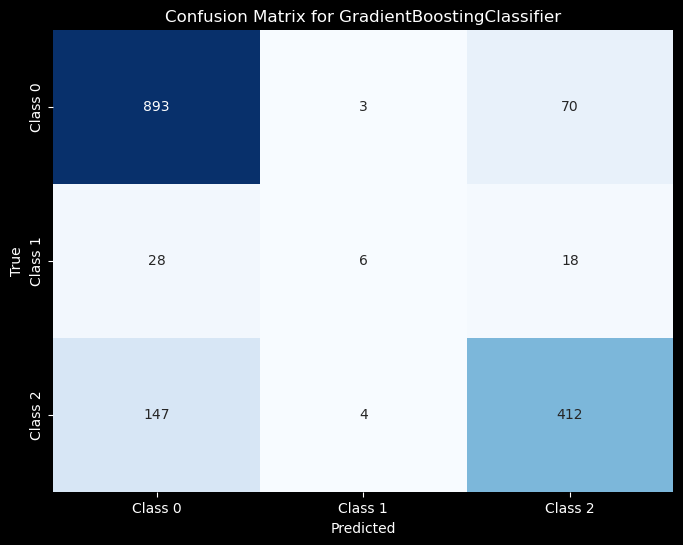

Evaluating: Neural Network
Accuracy: 0.7798861480075902

Log Loss: 0.8469732802860165

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.85      0.84       966
           1       0.30      0.15      0.20        52
           2       0.73      0.72      0.72       563

    accuracy                           0.78      1581
   macro avg       0.62      0.57      0.59      1581
weighted avg       0.77      0.78      0.77      1581



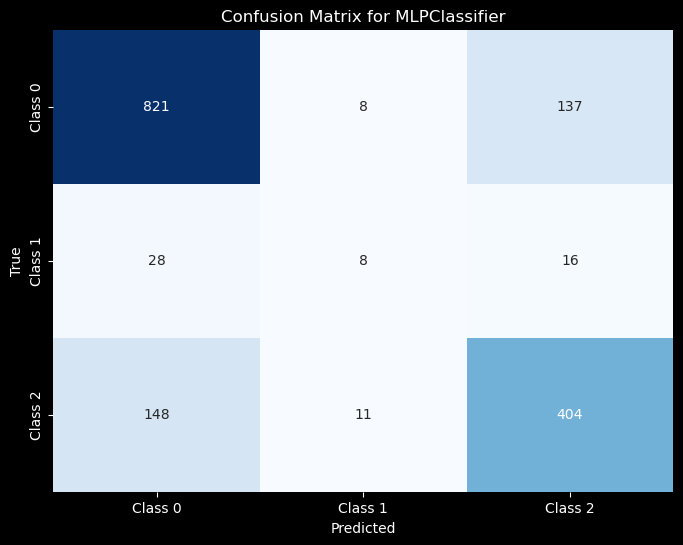

Evaluating: KNN
Accuracy: 0.7956989247311828

Log Loss: 2.800103520173065

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.92      0.86       966
           1       0.29      0.13      0.18        52
           2       0.80      0.65      0.72       563

    accuracy                           0.80      1581
   macro avg       0.63      0.57      0.59      1581
weighted avg       0.79      0.80      0.79      1581



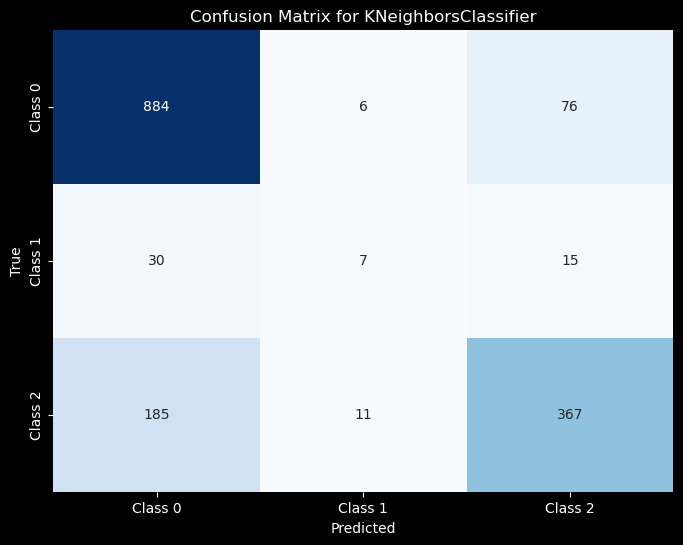

In [112]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, log_loss
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import seaborn as sns

def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Class 0', 'Class 1', 'Class 2'],  
                yticklabels=['Class 0', 'Class 1', 'Class 2'])
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

def train_and_evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)  # Get predicted probabilities
    
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("\nLog Loss:", log_loss(y_test, y_pred_proba))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    
    plot_confusion_matrix(y_test, y_pred, model.__class__.__name__)
    
    print("="*50)  

models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(probability=True, random_state=42),  # Enable probability estimates
    "AdaBoost (Default)": AdaBoostClassifier(random_state=42),  # Using default base estimator
    "XGBoost": xgb.XGBClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Neural Network": MLPClassifier(random_state=42, max_iter=500),
    "KNN": KNeighborsClassifier()  # Adding KNN model
}

for model_name, model in models.items():
    print(f"Evaluating: {model_name}")
    train_and_evaluate_model(model, X_train, y_train, X_test, y_test)

# XGBOOST WITH HYPERPARAMETER TUNING

In [113]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

xgb_model = xgb.XGBClassifier(random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.3]
}

param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'learning_rate': np.linspace(0.01, 0.3, 30),
    'max_depth': [3, 5, 7, 9, 11],
    'min_child_weight': [1, 3, 5, 7],
    'subsample': np.linspace(0.5, 1.0, 6),
    'colsample_bytree': np.linspace(0.5, 1.0, 6),
    'gamma': [0, 0.1, 0.3, 0.5]
}

grid_search = GridSearchCV(estimator=xgb_model,
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=3,
                           verbose=2,
                           n_jobs=-1)

grid_search.fit(X_train, y_train)

best_params_grid = grid_search.best_params_
best_score_grid = grid_search.best_score_

print("Grid Search Best Parameters:", best_params_grid)
print("Grid Search Best Cross-Validation Score:", best_score_grid)

random_search = RandomizedSearchCV(estimator=xgb_model,
                                   param_distributions=param_dist,
                                   n_iter=100, 
                                   scoring='accuracy',
                                   cv=3,
                                   verbose=2,
                                   random_state=42,
                                   n_jobs=-1)

random_search.fit(X_train, y_train)

best_params_random = random_search.best_params_
best_score_random = random_search.best_score_

print("Randomized Search Best Parameters:", best_params_random)
print("Randomized Search Best Cross-Validation Score:", best_score_random)

Fitting 3 folds for each of 2187 candidates, totalling 6561 fits
Grid Search Best Parameters: {'colsample_bytree': 0.6, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 3, 'n_estimators': 200, 'subsample': 0.8}
Grid Search Best Cross-Validation Score: 0.8274826059456041
Fitting 3 folds for each of 100 candidates, totalling 300 fits
Randomized Search Best Parameters: {'subsample': 0.8, 'n_estimators': 300, 'min_child_weight': 7, 'max_depth': 9, 'learning_rate': 0.019999999999999997, 'gamma': 0.3, 'colsample_bytree': 0.5}
Randomized Search Best Cross-Validation Score: 0.8268500948766603


# FEATURE IMPORTANCE

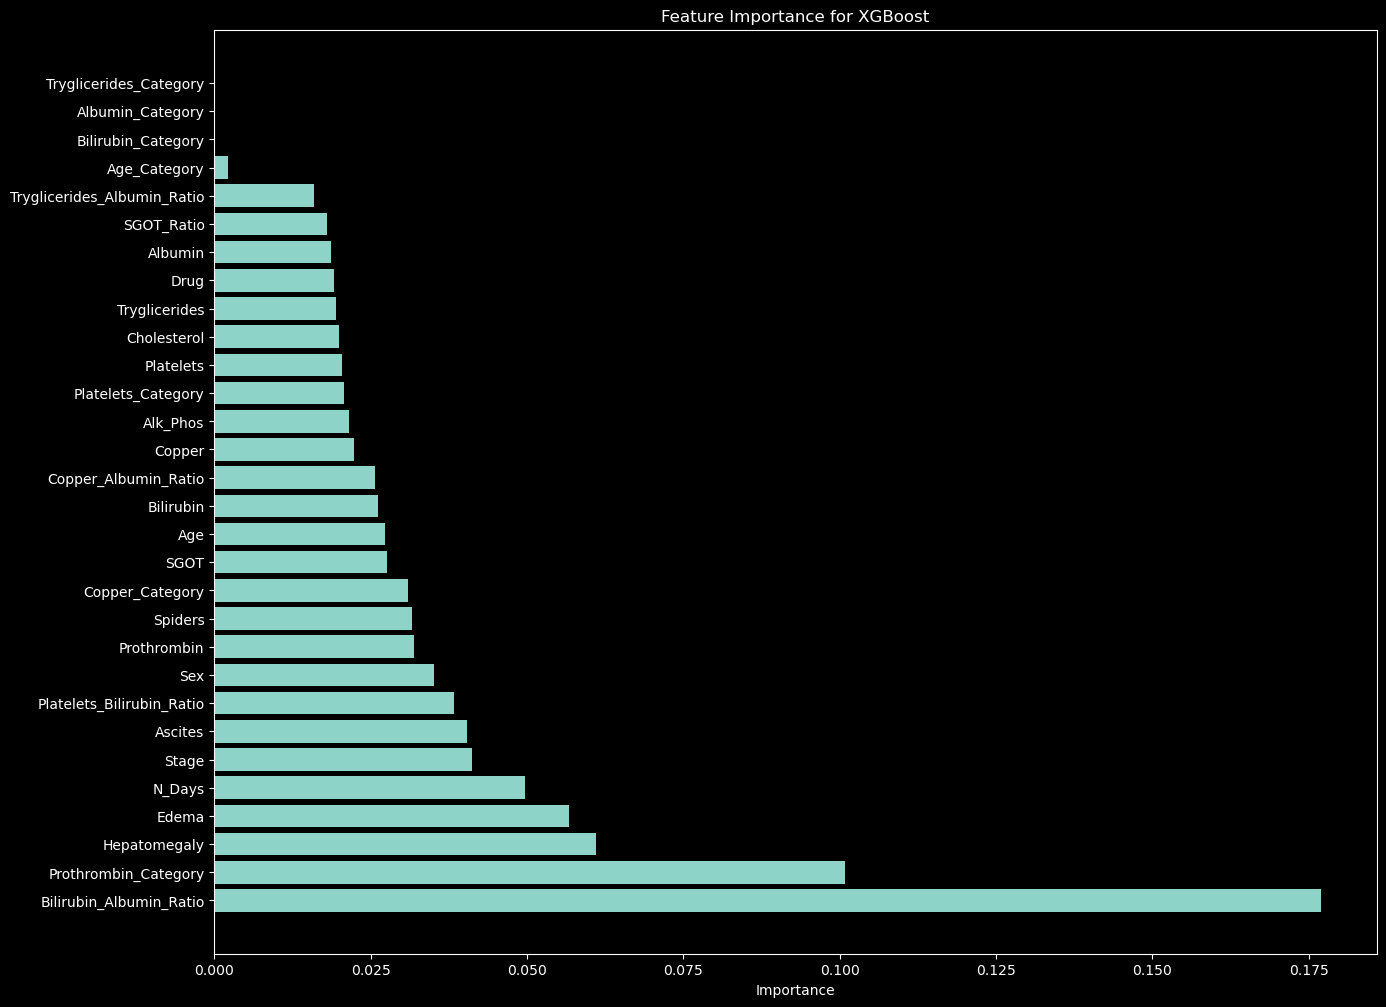

In [117]:
xgb_model.fit(X_train, y_train)

xgb_importance = xgb_model.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': xgb_importance
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(15, 12))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance for XGBoost')
plt.show()